In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
from scipy.stats import norm
import matplotlib.pyplot as plt

In [72]:
visits = pd.read_csv("./processed_data/visits_final.csv")
visits.head(500).to_csv("./visits.csv", index=False)

/tmp/ipykernel_24108/75115763.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv("./processed_data/visits_final.csv")


In [3]:
visits = pd.read_csv("./processed_data/visits_final.csv")
visits.columns.tolist()

/tmp/ipykernel_7370/3862291228.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv("./processed_data/visits_final.csv")


['farm_id',
 'owner_name',
 'national_id',
 'phone_number',
 'region',
 'x_coordinate',
 'y_coordinate',
 'generators_number',
 'total_generators_capacity_kw',
 'actual_generators_loading_kw',
 'wells_number',
 'sprinklers_loading_kw',
 'mechanical_head_1_hp',
 'mechanical_head_2_hp',
 'mechanical_head_3_hp',
 'mechanical_head_4_hp',
 'mechanical_head_5_hp',
 'mechanical_head_6_hp',
 'mechanical_head_7_hp',
 'mechanical_head_8_hp',
 'mechanical_head_9_hp',
 'mechanical_head_10_hp',
 'mechanical_head_11_hp',
 'mechanical_head_12_hp',
 'mechanical_head_13_hp',
 'mechanical_head_14_hp',
 'mechanical_head_15_hp',
 'total_mechanical_head_hp',
 'total_mechanical_head_kw',
 'electrical_head_1_hp',
 'electrical_head_2_hp',
 'electrical_head_3_hp',
 'electrical_head_4_hp',
 'electrical_head_5_hp',
 'electrical_head_6_hp',
 'total_electrical_head_hp',
 'total_electrical_head_kw',
 'water_level_sensor_1_hp',
 'water_level_sensor_2_hp',
 'water_level_sensor_3_hp',
 'water_level_sensor_4_hp',
 'wat

In [22]:
visits = pd.read_csv("./processed_data/visits_final.csv")

# Farms that have not been visited, fill them with -1 and remove them. 
visits = visits[(visits["total_electrical_load_kw"] > 0) | (visits["total_mechanical_head_kw"] > 0)] 
visits["wells_number"] = visits["wells_number"].astype('int')
visits["sprinklers_ratio"] = visits["sprinklers_loading_kw"] / visits["wells_number"]


# Define the columns to check for positive values
columns_to_check = (
    list(range(12, 27))
    + list(range(29, 35))
    + list(range(37, 58))
    + list(range(60, 64))
)


# Function to count positive numbers
def count_positive_numbers(row, cols):
    return (row[cols] > 0).sum()


# Apply the function to each row
visits["total_equipment"] = visits.apply(
    lambda row: count_positive_numbers(row, columns_to_check), axis=1
)
columns_to_check = list(range(12, 27))
visits["total_mechanical_equipment"] = visits.apply(
    lambda row: count_positive_numbers(row, columns_to_check), axis=1
)
columns_to_check = list(range(29, 35))
visits["total_electrical_equipment"] = visits.apply(
    lambda row: count_positive_numbers(row, columns_to_check), axis=1
)
columns_to_check = list(range(37, 58))
visits["total_submersible_equipment"] = visits.apply(
    lambda row: count_positive_numbers(row, columns_to_check), axis=1
)
columns_to_check = list(range(60, 64))
visits["total_pumps_equipment"] = visits.apply(
    lambda row: count_positive_numbers(row, columns_to_check), axis=1
)
visits["total_sprinklers_equipment"] = visits["wells_number"]

# Check where wells_number does not match the count of positive wells
mismatched_visits = visits.loc[~(visits["wells_number"] == visits["total_equipment"])]


probabilities = [
    (
        visits["total_mechanical_equipment"].sum(axis=0)
        / visits["total_equipment"].sum(axis=0)
    ),
    (
        visits["total_electrical_equipment"].sum(axis=0)
        / visits["total_equipment"].sum(axis=0)
    ),
    (
        visits["total_submersible_equipment"].sum(axis=0)
        / visits["total_equipment"].sum(axis=0)
    ),
    (
        visits["total_pumps_equipment"].sum(axis=0)
        / visits["total_equipment"].sum(axis=0)
    ),
]


hp_to_kw = 1 #0.7457  # Conversion factor from horsepower to kilowatt

# Calculate statistics and manually replace values in dictionaries
pump_data = {
    1: {"mean": visits['pump_1_hp'].mean() * hp_to_kw, "std": visits['pump_1_hp'].std() * hp_to_kw, "count": visits['pump_1_hp'].count()},
    2: {"mean": visits['pump_2_hp'].mean() * hp_to_kw, "std": visits['pump_2_hp'].std() * hp_to_kw, "count": visits['pump_2_hp'].count()},
    3: {"mean": visits['pump_3_hp'].mean() * hp_to_kw, "std": visits['pump_3_hp'].std() * hp_to_kw, "count": visits['pump_3_hp'].count()},
    4: {"mean": visits['pump_4_hp'].mean() * hp_to_kw, "std": visits['pump_4_hp'].std() * hp_to_kw, "count": visits['pump_4_hp'].count()},
}

submersible_data = {
    1: {"mean": visits['water_level_sensor_1_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_1_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_1_hp'].count()},
    2: {"mean": visits['water_level_sensor_2_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_2_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_2_hp'].count()},
    3: {"mean": visits['water_level_sensor_3_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_3_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_3_hp'].count()},
    4: {"mean": visits['water_level_sensor_4_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_4_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_4_hp'].count()},
    5: {"mean": visits['water_level_sensor_5_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_5_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_5_hp'].count()},
    6: {"mean": visits['water_level_sensor_6_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_6_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_6_hp'].count()},
    7: {"mean": visits['water_level_sensor_7_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_7_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_7_hp'].count()},
    8: {"mean": visits['water_level_sensor_8_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_8_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_8_hp'].count()},
    9: {"mean": visits['water_level_sensor_9_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_9_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_9_hp'].count()},
    10: {"mean": visits['water_level_sensor_10_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_10_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_10_hp'].count()},
    11: {"mean": visits['water_level_sensor_11_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_11_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_11_hp'].count()},
    12: {"mean": visits['water_level_sensor_12_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_12_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_12_hp'].count()},
    13: {"mean": visits['water_level_sensor_13_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_13_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_13_hp'].count()},
    14: {"mean": visits['water_level_sensor_14_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_14_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_14_hp'].count()},
    15: {"mean": visits['water_level_sensor_15_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_15_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_15_hp'].count()},
    16: {"mean": visits['water_level_sensor_16_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_16_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_16_hp'].count()},
    17: {"mean": visits['water_level_sensor_17_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_17_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_17_hp'].count()},
    18: {"mean": visits['water_level_sensor_18_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_18_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_18_hp'].count()},
    19: {"mean": visits['water_level_sensor_19_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_19_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_19_hp'].count()},
    20: {"mean": visits['water_level_sensor_20_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_20_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_20_hp'].count()},
    21: {"mean": visits['water_level_sensor_21_hp'].mean() * hp_to_kw, "std": visits['water_level_sensor_21_hp'].std() * hp_to_kw, "count": visits['water_level_sensor_21_hp'].count()},
}

mechanical_data = {
    1: {"mean": visits['mechanical_head_1_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_1_hp'].std() * hp_to_kw, "count": visits['mechanical_head_1_hp'].count()},
    2: {"mean": visits['mechanical_head_2_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_2_hp'].std() * hp_to_kw, "count": visits['mechanical_head_2_hp'].count()},
    3: {"mean": visits['mechanical_head_3_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_3_hp'].std() * hp_to_kw, "count": visits['mechanical_head_3_hp'].count()},
    4: {"mean": visits['mechanical_head_4_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_4_hp'].std() * hp_to_kw, "count": visits['mechanical_head_4_hp'].count()},
    5: {"mean": visits['mechanical_head_5_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_5_hp'].std() * hp_to_kw, "count": visits['mechanical_head_5_hp'].count()},
    6: {"mean": visits['mechanical_head_6_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_6_hp'].std() * hp_to_kw, "count": visits['mechanical_head_6_hp'].count()},
    7: {"mean": visits['mechanical_head_7_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_7_hp'].std() * hp_to_kw, "count": visits['mechanical_head_7_hp'].count()},
    8: {"mean": visits['mechanical_head_8_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_8_hp'].std() * hp_to_kw, "count": visits['mechanical_head_8_hp'].count()},
    9: {"mean": visits['mechanical_head_9_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_9_hp'].std() * hp_to_kw, "count": visits['mechanical_head_9_hp'].count()},
    10: {"mean": visits['mechanical_head_10_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_10_hp'].std() * hp_to_kw, "count": visits['mechanical_head_10_hp'].count()},
    11: {"mean": visits['mechanical_head_11_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_11_hp'].std() * hp_to_kw, "count": visits['mechanical_head_11_hp'].count()},
    12: {"mean": visits['mechanical_head_12_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_12_hp'].std() * hp_to_kw, "count": visits['mechanical_head_12_hp'].count()},
    13: {"mean": visits['mechanical_head_13_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_13_hp'].std() * hp_to_kw, "count": visits['mechanical_head_13_hp'].count()},
    14: {"mean": visits['mechanical_head_14_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_14_hp'].std() * hp_to_kw, "count": visits['mechanical_head_14_hp'].count()},
    15: {"mean": visits['mechanical_head_15_hp'].mean() * hp_to_kw, "std": visits['mechanical_head_15_hp'].std() * hp_to_kw, "count": visits['mechanical_head_15_hp'].count()},
}

electrical_data = {
    1: {"mean": visits['electrical_head_1_hp'].mean() * hp_to_kw, "std": visits['electrical_head_1_hp'].std() * hp_to_kw, "count": visits['electrical_head_1_hp'].count()},
    2: {"mean": visits['electrical_head_2_hp'].mean() * hp_to_kw, "std": visits['electrical_head_2_hp'].std() * hp_to_kw, "count": visits['electrical_head_2_hp'].count()},
    3: {"mean": visits['electrical_head_3_hp'].mean() * hp_to_kw, "std": visits['electrical_head_3_hp'].std() * hp_to_kw, "count": visits['electrical_head_3_hp'].count()},
    4: {"mean": visits['electrical_head_4_hp'].mean() * hp_to_kw, "std": visits['electrical_head_4_hp'].std() * hp_to_kw, "count": visits['electrical_head_4_hp'].count()},
    5: {"mean": visits['electrical_head_5_hp'].mean() * hp_to_kw, "std": visits['electrical_head_5_hp'].std() * hp_to_kw, "count": visits['electrical_head_5_hp'].count()},
    6: {"mean": visits['electrical_head_6_hp'].mean() * hp_to_kw, "std": visits['electrical_head_6_hp'].std() * hp_to_kw, "count": visits['electrical_head_6_hp'].count()},
}

# Number of samples needed
num_samples_needed = 1

# Z-scores for 90% confidence interval
confidence_level = 0.1
alpha = 1 - confidence_level
z_score_lower = norm.ppf(alpha / 2)
z_score_upper = norm.ppf(1 - alpha / 2)


# Equipment numbers function
def equipment_numbers(n_wells, probabilities):
    # np.random.seed(0)  # For reproducibility
    mechanical, electrical, submersible, pumps = np.random.multinomial(
        n_wells, probabilities
    )
    return mechanical, electrical, submersible, pumps


# Equipment size function
def equipment_size(equipment_type, equipment_numbers, data):
    samples = []
    for i in range(1, equipment_numbers + 1):
        if i in data:
            # print(f"Equipment Type {equipment_type} {i}:")
            mean = data[i]["mean"]
            std = data[i]["std"]

            if np.isnan(std):  # Skip if standard deviation is not available
                print(
                    f"Standard deviation for {equipment_type}_{i}_hp is not available. Skipping."
                )
                continue

            lower_bound = mean + z_score_lower * std
            upper_bound = mean + z_score_upper * std

            # Generate and filter samples until we have enough
            filtered_samples = []
            while len(filtered_samples) < num_samples_needed:
                raw_samples = np.random.normal(mean, std, num_samples_needed)
                filtered_samples = raw_samples[
                    (raw_samples >= lower_bound) & (raw_samples <= upper_bound)
                ]

            # Print results
            # print(f"raw_samples: {filtered_samples}, mean: {mean}, std: {std}")
            samples.append(filtered_samples[0])
    return samples


def calculate_equipment(row):
    wells = row["wells_number"]
    mechanical, electrical, submersible, pumps = equipment_numbers(wells, probabilities)
    print(
        f"Wells: {wells}, Mechanical: {mechanical}, Electrical: {electrical}, Submersible: {submersible}, Pumps: {pumps}"
    )

    mechs = equipment_size("mechanical_head", mechanical, mechanical_data)
    elecs = equipment_size("electrical_head", electrical, electrical_data)
    subs = equipment_size("submersible_pump", submersible, submersible_data)
    pumps = equipment_size("Pump", pumps, pump_data)

    print(
        f"Mechanical kW: {sum(mechs)}, Electrical kW: {sum(elecs)}, Submersible kW: {sum(subs)}, Pumps kW: {sum(pumps)}"
    )

    row["mechanical_equipment_count"] = len(mechs)
    row["electrical_equipment_count"] = len(elecs)
    row["submersible_equipment_count"] = len(subs)
    row["pumps_equipment_count"] = len(pumps)

    row["mechanical_equipment_kw"] = sum(mechs)
    row["electrical_equipment_kw"] = sum(elecs)
    row["submersible_equipment_kw"] = sum(subs)
    row["pumps_equipment_kw"] = sum(pumps)

    return row


# Adding additional columns to store the results
visits["mechanical_equipment_count"] = 0
visits["electrical_equipment_count"] = 0
visits["submersible_equipment_count"] = 0
visits["pumps_equipment_count"] = 0
visits["mechanical_equipment_kw"] = 0.0
visits["electrical_equipment_kw"] = 0.0
visits["submersible_equipment_kw"] = 0.0
visits["pumps_equipment_kw"] = 0.0
visits["sprinklers_equipment_kw"] = visits["wells_number"] * 25


# Apply the function to each row
visits_final = visits.apply(calculate_equipment, axis=1)


visits_final = visits_final[
    [
        "farm_id",
        "national_id",
        "owner_name",
        "city",
        "x_coordinate",
        "y_coordinate",
        "wells_number",
        "connection_to_grid",
        "total_mechanical_head_kw",
        "total_electrical_load_kw",
        "mechanical_equipment_count",
        "electrical_equipment_count",
        "submersible_equipment_count",
        "pumps_equipment_count",
        "mechanical_equipment_kw",
        "electrical_equipment_kw",
        "submersible_equipment_kw",
        "pumps_equipment_kw",
        "sprinklers_equipment_kw",
    ]
]
visits_final

/tmp/ipykernel_24108/2747303216.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  visits = pd.read_csv("./processed_data/visits_final.csv")
/tmp/ipykernel_24108/2747303216.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row[cols] > 0).sum()
/tmp/ipykernel_24108/2747303216.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (row[cols] > 0).sum()
/tmp/ipykernel_24108/2747303216.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent wi

Wells: 6, Mechanical: 5, Electrical: 1, Submersible: 0, Pumps: 0
Mechanical kW: 1745.0551471583794, Electrical kW: 283.7894209748689, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 1, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 363.8469939983677, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 2, Mechanical: 2, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 719.0463603787191, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 3, Mechanical: 0, Electrical: 3, Submersible: 0, Pumps: 0
Mechanical kW: 0, Electrical kW: 780.3128076762064, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 1, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 381.5464851078609, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 3, Mechanical: 3, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 1009.2369420576404, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 1, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 356.8637692715

farm_id   national_id                           owner_name  \
3      01_00_000008  1.016021e+09           محمد بن ناشي حنيش المصارير   
7      01_00_000012  1.025070e+09                 ذيب حسن هيف القحطاني   
9      01_00_000014  1.035060e+09     محمد سعيد منصور الحمالين الدوسري   
10     01_00_000016  1.024351e+09             نايف حسين شميعان الدوسري   
11     01_00_000017  1.022139e+09         مسعود بن حسين شميعان الدوسري   
...             ...           ...                                  ...   
17225  07_00_013777  1.012301e+09  عبدالعزيز فهد عبدالكريم علي المديني   
17226  07_00_013781           NaN           أمل ‏عبد الرحمن عواد الحجي   
17227  07_00_013868           NaN               سليمان عيد محمد العطوي   
17228  07_00_013869  1.000781e+09          مطير عوده حماد حنيحن العطوي   
17229  07_00_013883           NaN               سليم عوده سويلم العطوي   

         city       x_coordinate  y_coordinate  wells_number  \
3      Riyadh  47.84234907700005     24.204608             6   
7      Riyadh  47.74215832700003     24.085197             1   
9      Riyadh   47.8575844470001     24.225654             2   
10     Riyadh  47.82232783800004     24.284928             3   
11     Riyadh   47.6515339580001     24.112411             1   
...       ...                ...           ...           ...   
17225   Tabuk          36.811863     28.324411             1   
17226   Tabuk          36.448166     28.531969             1   
17227   Tabuk          36.087837     28.543844             1   
17228   Tabuk          36.079079     28.553778             1   
17229   Tabuk          36.788307     28.309277             1   

       connection_to_grid  total_mechanical_head_kw  total_electrical_load_kw  \
3                     0.0                   1342.80                   1492.80   
7                     0.0                    223.80                    360.70   
9                     0.0                    559.50                    609.50   
10                    1.0                    951.15                   1026.15   
11                    1.0                    261.10                    398.00   
...                   ...                       ...                       ...   
17225                 0.0                    317.05                    342.05   
17226                 0.0                    447.60                    472.60   
17227                 0.0                    317.05                    342.05   
17228                 0.0                    373.00                    398.00   
17229                 0.0                    373.00                    398.00   

       mechanical_equipment_count  electrical_equipment_count  \
3                               5                           1   
7                               1                           0   
9                               2                           0   
10                              0                           3   
11                              1                           0   
...                           ...                         ...   
17225                           1                           0   
17226                           1                           0   
17227                           0                           0   
17228                           1                           0   
17229                           1                           0   

       submersible_equipment_count  pumps_equipment_count  \
3                                0                      0   
7                                0                      0   
9                                0                      0   
10                               0                      0   
11                               0                      0   
...                            ...                    ...   
17225                            0                      0   
17226                            0                      0   
17227                            1                 

In [23]:
result = pd.read_csv("./processed_data/all_hasar_combined_updated.csv")
result

farm_id  property_area  property_main_type  activity_id  \
0      05_00_000030   3.565259e+06                 3.0            1   
1      05_00_000090   3.681615e+06                 3.0            5   
2      05_00_000051   2.555279e+06                 3.0            1   
3      05_00_000067   1.168098e+06                 3.0            4   
4      05_00_000177   1.337747e+06                 3.0            1   
...             ...            ...                 ...          ...   
15453  10_00_122921   7.023714e+05                 1.0            5   
15454  10_00_126431   5.422763e+05                 1.0           12   
15455  10_00_130022   6.620334e+05                 1.0            1   
15456  10_00_534131   7.977824e+05                 1.0            1   
15457  06_00_012125   1.363686e+06                 1.0            2   

       well_count  well_possession_type_1  well_is_active_1  well_is_active_2  \
0               1                       1                 0                 1   
1               5                       5                 0                 5   
2               1                       1                 1                 0   
3               4                       4                 2                 2   
4               1                       1                 0                 1   
...           ...                     ...               ...               ...   
15453           5                       5                 5                 0   
15454          12                      12                12                 0   
15455           1                       1                 1                 0   
15456           1                       1                 1                 0   
15457           2                       2                 2                 0   

       well_irrigation_source_1  well_irrigation_source_2  \
0                             0                         1   
1                             0                         5   
2                             0                         1   
3                             0                         4   
4                             0                         1   
...                         ...                       ...   
15453                         0                         5   
15454                         0                        11   
15455                         0                         1   
15456                         0                         1   
15457                         1                         1   

       well_irrigation_source_4  well_irrigation_source_5  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
15453                         0                         0   
15454                         0                         1   
15455                         0                         0   
15456                         0                         0   
15457                         0                         0   

       well_irrigation_source_6  well_irrigation_source_10  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
15453                         0                          0   
15454                         0                          0   
15455                         0                          0   
15456                         0                          0   
15457                         0       

In [8]:
result[result["farm_id"] == "05_00_002886"]

Empty DataFrame
Columns: [farm_id, property_area, property_main_type, activity_id, well_count, well_possession_type_1, well_is_active_1, well_is_active_2, well_irrigation_source_1, well_irrigation_source_2, well_irrigation_source_4, well_irrigation_source_5, well_irrigation_source_6, well_irrigation_source_10, well_irrigation_source_12, well_irrigation_type_1, well_irrigation_type_2, well_irrigation_type_3, well_irrigation_type_4, well_irrigation_type_6, well_irrigation_type_7, main_crop_type, farm_activity_status, farm_type, farm_irrigation_source, farm_irrigation_type, farm_activity_area_hectares, farm_trees_count, farm_house_count, farm_plantations_count, farm_activity_length_m, farm_activity_area_sq_m, farm_geometry, farm_main_crops_type_1, farm_main_crops_type_2, farm_main_crops_type_3, farm_main_crops_type_4, farm_main_crops_type_5, farm_main_crops_type_6, farm_main_crops_type_7, farm_main_crops_type_8, farm_main_crops_type_9, farm_main_crops_type_10, farm_main_crops_type_12, farm_main_crops_type_13, farm_main_crops_type_14, farm_main_crops_type_15, farm_activity_status_1, farm_activity_status_3, farm_activity_status_4, farm_activity_status_6, farm_type_1, farm_type_2, farm_type_5, farm_type_6, farm_type_7, farm_type_10, farm_type_11, farm_irrigation_source_1, farm_irrigation_source_2, farm_irrigation_source_4, farm_irrigation_source_5, farm_irrigation_source_6, farm_irrigation_source_7, farm_irrigation_source_10, farm_irrigation_source_12, farm_irrigation_type_1, farm_irrigation_type_2, farm_irrigation_type_3, farm_irrigation_type_4, farm_irrigation_type_6, farm_irrigation_type_7, farm_farming_season_1, farm_farming_season_2, farm_farming_season_3, farm_farming_season_4, farm_house_type_0, farm_house_type_1, farm_house_type_2, farm_house_type_3, farm_house_type_4, farm_house_type_6, farm_house_type_7, farm_plantations_type_0, farm_plantations_type_1, farm_plantations_type_2, farm_plantations_type_3]
Index: []

In [24]:
visits_and_hasar = visits_final.merge(result, on="farm_id", how="inner")
visits_and_hasar

farm_id   national_id                           owner_name  \
0      01_00_000008  1.016021e+09           محمد بن ناشي حنيش المصارير   
1      01_00_000012  1.025070e+09                 ذيب حسن هيف القحطاني   
2      01_00_000014  1.035060e+09     محمد سعيد منصور الحمالين الدوسري   
3      01_00_000016  1.024351e+09             نايف حسين شميعان الدوسري   
4      01_00_000017  1.022139e+09         مسعود بن حسين شميعان الدوسري   
...             ...           ...                                  ...   
10043  07_00_013777  1.012301e+09  عبدالعزيز فهد عبدالكريم علي المديني   
10044  07_00_013781           NaN           أمل ‏عبد الرحمن عواد الحجي   
10045  07_00_013868           NaN               سليمان عيد محمد العطوي   
10046  07_00_013869  1.000781e+09          مطير عوده حماد حنيحن العطوي   
10047  07_00_013883           NaN               سليم عوده سويلم العطوي   

         city       x_coordinate  y_coordinate  wells_number  \
0      Riyadh  47.84234907700005     24.204608             6   
1      Riyadh  47.74215832700003     24.085197             1   
2      Riyadh   47.8575844470001     24.225654             2   
3      Riyadh  47.82232783800004     24.284928             3   
4      Riyadh   47.6515339580001     24.112411             1   
...       ...                ...           ...           ...   
10043   Tabuk          36.811863     28.324411             1   
10044   Tabuk          36.448166     28.531969             1   
10045   Tabuk          36.087837     28.543844             1   
10046   Tabuk          36.079079     28.553778             1   
10047   Tabuk          36.788307     28.309277             1   

       connection_to_grid  total_mechanical_head_kw  total_electrical_load_kw  \
0                     0.0                   1342.80                   1492.80   
1                     0.0                    223.80                    360.70   
2                     0.0                    559.50                    609.50   
3                     1.0                    951.15                   1026.15   
4                     1.0                    261.10                    398.00   
...                   ...                       ...                       ...   
10043                 0.0                    317.05                    342.05   
10044                 0.0                    447.60                    472.60   
10045                 0.0                    317.05                    342.05   
10046                 0.0                    373.00                    398.00   
10047                 0.0                    373.00                    398.00   

       mechanical_equipment_count  electrical_equipment_count  \
0                               5                           1   
1                               1                           0   
2                               2                           0   
3                               0                           3   
4                               1                           0   
...                           ...                         ...   
10043                           1                           0   
10044                           1                           0   
10045                           0                           0   
10046                           1                           0   
10047                           1                           0   

       submersible_equipment_count  pumps_equipment_count  \
0                                0                      0   
1                                0                      0   
2                                0                      0   
3                                0                      0   
4                                0                      0   
...                            ...                    ...   
10043                            0                      0   
10044                            0                      0   
10045                            1                 

In [25]:
visits_and_hasar_ = visits_and_hasar.copy()

In [6]:
visits_and_hasar_[['farm_activity_area_hectares', 'main_crop_type', 'wells_number']]

farm_activity_area_hectares  main_crop_type  wells_number
0                        46.750421               4             6
1                        42.246073               3             1
2                        96.493831               2             2
3                        86.170176               3             3
4                        61.862922               2             1
...                            ...             ...           ...
10043                    82.734726               1             1
10044                    41.266395               1             1
10045                    81.160858               4             1
10046                    82.228900               2             1
10047                    63.582407               1             1

[10048 rows x 3 columns]

In [147]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import joblib
import os

def preprocess_data(farm_data):
    """
    Preprocess the input data by handling missing values and ensuring required columns.
    
    :param farm_data: DataFrame containing farm data
    :return: Preprocessed DataFrame
    """
    print('---------------- Data being processed ----------------')
    if not isinstance(farm_data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    required_columns = ['farm_activity_area_hectares', 'main_crop_type', 'wells_number']
    for col in required_columns:
        if col not in farm_data.columns:
            raise ValueError(f"Missing required column: {col}")

    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    for equip_type in equipment_types:
        count_col = f'{equip_type}_equipment_count'
        kw_col = f'{equip_type}_equipment_kw'
        if count_col not in farm_data.columns:
            farm_data[count_col] = 0
        if kw_col not in farm_data.columns:
            farm_data[kw_col] = 0

    farm_data['farm_activity_area_hectares'] = farm_data['farm_activity_area_hectares'].fillna(farm_data['farm_activity_area_hectares'].median())
    farm_data['main_crop_type'] = farm_data['main_crop_type'].fillna(0).astype(int)#.fillna('Unknown')
    farm_data['well_count'] = farm_data['well_count'].fillna(0).astype(int)

    print('---------------- Data processing is complete ----------------')
    
    return farm_data

def create_preprocessor():
    """
    Create a ColumnTransformer for preprocessing numerical and categorical data.
    
    :return: ColumnTransformer preprocessor
    """
    print('---------------- Data being transformed ----------------')
    return ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['farm_activity_area_hectares', 'well_count']),
            # ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['main_crop_type'])
        ])

def perform_clustering(farm_data, preprocessor, n_clusters=7):
    """
    Perform clustering on the farm data.
    
    :param farm_data: Preprocessed DataFrame
    :param preprocessor: ColumnTransformer preprocessor
    :param n_clusters: Number of clusters
    :return: Tuple of (cluster_pipeline, farm_data with cluster assignments)
    """
    
    print('---------------- Data clustering is starting  ----------------')
    cluster_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clusterer', KMeans(n_clusters=n_clusters, n_init=10))
    ])
    farm_data['cluster'] = cluster_pipeline.fit_predict(farm_data[['farm_activity_area_hectares', 'main_crop_type', 'well_count']])
    
    print('---------------- Data clustering is complete ----------------')
    return cluster_pipeline, farm_data

def train_rf_models(farm_data, preprocessor):
    """
    Train Random Forest models for equipment count prediction.
    
    :param farm_data: DataFrame with cluster assignments
    :param preprocessor: ColumnTransformer preprocessor
    :return: Dictionary of trained Random Forest models
    """
    
    print('---------------- Train Random Forest models started ----------------')
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    rf_models = {}
    for equip_type in equipment_types:
        rf_models[equip_type] = rf_pipeline.fit(
            farm_data[['farm_activity_area_hectares', 'main_crop_type', 'well_count']], 
            farm_data[f'{equip_type}_equipment_count']
        )
        
    print('---------------- Train Random Forest models completed ----------------')
    return rf_models

def calculate_farm_data_stats(farm_data):
    """
    Calculate statistics for Bayesian estimation of equipment sizes.
    
    :param farm_data: DataFrame with cluster assignments
    :return: Dictionary of farm data statistics
    """
    print('---------------- Bayesian States are being calculated ----------------')
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    farm_data_stats = {}
    for equip_type in equipment_types:
        kw_col = f'{equip_type}_equipment_kw'
        farm_data_stats[equip_type] = {
            'mean': farm_data[kw_col].mean(),
            'std': farm_data[kw_col].std(),
            'cluster_means': farm_data.groupby('cluster')[kw_col].mean().to_dict(),
            'cluster_stds': farm_data.groupby('cluster')[kw_col].std().to_dict(),
            'cluster_counts': farm_data['cluster'].value_counts().to_dict()
        }
    print(farm_data_stats)
    print('---------------- Bayesian States are completed ----------------')
    return farm_data_stats

def equipment_size_bayesian(prior_mean, prior_std, data_mean, data_std, n):
    """
    Perform Bayesian estimation for equipment size.
    
    :param prior_mean: Prior mean
    :param prior_std: Prior standard deviation
    :param data_mean: Data mean
    :param data_std: Data standard deviation
    :param n: Number of data points
    :return: Posterior distribution
    """
    posterior_mean = (prior_mean/prior_std**2 + data_mean*n/data_std**2) / (1/prior_std**2 + n/data_std**2)
    posterior_std = np.sqrt(1 / (1/prior_std**2 + n/data_std**2))
    return stats.norm(posterior_mean, posterior_std)

def generate_predictions(farm_data, rf_models, farm_data_stats):
    """
    Generate predictions for equipment counts and sizes, ensuring the total equipment count
    exactly matches the number of wells for each farm.
    
    :param farm_data: DataFrame with cluster assignments
    :param rf_models: Dictionary of trained Random Forest models
    :param farm_data_stats: Dictionary of farm data statistics
    :return: DataFrame of predictions
    """
    predictions = []
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    
    for _, farm in farm_data.iterrows():
        farm_pred = {
            'farm_activity_area_hectares': farm['farm_activity_area_hectares'],
            'main_crop_type': farm['main_crop_type'],
            'well_count': farm['well_count']
        }
        
        # Predict equipment counts
        raw_counts = {}
        for equip_type in equipment_types:
            count_pred = rf_models[equip_type].predict(pd.DataFrame({
                'farm_activity_area_hectares': [farm['farm_activity_area_hectares']],
                'main_crop_type': [farm['main_crop_type']],
                'well_count': [farm['well_count']]
            }))
            raw_counts[equip_type] = max(0, count_pred[0])  # Ensure non-negative
        
        # Adjust counts to exactly match wells_number
        total_predicted = sum(raw_counts.values())
        if total_predicted > 0:
            # Distribute wells proportionally, rounding down
            adjusted_counts = {equip_type: int(farm['well_count'] * count / total_predicted) 
                               for equip_type, count in raw_counts.items()}
            
            # Distribute any remaining wells to the equipment types with the highest fractional parts
            remaining_wells = farm['well_count'] - sum(adjusted_counts.values())
            fractional_parts = {equip_type: farm['well_count'] * count / total_predicted - adjusted_counts[equip_type] 
                                for equip_type, count in raw_counts.items()}
            print(remaining_wells)
            for _ in range(remaining_wells):
                equip_type = max(fractional_parts, key=fractional_parts.get)
                adjusted_counts[equip_type] += 1
                fractional_parts[equip_type] -= 1
            
            for equip_type in equipment_types:
                farm_pred[f'{equip_type}_equipment_count'] = adjusted_counts[equip_type]
        else:
            # If no equipment was predicted, distribute evenly
            count_per_type = farm['well_count'] // len(equipment_types)
            remainder = farm['well_count'] % len(equipment_types)
            for i, equip_type in enumerate(equipment_types):
                farm_pred[f'{equip_type}_equipment_count'] = count_per_type + (1 if i < remainder else 0)
        
        # Estimate equipment sizes (this part remains unchanged)
        for equip_type in equipment_types:
            if farm_pred[f'{equip_type}_equipment_count'] > 0:
                stats = farm_data_stats[equip_type]
                prior_mean = stats['mean']
                prior_std = stats['std']
                data_mean = stats['cluster_means'].get(farm['cluster'], prior_mean)
                data_std = stats['cluster_stds'].get(farm['cluster'], prior_std)
                n = stats['cluster_counts'].get(farm['cluster'], 1)
                
                posterior_dist = equipment_size_bayesian(prior_mean, prior_std, data_mean, data_std, n)
                farm_pred[f'total_{equip_type}_kw'] = posterior_dist.rvs()
            else:
                farm_pred[f'total_{equip_type}_kw'] = 0
        
        predictions.append(farm_pred)
    
    return pd.DataFrame(predictions)

def improved_equipment_model(farm_data, save_path="./bayesian_model/"):
    """
    Main function to run the improved equipment model.
    
    :param farm_data: Input DataFrame containing farm data
    :param save_path: Path to save the trained models and data
    :return: Tuple of (predictions DataFrame, rf_models, cluster_pipeline, preprocessor, farm_data_stats)
    """
    # Step 1: Preprocess the data
    farm_data = preprocess_data(farm_data)
    
    # Step 2: Create preprocessor
    preprocessor = create_preprocessor()
    
    # Step 3: Perform clustering
    cluster_pipeline, farm_data = perform_clustering(farm_data, preprocessor)
    
    # Step 4: Train Random Forest models
    rf_models = train_rf_models(farm_data, preprocessor)
    
    # Step 5: Calculate farm data statistics
    farm_data_stats = calculate_farm_data_stats(farm_data)
    
    # Step 6: Generate predictions
    predictions = generate_predictions(farm_data, rf_models, farm_data_stats)
    
    predictions['cluster'] = farm_data['cluster']
    
    # Save models and data
    os.makedirs(save_path, exist_ok=True)
    joblib.dump(rf_models, f'{save_path}/rf_models.joblib')
    joblib.dump(cluster_pipeline, f'{save_path}/cluster_model.joblib')
    joblib.dump(preprocessor, f'{save_path}/preprocessor.joblib')
    joblib.dump(farm_data_stats, f'{save_path}/farm_data_stats.joblib')
    
    return predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats

# Usage example:
temp_data = visits_and_hasar_.copy()
predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats = improved_equipment_model(temp_data)
predictions

---------------- Data being processed ----------------
---------------- Data processing is complete ----------------
---------------- Data being transformed ----------------
---------------- Data clustering is starting  ----------------
---------------- Data clustering is complete ----------------
---------------- Train Random Forest models started ----------------
---------------- Train Random Forest models completed ----------------
---------------- Bayesian States are being calculated ----------------
{'mechanical': {'mean': np.float64(351.2000519994503), 'std': np.float64(284.0208117513534), 'cluster_means': {0: 332.66313574712643, 1: 480.82197924278574, 2: 1294.980548560386, 3: 300.9440872335605, 4: 421.67234821069724, 5: 764.929593282978, 6: 438.24149524219854}, 'cluster_stds': {0: 241.7246558580886, 1: 362.9504703266334, 2: 1074.510212612089, 3: 212.4698083851919, 4: 300.48875842641166, 5: 649.0102891382834, 6: 324.07910116504877}, 'cluster_counts': {3: 4450, 0: 3321, 4: 1268, 1

farm_activity_area_hectares  main_crop_type  well_count  \
0                        46.750421               4           2   
1                        42.246073               3           3   
2                        96.493831               2           3   
3                        86.170176               3           2   
4                        61.862922               2           3   
...                            ...             ...         ...   
10043                    82.734726               1           1   
10044                    41.266395               1           1   
10045                    81.160858               4           2   
10046                    82.228900               2           2   
10047                    63.582407               1           1   

       mechanical_equipment_count  electrical_equipment_count  \
0                               1                           1   
1                               1                           1   
2                               1                           1   
3                               1                           1   
4                               1                           1   
...                           ...                         ...   
10043                           1                           0   
10044                           1                           0   
10045                           1                           1   
10046                           1                           1   
10047                           1                           0   

       submersible_equipment_count  pumps_equipment_count  \
0                                0                      0   
1                                1                      0   
2                                1                      0   
3                                0                      0   
4                                1                      0   
...                            ...                    ...   
10043                            0                      0   
10044                            0                      0   
10045                            0                      0   
10046                            0                      0   
10047                            0                      0   

       total_mechanical_kw  total_electrical_kw  total_submersible_kw  \
0               333.969184            31.527012              0.000000   
1               334.717306            31.646858             19.019401   
2               426.239125            43.726849             21.103535   
3               433.430568            43.473591              0.000000   
4               327.735279            31.291820             17.898152   
...                    ...                  ...                   ...   
10043           297.311809             0.000000              0.000000   
10044           303.821055             0.000000              0.000000   
10045           327.160652            32.564640              0.000000   
10046           419.103138            40.444595              0.000000   
10047           300.000300             0.000000              0.000000   

       total_pumps_kw  cluster  
0                 0.0        0  
1                 0.0        0  
2                 0.0        4  
3                 0.0        4  
4                 0.0        0  
...               ...      ...  
10043             0.0        3  
10044             0.0        3  
10045             0.0        0  
10046             0.0        4  
10047             0.0        3  

[10048 rows x 12 columns]

In [8]:
# New improved model from Claude
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import joblib
import os

def preprocess_data(farm_data):
    """
    Preprocess the input data by handling missing values and ensuring required columns.
    
    :param farm_data: DataFrame containing farm data
    :return: Preprocessed DataFrame
    """
    print('---------------- Data preprocessing started ----------------')
    if not isinstance(farm_data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    required_columns = ['farm_activity_area_hectares', 'main_crop_type', 'well_count']
    for col in required_columns:
        if col not in farm_data.columns:
            raise ValueError(f"Missing required column: {col}")

    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    for equip_type in equipment_types:
        count_col = f'{equip_type}_equipment_count'
        kw_col = f'{equip_type}_equipment_kw'
        if count_col not in farm_data.columns:
            farm_data[count_col] = 0
        if kw_col not in farm_data.columns:
            farm_data[kw_col] = 0

    farm_data['farm_activity_area_hectares'] = farm_data['farm_activity_area_hectares'].fillna(farm_data['farm_activity_area_hectares'].median())
    farm_data['main_crop_type'] = farm_data['main_crop_type'].fillna(0).astype(int)
    farm_data['well_count'] = farm_data['well_count'].fillna(0).astype(int)

    print('---------------- Data preprocessing completed ----------------')
    return farm_data

def create_preprocessor():
    """
    Create a ColumnTransformer for preprocessing numerical and categorical data.
    
    :return: ColumnTransformer preprocessor
    """
    print('---------------- Creating preprocessor ----------------')
    return ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['farm_activity_area_hectares', 'well_count']),
        ])

def perform_clustering(farm_data, preprocessor, n_clusters=7):
    """
    Perform clustering on the farm data.
    
    :param farm_data: Preprocessed DataFrame
    :param preprocessor: ColumnTransformer preprocessor
    :param n_clusters: Number of clusters
    :return: Tuple of (cluster_pipeline, farm_data with cluster assignments)
    """
    print('---------------- Performing clustering ----------------')
    cluster_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clusterer', KMeans(n_clusters=n_clusters, n_init=10))
    ])
    farm_data['cluster'] = cluster_pipeline.fit_predict(farm_data[['farm_activity_area_hectares', 'main_crop_type', 'well_count']])
    
    print('---------------- Clustering completed ----------------')
    return cluster_pipeline, farm_data

def train_rf_models(farm_data, preprocessor):
    """
    Train Random Forest models for equipment count prediction.
    
    :param farm_data: DataFrame with cluster assignments
    :param preprocessor: ColumnTransformer preprocessor
    :return: Dictionary of trained Random Forest models
    """
    print('---------------- Training Random Forest models ----------------')
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    rf_models = {}
    for equip_type in equipment_types:
        rf_models[equip_type] = rf_pipeline.fit(
            farm_data[['farm_activity_area_hectares', 'main_crop_type', 'well_count']], 
            farm_data[f'{equip_type}_equipment_count']
        )
    
    print('---------------- Random Forest models training completed ----------------')
    return rf_models

def calculate_farm_data_stats(farm_data):
    """
    Calculate statistics for Bayesian estimation of equipment sizes.
    
    :param farm_data: DataFrame with cluster assignments
    :return: Dictionary of farm data statistics
    """
    print('---------------- Calculating farm data statistics ----------------')
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    farm_data_stats = {}
    for equip_type in equipment_types:
        kw_col = f'{equip_type}_equipment_kw'
        farm_data_stats[equip_type] = {
            'mean': farm_data[kw_col].mean(),
            'std': farm_data[kw_col].std(),
            'cluster_means': farm_data.groupby('cluster')[kw_col].mean().to_dict(),
            'cluster_stds': farm_data.groupby('cluster')[kw_col].std().to_dict(),
            'cluster_counts': farm_data['cluster'].value_counts().to_dict()
        }
    print('---------------- Farm data statistics calculation completed ----------------')
    return farm_data_stats

def improved_equipment_size_bayesian(prior_mean, prior_std, data_mean, data_std, n, equipment_count):
    """
    Perform improved Bayesian estimation for equipment size.
    
    :param prior_mean: Prior mean
    :param prior_std: Prior standard deviation
    :param data_mean: Data mean
    :param data_std: Data standard deviation
    :param n: Number of data points
    :param equipment_count: Number of equipment pieces for this farm
    :return: Total kW for all equipment of this type
    """
    posterior_mean = (prior_mean/prior_std**2 + data_mean*n/data_std**2) / (1/prior_std**2 + n/data_std**2)
    posterior_std = np.sqrt(1 / (1/prior_std**2 + n/data_std**2))
    
    # Generate individual equipment sizes
    individual_sizes = stats.truncnorm(
        a=(0 - posterior_mean) / posterior_std,
        b=np.inf,
        loc=posterior_mean,
        scale=posterior_std
    ).rvs(size=equipment_count)
    
    return np.sum(individual_sizes)

def generate_improved_predictions(farm_data, rf_models, farm_data_stats):
    """
    Generate improved predictions for equipment counts and sizes.
    
    :param farm_data: DataFrame with cluster assignments
    :param rf_models: Dictionary of trained Random Forest models
    :param farm_data_stats: Dictionary of farm data statistics
    :return: DataFrame of predictions
    """
    print('---------------- Generating improved predictions ----------------')
    predictions = []
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    
    for _, farm in farm_data.iterrows():
        farm_pred = {
            'farm_activity_area_hectares': farm['farm_activity_area_hectares'],
            'main_crop_type': farm['main_crop_type'],
            'well_count': farm['well_count']
        }
        
        # Predict equipment counts
        raw_counts = {}
        for equip_type in equipment_types:
            count_pred = rf_models[equip_type].predict(pd.DataFrame({
                'farm_activity_area_hectares': [farm['farm_activity_area_hectares']],
                'main_crop_type': [farm['main_crop_type']],
                'well_count': [farm['well_count']]
            }))
            raw_counts[equip_type] = max(0, count_pred[0])  # Ensure non-negative
        
        # Adjust counts to exactly match wells_number
        total_predicted = sum(raw_counts.values())
        if total_predicted > 0:
            adjusted_counts = {equip_type: int(farm['well_count'] * count / total_predicted) 
                               for equip_type, count in raw_counts.items()}
            remaining_wells = farm['well_count'] - sum(adjusted_counts.values())
            fractional_parts = {equip_type: farm['well_count'] * count / total_predicted - adjusted_counts[equip_type] 
                                for equip_type, count in raw_counts.items()}
            for _ in range(remaining_wells):
                equip_type = max(fractional_parts, key=fractional_parts.get)
                adjusted_counts[equip_type] += 1
                fractional_parts[equip_type] -= 1
            
            for equip_type in equipment_types:
                farm_pred[f'{equip_type}_equipment_count'] = adjusted_counts[equip_type]
        else:
            count_per_type = farm['well_count'] // len(equipment_types)
            remainder = farm['well_count'] % len(equipment_types)
            for i, equip_type in enumerate(equipment_types):
                farm_pred[f'{equip_type}_equipment_count'] = count_per_type + (1 if i < remainder else 0)
        
        # Improved equipment size estimation
        for equip_type in equipment_types:
            equipment_count = farm_pred[f'{equip_type}_equipment_count']
            if equipment_count > 0:
                stats = farm_data_stats[equip_type]
                prior_mean = stats['mean']
                prior_std = stats['std']
                data_mean = stats['cluster_means'].get(farm['cluster'], prior_mean)
                data_std = stats['cluster_stds'].get(farm['cluster'], prior_std)
                n = stats['cluster_counts'].get(farm['cluster'], 1)
                
                total_kw = improved_equipment_size_bayesian(
                    prior_mean, prior_std, data_mean, data_std, n, equipment_count
                )
                farm_pred[f'total_{equip_type}_kw'] = total_kw
            else:
                farm_pred[f'total_{equip_type}_kw'] = 0
        
        predictions.append(farm_pred)
    
    print('---------------- Improved predictions generation completed ----------------')
    return pd.DataFrame(predictions)

def improved_equipment_model(farm_data, save_path="./bayesian_model/"):
    """
    Main function to run the improved equipment model.
    
    :param farm_data: Input DataFrame containing farm data
    :param save_path: Path to save the trained models and data
    :return: Tuple of (predictions DataFrame, rf_models, cluster_pipeline, preprocessor, farm_data_stats)
    """
    print('---------------- Starting improved equipment model ----------------')
    
    # Step 1: Preprocess the data
    farm_data = preprocess_data(farm_data)
    
    # Step 2: Create preprocessor
    preprocessor = create_preprocessor()
    
    # Step 3: Perform clustering
    cluster_pipeline, farm_data = perform_clustering(farm_data, preprocessor)
    
    # Step 4: Train Random Forest models
    rf_models = train_rf_models(farm_data, preprocessor)
    
    # Step 5: Calculate farm data statistics
    farm_data_stats = calculate_farm_data_stats(farm_data)
    
    # Step 6: Generate improved predictions
    predictions = generate_improved_predictions(farm_data, rf_models, farm_data_stats)
    
    predictions['cluster'] = farm_data['cluster']
    
    # Save models and data
    os.makedirs(save_path, exist_ok=True)
    joblib.dump(rf_models, f'{save_path}/rf_models.joblib')
    joblib.dump(cluster_pipeline, f'{save_path}/cluster_model.joblib')
    joblib.dump(preprocessor, f'{save_path}/preprocessor.joblib')
    joblib.dump(farm_data_stats, f'{save_path}/farm_data_stats.joblib')
    
    print('---------------- Improved equipment model completed ----------------')
    return predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats

# Usage example:
temp_data = visits_and_hasar_.copy()
predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats = improved_equipment_model(temp_data)
print(predictions)

---------------- Starting improved equipment model ----------------
---------------- Data preprocessing started ----------------
---------------- Data preprocessing completed ----------------
---------------- Creating preprocessor ----------------
---------------- Performing clustering ----------------
---------------- Clustering completed ----------------
---------------- Training Random Forest models ----------------
---------------- Random Forest models training completed ----------------
---------------- Calculating farm data statistics ----------------
---------------- Farm data statistics calculation completed ----------------
---------------- Generating improved predictions ----------------
---------------- Improved predictions generation completed ----------------
---------------- Improved equipment model completed ----------------
       farm_activity_area_hectares  main_crop_type  well_count  \
0                        46.750421               4           2   
1               

In [27]:
# Recently added by claude need more testing
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import joblib
import os


def preprocess_data(farm_data):
    """
    Preprocess the input data by handling missing values and ensuring required columns.

    :param farm_data: DataFrame containing farm data
    :return: Preprocessed DataFrame
    """
    print("---------------- Data preprocessing started ----------------")
    if not isinstance(farm_data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    required_columns = ["farm_activity_area_hectares", "main_crop_type", "well_count"]
    for col in required_columns:
        if col not in farm_data.columns:
            raise ValueError(f"Missing required column: {col}")

    equipment_types = ["mechanical", "electrical", "submersible", "pumps"]
    for equip_type in equipment_types:
        count_col = f"{equip_type}_equipment_count"
        kw_col = f"{equip_type}_equipment_kw"
        if count_col not in farm_data.columns:
            farm_data[count_col] = 0
        if kw_col not in farm_data.columns:
            farm_data[kw_col] = 0

    farm_data["farm_activity_area_hectares"] = farm_data[
        "farm_activity_area_hectares"
    ].fillna(farm_data["farm_activity_area_hectares"].median())
    farm_data["main_crop_type"] = (
        farm_data["main_crop_type"].fillna(-1).astype(int)
    )  # -1 represents unknown
    farm_data["well_count"] = farm_data["well_count"].fillna(0).astype(int)

    print("---------------- Data preprocessing completed ----------------")
    return farm_data


def create_preprocessor():
    """
    Create a ColumnTransformer for preprocessing numerical and categorical data.

    :return: ColumnTransformer preprocessor
    """
    print("---------------- Creating preprocessor ----------------")
    return ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), ["farm_activity_area_hectares", "well_count"]),
        ]
    )


def perform_clustering(farm_data, preprocessor, n_clusters=7):
    """
    Perform clustering on the farm data.

    :param farm_data: Preprocessed DataFrame
    :param preprocessor: ColumnTransformer preprocessor
    :param n_clusters: Number of clusters
    :return: Tuple of (cluster_pipeline, farm_data with cluster assignments)
    """
    print("---------------- Performing clustering ----------------")
    cluster_pipeline = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("clusterer", KMeans(n_clusters=n_clusters, n_init=10)),
        ]
    )
    farm_data["cluster"] = cluster_pipeline.fit_predict(
        farm_data[["farm_activity_area_hectares", "main_crop_type", "well_count"]]
    )

    print("---------------- Clustering completed ----------------")
    return cluster_pipeline, farm_data


def train_rf_models(farm_data, preprocessor):
    """
    Train Random Forest models for equipment count prediction.

    :param farm_data: DataFrame with cluster assignments
    :param preprocessor: ColumnTransformer preprocessor
    :return: Dictionary of trained Random Forest models
    """
    print("---------------- Training Random Forest models ----------------")
    rf_pipeline = Pipeline(
        [
            ("preprocessor", preprocessor),
            ("regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
        ]
    )

    equipment_types = ["mechanical", "electrical", "submersible", "pumps"]
    rf_models = {}
    for equip_type in equipment_types:
        rf_models[equip_type] = rf_pipeline.fit(
            farm_data[["farm_activity_area_hectares", "main_crop_type", "well_count", "cluster"]],
            farm_data[f"{equip_type}_equipment_count"],
        )

    print("---------------- Random Forest models training completed ----------------")
    return rf_models


def calculate_farm_data_stats(farm_data):
    """
    Calculate statistics for Bayesian estimation of equipment sizes.

    :param farm_data: DataFrame with cluster assignments
    :return: Dictionary of farm data statistics
    """
    print("---------------- Calculating farm data statistics ----------------")
    equipment_types = ["mechanical", "electrical", "submersible", "pumps"]
    farm_data_stats = {}
    for equip_type in equipment_types:
        kw_col = f"{equip_type}_equipment_kw"
        farm_data_stats[equip_type] = {
            "mean": farm_data[kw_col].mean(),
            "std": farm_data[kw_col].std(),
            "cluster_means": farm_data.groupby("cluster")[kw_col].mean().to_dict(),
            "cluster_stds": farm_data.groupby("cluster")[kw_col].std().to_dict(),
            "cluster_counts": farm_data["cluster"].value_counts().to_dict(),
        }
    print(
        "---------------- Farm data statistics calculation completed ----------------"
    )
    return farm_data_stats


def improved_equipment_size_bayesian(
    prior_mean, prior_std, data_mean, data_std, n, equipment_count
):
    """
    Perform improved Bayesian estimation for equipment size.

    :param prior_mean: Prior mean
    :param prior_std: Prior standard deviation
    :param data_mean: Data mean
    :param data_std: Data standard deviation
    :param n: Number of data points
    :param equipment_count: Number of equipment pieces for this farm
    :return: Total kW for all equipment of this type
    """
    posterior_mean = (prior_mean / prior_std**2 + data_mean * n / data_std**2) / (
        1 / prior_std**2 + n / data_std**2
    )
    posterior_std = np.sqrt(1 / (1 / prior_std**2 + n / data_std**2))

    # Generate individual equipment sizes
    individual_sizes = stats.truncnorm(
        a=(0 - posterior_mean) / posterior_std,
        b=np.inf,
        loc=posterior_mean,
        scale=posterior_std,
    ).rvs(size=equipment_count)

    return np.sum(individual_sizes)


def predict_equipment_counts(farm_data, rf_models):
    """
    Predict and adjust equipment counts.

    :param farm_data: DataFrame with farm data
    :param rf_models: Dictionary of trained Random Forest models
    :return: DataFrame with predicted equipment counts
    """
    equipment_types = ["mechanical", "electrical", "submersible", "pumps"]

    for _, farm in farm_data.iterrows():
        raw_counts = {}
        for equip_type in equipment_types:
            count_pred = rf_models[equip_type].predict(
                pd.DataFrame(
                    {
                        "farm_activity_area_hectares": [
                            farm["farm_activity_area_hectares"]
                        ],
                        "main_crop_type": [farm["main_crop_type"]],
                        "well_count": [farm["well_count"]],
                    }
                )
            )
            raw_counts[equip_type] = max(0, count_pred[0])  # Ensure non-negative

        total_predicted = sum(raw_counts.values())
        if total_predicted > 0:
            adjusted_counts = {
                equip_type: int(farm["well_count"] * count / total_predicted)
                for equip_type, count in raw_counts.items()
            }
            remaining_wells = farm["well_count"] - sum(adjusted_counts.values())
            fractional_parts = {
                equip_type: farm["well_count"] * count / total_predicted
                - adjusted_counts[equip_type]
                for equip_type, count in raw_counts.items()
            }
            for _ in range(remaining_wells):
                equip_type = max(fractional_parts, key=fractional_parts.get)
                adjusted_counts[equip_type] += 1
                fractional_parts[equip_type] -= 1

            for equip_type in equipment_types:
                farm_data.at[farm.name, f"{equip_type}_equipment_count"] = (
                    adjusted_counts[equip_type]
                )
        else:
            count_per_type = farm["well_count"] // len(equipment_types)
            remainder = farm["well_count"] % len(equipment_types)
            for i, equip_type in enumerate(equipment_types):
                farm_data.at[farm.name, f"{equip_type}_equipment_count"] = (
                    count_per_type + (1 if i < remainder else 0)
                )

    return farm_data


def generate_improved_predictions(farm_data, rf_models, farm_data_stats):
    """
    Generate improved predictions for equipment counts and sizes.

    :param farm_data: DataFrame with cluster assignments
    :param rf_models: Dictionary of trained Random Forest models
    :param farm_data_stats: Dictionary of farm data statistics
    :return: DataFrame of predictions
    """
    print("---------------- Generating improved predictions ----------------")

    farm_data = predict_equipment_counts(farm_data, rf_models)

    equipment_types = ["mechanical", "electrical", "submersible", "pumps"]

    for _, farm in farm_data.iterrows():
        # Improved equipment size estimation
        for equip_type in equipment_types:
            equipment_count = farm[f"{equip_type}_equipment_count"]
            if equipment_count > 0:
                stats = farm_data_stats[equip_type]
                prior_mean = stats["mean"]
                prior_std = stats["std"]
                data_mean = stats["cluster_means"].get(farm["cluster"], prior_mean)
                data_std = stats["cluster_stds"].get(farm["cluster"], prior_std)
                n = stats["cluster_counts"].get(farm["cluster"], 1)

                total_kw = improved_equipment_size_bayesian(
                    prior_mean, prior_std, data_mean, data_std, n, equipment_count
                )
                farm_data.at[farm.name, f"total_{equip_type}_kw"] = total_kw
            else:
                farm_data.at[farm.name, f"total_{equip_type}_kw"] = 0

    print("---------------- Improved predictions generation completed ----------------")
    return farm_data


def improved_equipment_model(farm_data, save_path="./bayesian_model/"):
    """
    Main function to run the improved equipment model.

    :param farm_data: Input DataFrame containing farm data
    :param save_path: Path to save the trained models and data
    :return: Tuple of (predictions DataFrame, rf_models, cluster_pipeline, preprocessor, farm_data_stats)
    """
    print("---------------- Starting improved equipment model ----------------")

    # Step 1: Preprocess the 
    
    farm_data = preprocess_data(farm_data)

    # Step 2: Create preprocessor
    preprocessor = create_preprocessor()

    # Step 3: Perform clustering
    cluster_pipeline, farm_data = perform_clustering(farm_data, preprocessor)

    # Step 4: Train Random Forest models
    rf_models = train_rf_models(farm_data, preprocessor)

    # Step 5: Calculate farm data statistics
    farm_data_stats = calculate_farm_data_stats(farm_data)

    # Step 6: Generate improved predictions
    predictions = generate_improved_predictions(farm_data, rf_models, farm_data_stats)

    # Save models and data
    os.makedirs(save_path, exist_ok=True)
    joblib.dump(rf_models, f"{save_path}/rf_models.joblib")
    joblib.dump(cluster_pipeline, f"{save_path}/cluster_model.joblib")
    joblib.dump(preprocessor, f"{save_path}/preprocessor.joblib")
    joblib.dump(farm_data_stats, f"{save_path}/farm_data_stats.joblib")

    print("---------------- Improved equipment model completed ----------------")
    return predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats


# Usage example:
if __name__ == "__main__":
    # Assuming you have a DataFrame named 'visits_and_hasar_'
    temp_data = visits_and_hasar_.copy()
    predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats = (
        improved_equipment_model(temp_data)
    )
    print(predictions)

---------------- Starting improved equipment model ----------------
---------------- Data preprocessing started ----------------
---------------- Data preprocessing completed ----------------
---------------- Creating preprocessor ----------------
---------------- Performing clustering ----------------
---------------- Clustering completed ----------------
---------------- Training Random Forest models ----------------
---------------- Random Forest models training completed ----------------
---------------- Calculating farm data statistics ----------------
---------------- Farm data statistics calculation completed ----------------
---------------- Generating improved predictions ----------------
---------------- Improved predictions generation completed ----------------
---------------- Improved equipment model completed ----------------
            farm_id   national_id                           owner_name  \
0      01_00_000008  1.016021e+09           محمد بن ناشي حنيش المصارير   


In [28]:
visits_and_hasar_ = pd.concat(
    [
        visits_and_hasar_.drop(
            columns=[
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "mechanical_equipment_kw",
                "electrical_equipment_kw",
                "submersible_equipment_kw",
                "pumps_equipment_kw",
            ]
        ),
        predictions[
            [
                "total_mechanical_kw",
                "total_electrical_kw",
                "total_submersible_kw",
                "total_pumps_kw",
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "cluster"
            ]
        ],
    ],
    axis=1,
)
visits_and_hasar_

farm_id   national_id                           owner_name  \
0      01_00_000008  1.016021e+09           محمد بن ناشي حنيش المصارير   
1      01_00_000012  1.025070e+09                 ذيب حسن هيف القحطاني   
2      01_00_000014  1.035060e+09     محمد سعيد منصور الحمالين الدوسري   
3      01_00_000016  1.024351e+09             نايف حسين شميعان الدوسري   
4      01_00_000017  1.022139e+09         مسعود بن حسين شميعان الدوسري   
...             ...           ...                                  ...   
10043  07_00_013777  1.012301e+09  عبدالعزيز فهد عبدالكريم علي المديني   
10044  07_00_013781           NaN           أمل ‏عبد الرحمن عواد الحجي   
10045  07_00_013868           NaN               سليمان عيد محمد العطوي   
10046  07_00_013869  1.000781e+09          مطير عوده حماد حنيحن العطوي   
10047  07_00_013883           NaN               سليم عوده سويلم العطوي   

         city       x_coordinate  y_coordinate  wells_number  \
0      Riyadh  47.84234907700005     24.204608             6   
1      Riyadh  47.74215832700003     24.085197             1   
2      Riyadh   47.8575844470001     24.225654             2   
3      Riyadh  47.82232783800004     24.284928             3   
4      Riyadh   47.6515339580001     24.112411             1   
...       ...                ...           ...           ...   
10043   Tabuk          36.811863     28.324411             1   
10044   Tabuk          36.448166     28.531969             1   
10045   Tabuk          36.087837     28.543844             1   
10046   Tabuk          36.079079     28.553778             1   
10047   Tabuk          36.788307     28.309277             1   

       connection_to_grid  total_mechanical_head_kw  total_electrical_load_kw  \
0                     0.0                   1342.80                   1492.80   
1                     0.0                    223.80                    360.70   
2                     0.0                    559.50                    609.50   
3                     1.0                    951.15                   1026.15   
4                     1.0                    261.10                    398.00   
...                   ...                       ...                       ...   
10043                 0.0                    317.05                    342.05   
10044                 0.0                    447.60                    472.60   
10045                 0.0                    317.05                    342.05   
10046                 0.0                    373.00                    398.00   
10047                 0.0                    373.00                    398.00   

       sprinklers_equipment_kw  property_area  property_main_type  \
0                          150   1.273708e+06                 1.0   
1                           25   1.449119e+06                 1.0   
2                           50   1.710511e+06                 5.0   
3                           75   1.171881e+06                 1.0   
4                           25   2.063067e+06                 3.0   
...                        ...            ...                 ...   
10043                       25   1.064688e+06                 1.0   
10044                       25   5.385670e+05                 1.0   
10045                       25   2.351574e+06                 1.0   
10046                       25   1.566152e+06                 3.0   
10047                       25   1.022357e+06                 1.0   

       activity_id  well_count  well_possession_type_1  well_is_active_1  \
0                2           2                       2                 2   
1                3           3                       3                 3   
2                3           3                       3                 3   
3                2           2                       2                 2   
4                3           3                       3                 3   
...            ...         ...                     ...               ...   
10043            1  

In [29]:
final_df_ = visits_and_hasar_[[
    # 'city',
    # 'wells_number',
    'total_electrical_load_kw',
    'mechanical_equipment_count',
    'electrical_equipment_count',
    'submersible_equipment_count',
    'pumps_equipment_count',
    'total_mechanical_kw',
    'total_electrical_kw',
    'total_submersible_kw',
    'total_pumps_kw',
    'cluster',
    'sprinklers_equipment_kw',
    'property_area',
    'property_main_type',
    'farm_trees_count',
    'farm_house_count',
    'farm_plantations_count',
    'well_count',
    'main_crop_type',
    'well_possession_type_1',
    # 'well_possession_type_2',
    # 'well_is_active_0',
    'well_is_active_1',
    'well_is_active_2',
    # 'well_irrigation_source_0',
    'well_irrigation_source_1',
    'well_irrigation_source_2',
    'well_irrigation_source_4',
    'well_irrigation_source_5',
    'well_irrigation_source_6',
    'well_irrigation_source_10',
    'well_irrigation_source_12',
    # 'well_irrigation_type_0.0',
    'well_irrigation_type_1',
    'well_irrigation_type_2',
    'well_irrigation_type_3',
    'well_irrigation_type_4',
    'well_irrigation_type_6',
    'well_irrigation_type_7',
    'farm_activity_area_hectares',
    # 'farm_irrigation_source_0.0',
    'farm_irrigation_source_1',
    'farm_irrigation_source_2',
    'farm_irrigation_source_4',
    'farm_irrigation_source_5',
    'farm_irrigation_source_6',
    'farm_irrigation_source_7',
    'farm_irrigation_source_10',
    'farm_irrigation_source_12',
    # 'farm_irrigation_type_0.0',
    'farm_irrigation_type_1',
    'farm_irrigation_type_2',
    'farm_irrigation_type_3',
    'farm_irrigation_type_4',
    'farm_irrigation_type_6',
    'farm_irrigation_type_7',
    # 'farm_activity_length_m',
    'farm_activity_area_sq_m',
    'farm_geometry',
    # 'farm_main_crops_type_0.0',
    'farm_main_crops_type_1',
    'farm_main_crops_type_2',
    'farm_main_crops_type_3',
    'farm_main_crops_type_4',
    'farm_main_crops_type_5',
    'farm_main_crops_type_6',
    'farm_main_crops_type_7',
    'farm_main_crops_type_8',
    'farm_main_crops_type_9',
    'farm_main_crops_type_10',
    'farm_main_crops_type_12',
    'farm_main_crops_type_13',
    'farm_main_crops_type_14',
    'farm_main_crops_type_15',
    # 'farm_activity_status_0',
    'farm_activity_status_1',
    'farm_activity_status_3',
    'farm_activity_status_4',
    'farm_activity_status_6',
    # 'farm_type_0.0',
    'farm_type_1',
    'farm_type_2',
    'farm_type_5',
    'farm_type_6',
    'farm_type_7',
    'farm_type_10',
    'farm_type_11',
    # 'farm_farming_season_0.0',
    'farm_farming_season_1',
    'farm_farming_season_2',
    'farm_farming_season_3',
    'farm_farming_season_4',
    # 'farm_house_type_0.0',
    'farm_house_type_1',
    'farm_house_type_2',
    'farm_house_type_3',
    'farm_house_type_4',
    'farm_house_type_6',
    'farm_house_type_7',
    # 'farm_plantations_type_0.0',
    'farm_plantations_type_1',
    'farm_plantations_type_2',
    'farm_plantations_type_3'
]]
final_df_.head(2)

total_electrical_load_kw  mechanical_equipment_count  \
0                    1492.8                           1   
1                     360.7                           1   

   electrical_equipment_count  submersible_equipment_count  \
0                           1                            0   
1                           1                            1   

   pumps_equipment_count  total_mechanical_kw  total_electrical_kw  \
0                      0           337.283171            30.062759   
1                      0           335.555201            31.189076   

   total_submersible_kw  total_pumps_kw  cluster  sprinklers_equipment_kw  \
0              0.000000             0.0        5                      150   
1             17.906951             0.0        5                       25   

   property_area  property_main_type  farm_trees_count  farm_house_count  \
0   1.273708e+06                 1.0               0.0               0.0   
1   1.449119e+06                 1.0             156.0               0.0   

   farm_plantations_count  well_count  main_crop_type  well_possession_type_1  \
0                     0.0           2               4                       2   
1                     0.0           3               3                       3   

   well_is_active_1  well_is_active_2  well_irrigation_source_1  \
0                 2                 0                         1   
1                 3                 0                         0   

   well_irrigation_source_2  well_irrigation_source_4  \
0                         1                         0   
1                         3                         0   

   well_irrigation_source_5  well_irrigation_source_6  \
0                         0                         0   
1                         0                         0   

   well_irrigation_source_10  well_irrigation_source_12  \
0                          0                          0   
1                          0                          0   

   well_irrigation_type_1  well_irrigation_type_2  well_irrigation_type_3  \
0                       1                       0                       1   
1                       0                       3                       0   

   well_irrigation_type_4  well_irrigation_type_6  well_irrigation_type_7  \
0                       0                       0                       0   
1                       0                       0                       0   

   farm_activity_area_hectares  farm_irrigation_source_1  \
0                    46.750421                         0   
1                    42.246073                         0   

   farm_irrigation_source_2  farm_irrigation_source_4  \
0                        11                         0   
1                         2                         0   

   farm_irrigation_source_5  farm_irrigation_source_6  \
0                         0                         0   
1                         0                         0   

   farm_irrigation_source_7  farm_irrigation_source_10  \
0                         0                          0   
1                         0                          0   

   farm_irrigation_source_12  farm_irrigation_type_1  farm_irrigation_type_2  \
0                          0                       2                       9   
1                          1                       1                       0   

   farm_irrigation_type_3  farm_irrigation_type_4  farm_irrigation_type_6  \
0                       0                       0                       0   
1                       1                       0                       1   

   farm_irrigation_type_7  farm_activity_area_sq_m  farm_geometry  \
0                       0            467504.206030             11   
1                       0            422460.730878              3   

   farm_main_crops_type_1  farm_main_crops_type_2  farm_main_crops_type_3  \
0                       2                       0                       0   

In [30]:
final_df_.head(10)

total_electrical_load_kw  mechanical_equipment_count  \
0                   1492.80                           1   
1                    360.70                           1   
2                    609.50                           1   
3                   1026.15                           1   
4                    398.00                           1   
5                    597.20                           2   
6                    398.00                           1   
7                    286.10                           1   
8                    248.80                           1   
9                    248.80                           1   

   electrical_equipment_count  submersible_equipment_count  \
0                           1                            0   
1                           1                            1   
2                           1                            1   
3                           1                            0   
4                           1                            1   
5                           2                            2   
6                           0                            0   
7                           0                            0   
8                           0                            0   
9                           0                            0   

   pumps_equipment_count  total_mechanical_kw  total_electrical_kw  \
0                      0           337.283171            30.062759   
1                      0           335.555201            31.189076   
2                      0           434.424378            37.904804   
3                      0           432.130017            37.499502   
4                      0           335.915466            32.196572   
5                      2          1370.841863           172.122201   
6                      0           297.791157             0.000000   
7                      0           301.814799             0.000000   
8                      0           300.063452             0.000000   
9                      0           296.807712             0.000000   

   total_submersible_kw  total_pumps_kw  cluster  sprinklers_equipment_kw  \
0              0.000000        0.000000        5                      150   
1             17.906951        0.000000        5                       25   
2             21.270141        0.000000        4                       50   
3              0.000000        0.000000        4                       75   
4             17.543629        0.000000        5                       25   
5             69.763075       39.665943        6                       75   
6              0.000000        0.000000        1                       25   
7              0.000000        0.000000        1                       25   
8              0.000000        0.000000        1                       25   
9              0.000000        0.000000        1                       25   

   property_area  property_main_type  farm_trees_count  farm_house_count  \
0   1.273708e+06                 1.0               0.0               0.0   
1   1.449119e+06                 1.0             156.0               0.0   
2   1.710511e+06                 5.0               0.0               0.0   
3   1.171881e+06                 1.0               0.0               0.0   
4   2.063067e+06                 3.0             683.0               0.0   
5   6.990107e+06                 3.0               0.0               0.0   
6   5.476939e+05                 1.0               0.0               0.0   
7   1.240184e+06                 5.0              42.0               0.0   
8   5.425284e+05                 3.0            1876.0             180.0   
9   8.552422e+06                 1.0               0.0               0.0   

   farm_plantations_count  well_count  main_crop_type  well_possession_type_1  \
0                     0.0           2               4                       2   
1                     0.0           3               

In [40]:
################### TESTING ######################
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import randint, uniform
import joblib



def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, features in column_transformer.transformers_:
        if name != 'remainder':
            if isinstance(transformer, Pipeline):
                # If transformer is a Pipeline, get the last step
                transformer = transformer.steps[-1][1]
            
            if isinstance(transformer, OneHotEncoder):
                if hasattr(transformer, 'get_feature_names_out'):
                    # Encoder is fitted
                    feature_names.extend(transformer.get_feature_names_out(features))
                else:
                    # Encoder is not fitted, use input feature names
                    feature_names.extend(features)
            elif hasattr(transformer, 'get_feature_names_out'):
                # For other transformers that support get_feature_names_out
                feature_names.extend(transformer.get_feature_names_out(features))
            else:
                # For transformers without get_feature_names_out, use input feature names
                feature_names.extend(features)
    
    return feature_names

# Function to calculate the modified Z-score
# def modified_z_score(series):
#     median = np.median(series)
#     mad = np.median(np.abs(series - median))
#     if mad == 0:  # Prevent division by zero
#         return np.zeros(len(series))
#     return 0.6745 * (series - median) / mad

# Load your data
data = final_df_.copy()

# Separate features and target variable
X = data.drop(columns=['total_electrical_load_kw'])
y = data['total_electrical_load_kw']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Check for mixed data types in columns
mixed_cols = []
for col in X.columns:
    if X[col].dtype == 'object':
        if X[col].apply(type).nunique() > 1:
            mixed_cols.append(col)

# Handle mixed data type columns
for col in mixed_cols:
    X[col] = X[col].astype(str)
    if col in numerical_cols:
        numerical_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

# Detect and remove outliers in the target variable using modified Z-score
# z_scores = modified_z_score(y)
# threshold = 3.5
# non_outliers = np.abs(z_scores) < threshold

# X = X[non_outliers]
# y = y[non_outliers]

# Define the preprocessing for numerical features
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the preprocessing for categorical features
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define models
models = {
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42)
}

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'XGBoost': {
        'model__n_estimators': randint(100, 1000),
        'model__max_depth': randint(3, 10),
        'model__learning_rate': uniform(0.01, 0.3),
        'model__subsample': uniform(0.6, 0.4),
        'model__colsample_bytree': uniform(0.6, 0.4)
    },
    'RandomForest': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(3, 10),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 10)
    },
    'GradientBoosting': {
        'model__n_estimators': randint(100, 500),
        'model__max_depth': randint(3, 10),
        'model__learning_rate': uniform(0.01, 0.3),
        'model__subsample': uniform(0.6, 0.4)
    }
}

# Train and evaluate models
results = {}
feature_importance = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    print(f"Training {name}...")
    # Perform RandomizedSearchCV
    random_search = RandomizedSearchCV(pipeline, param_distributions[name], n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
    random_search.fit(X_train, y_train)
    
    # Make predictions
    y_pred = random_search.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': random_search.best_estimator_,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    }
    
    # Calculate feature importance
    if hasattr(random_search.best_estimator_.named_steps['model'], 'feature_importances_'):
        try:
            # Get feature names from the fitted preprocessor
            feature_names = get_feature_names(random_search.best_estimator_.named_steps['preprocessor'])
            importances = random_search.best_estimator_.named_steps['model'].feature_importances_
            
            # Ensure feature_names and importances have the same length
            if len(feature_names) == len(importances):
                feature_importance[name] = pd.Series(importances, index=feature_names).sort_values(ascending=False)
            else:
                print(f"Warning: Feature names and importances mismatch for {name}. Skipping feature importance calculation.")
        except Exception as e:
            print(f"Error calculating feature importance for {name}: {str(e)}")

    
    print(f'{name} Results:')
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    print(f'R^2: {r2}')
    print('Best params:', random_search.best_params_)
    print()
    
    
# Calculate weights for weighted ensemble
total_r2 = sum(result['r2'] for result in results.values())
weights = {name: result['r2'] / total_r2 for name, result in results.items()}

# Create weighted ensemble predictions
ensemble_pred = np.zeros_like(y_test)
for name, result in results.items():
    ensemble_pred += weights[name] * result['model'].predict(X_test)

# Evaluate weighted ensemble model
ensemble_mae = mean_absolute_error(y_test, ensemble_pred)
ensemble_rmse = mean_squared_error(y_test, ensemble_pred, squared=False)
ensemble_r2 = r2_score(y_test, ensemble_pred)

print('Weighted Ensemble Model Results:')
print(f'MAE: {ensemble_mae}')
print(f'RMSE: {ensemble_rmse}')
print(f'R^2: {ensemble_r2}')

# Display model weights
print('\nModel Weights:')
for name, weight in weights.items():
    print(f'{name}: {weight:.4f}')

# Save models, preprocessor, and weights
os.makedirs("./saved_models/", exist_ok=True)
for name, result in results.items():
    joblib.dump(result['model'], f'./saved_models/{name}_model.pkl')

best_model = results[list(results.keys())[0]]['model']  # Get any of the trained models
fitted_preprocessor = best_model.named_steps['preprocessor']
joblib.dump(fitted_preprocessor, './saved_models/preprocessor.pkl')
# joblib.dump(preprocessor, './saved_models/preprocessor.pkl')
joblib.dump(X.columns.tolist(), './saved_models/feature_names.pkl')
joblib.dump(weights, './saved_models/ensemble_weights.pkl')

print("Models, preprocessor, and ensemble weights saved successfully.")

# Add weighted ensemble results to the results dictionary
results['WeightedEnsemble'] = {
    'mae': ensemble_mae,
    'rmse': ensemble_rmse,
    'r2': ensemble_r2
}

# Create a summary DataFrame of all results
summary_df = pd.DataFrame({name: {
    'MAE': result['mae'],
    'RMSE': result['rmse'],
    'R^2': result['r2']
} for name, result in results.items()}).T

print("\nSummary of all models including Weighted Ensemble:")
print(summary_df)

# Display actual vs predicted values for weighted ensemble
print("\nSample of Actual vs Predicted values for Weighted Ensemble:")
sample_df = pd.DataFrame({'Actual': y_test, 'Predicted': ensemble_pred})
print(sample_df.head(10))


if feature_importance:
    feature_names = next(iter(feature_importance.values())).index
    ensemble_importance = pd.Series(0, index=feature_names)
    for name, importance in feature_importance.items():
        ensemble_importance += weights[name] * importance

    ensemble_importance = ensemble_importance.sort_values(ascending=False)

    print("\nTop 20 Feature Importances for Ensemble Model:")
    print(ensemble_importance.head(20))

    # Plotting feature importance for individual models and ensemble
    plt.figure(figsize=(12, 20))
    for i, (name, importance) in enumerate(feature_importance.items(), 1):
        plt.subplot(5, 1, i)
        importance.head(20).plot(kind='barh')
        plt.title(f"Top 20 Feature Importances - {name}")
        plt.tight_layout()

    plt.subplot(5, 1, 5)
    ensemble_importance.head(20).plot(kind='barh')
    plt.title("Top 20 Feature Importances - Ensemble Model")
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()

    print("Feature importance plot saved as 'feature_importance.png'")

    # Save feature importance for each model and the ensemble
    for name, importance in feature_importance.items():
        importance.to_csv(f'./saved_models/{name}_feature_importance.csv')
    ensemble_importance.to_csv('./saved_models/ensemble_feature_importance.csv')

    print("Feature importances saved successfully.")
else:
    print("No feature importance available for the models.")


Training XGBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Error calculating feature importance for XGBoost: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
XGBoost Results:
MAE: 97.36616012841979
RMSE: 153.58453513330338
R^2: 0.7447682820305962
Best params: {'model__colsample_bytree': np.float64(0.8446612641953124), 'model__learning_rate': np.float64(0.012119891565915222), 'model__max_depth': 3, 'model__n_estimators': 660, 'model__subsample': np.float64(0.8099098641033556)}

Training RandomForest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Error calculating feature importance for RandomForest: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
RandomForest Results:
MAE: 96.7592074613014
RMSE: 150.9833762781345
R^2: 0.7533404503394472
Best params: {'model__max_depth': 9, 'model__min_samples_leaf': 5, 'model__min_sam

/home/mhdhazmi/anaconda3/envs/farms_test_claude/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt

# Function to get feature names after preprocessing
def get_feature_names(column_transformer):
    feature_names = []
    for name, transformer, features in column_transformer.transformers_:
        if name != 'remainder':
            if isinstance(transformer, Pipeline):
                transformer = transformer.steps[-1][1]
            if isinstance(transformer, OneHotEncoder):
                if hasattr(transformer, 'get_feature_names_out'):
                    feature_names.extend(transformer.get_feature_names_out(features))
                else:
                    feature_names.extend([f"{feature}_{i}" for feature in features for i in range(transformer.n_values_[0])])
            else:
                feature_names.extend(features)
    return feature_names

# Load your data
data = final_df_.copy()

# Separate features and target variable
X = data.drop(columns=['total_electrical_load_kw'])
y = data['total_electrical_load_kw']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# Handle mixed data type columns
mixed_cols = [col for col in X.columns if X[col].dtype == 'object' and X[col].apply(type).nunique() > 1]
for col in mixed_cols:
    X[col] = X[col].astype(str)
    if col in numerical_cols:
        numerical_cols.remove(col)
    if col not in categorical_cols:
        categorical_cols.append(col)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            # ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the XGBoost model pipeline
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(random_state=42))
])

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'model__n_estimators': randint(100, 1000),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.3),
    'model__subsample': uniform(0.6, 0.4),
    'model__colsample_bytree': uniform(0.6, 0.4)
}

# Perform RandomizedSearchCV
print("Training XGBoost model...")
random_search = RandomizedSearchCV(xgb_model, param_distributions, n_iter=20, cv=5, n_jobs=-1, random_state=42, verbose=1)
random_search.fit(X_train, y_train)

# Make predictions
y_pred = random_search.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nXGBoost Model Results:")
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')
print('Best params:', random_search.best_params_)

# Calculate and print feature importance
print("\nCalculating feature importance...")
try:
    # Fit the preprocessor on the entire dataset
    random_search.best_estimator_.named_steps['preprocessor'].fit(X)
    
    feature_names = get_feature_names(random_search.best_estimator_.named_steps['preprocessor'])
    importances = random_search.best_estimator_.named_steps['model'].feature_importances_

    if len(feature_names) == len(importances):
        feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)
        
        print("\nTop 20 Feature Importances:")
        print(feature_importance.head(20))
        
        # Plot feature importance
        plt.figure(figsize=(10, 8))
        feature_importance.head(20).plot(kind='barh')
        plt.title("Top 20 Feature Importances - XGBoost")
        plt.tight_layout()
        plt.savefig('xgboost_feature_importance.png')
        plt.close()
        
        print("\nFeature importance plot saved as 'xgboost_feature_importance.png'")
    else:
        print(f"Error: Mismatch between feature names ({len(feature_names)}) and importance scores ({len(importances)})")
        print("Feature names:", feature_names)
        print("Importance scores shape:", importances.shape)
except Exception as e:
    print(f"An error occurred while calculating feature importance: {str(e)}")
    print("Feature names:", get_feature_names(random_search.best_estimator_.named_steps['preprocessor']))
    print("Importance scores shape:", random_search.best_estimator_.named_steps['model'].feature_importances_.shape)

Training XGBoost model...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

XGBoost Model Results:
MAE: 97.36616012841979
RMSE: 153.58453513330338
R^2: 0.7447682820305962
Best params: {'model__colsample_bytree': np.float64(0.8446612641953124), 'model__learning_rate': np.float64(0.012119891565915222), 'model__max_depth': 3, 'model__n_estimators': 660, 'model__subsample': np.float64(0.8099098641033556)}

Calculating feature importance...

Top 20 Feature Importances:
sprinklers_equipment_kw        0.156569
farm_activity_area_hectares    0.089545
farm_activity_area_sq_m        0.073092
farm_type_6                    0.043474
well_count                     0.034613
farm_main_crops_type_2         0.028785
well_irrigation_type_1         0.028762
total_submersible_kw           0.028590
farm_irrigation_type_1         0.025354
well_is_active_1               0.023520
farm_farming_season_2          0.019085
farm_geometry                  0.017826
farm_type_2                    0.01755

In [45]:
# After fitting the model, add these lines:

# Training set performance
y_train_pred = random_search.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Performance:")
print(f'MAE: {train_mae}')
print(f'RMSE: {train_rmse}')
print(f'R^2: {train_r2}')

print("\nTest Set Performance:")
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

# Cross-validation scores
cv_scores = random_search.cv_results_['mean_test_score']
print("\nCross-validation R^2 scores:")
print(f"Mean: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")


Training Set Performance:
MAE: 114.47041987150058
RMSE: 169.9162466860837
R^2: 0.5024477593522596

Test Set Performance:
MAE: 97.36616012841979
RMSE: 153.58453513330338
R^2: 0.7447682820305962

Cross-validation R^2 scores:
Mean: 0.6298
Standard Deviation: 0.0280


In [48]:
import seaborn as sns

# Data Quality Check
print("\nMissing Values:")
print(X.isnull().sum())

print("\nFeature Statistics:")
print(X.describe())

# Feature Distribution
plt.figure(figsize=(12, 6))
sns.histplot(y, kde=True)
plt.title("Distribution of Target Variable")
plt.savefig('target_distribution.png')
plt.close()

# Feature Correlation
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.savefig('feature_correlation.png')
plt.close()

# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.savefig('residual_plot.png')
plt.close()

# Learning Curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    random_search.best_estimator_, X, y, cv=5, 
    scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("R^2 score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.savefig('learning_curves.png')
plt.close()


Missing Values:
mechanical_equipment_count       0
electrical_equipment_count       0
submersible_equipment_count      0
pumps_equipment_count            0
total_mechanical_kw              0
total_electrical_kw              0
total_submersible_kw             0
total_pumps_kw                   0
cluster                          0
sprinklers_equipment_kw          0
property_area                    0
property_main_type             626
farm_trees_count                 0
farm_house_count                 0
farm_plantations_count           0
well_count                       0
main_crop_type                   0
well_possession_type_1           0
well_is_active_1                 0
well_is_active_2                 0
well_irrigation_source_1         0
well_irrigation_source_2         0
well_irrigation_source_4         0
well_irrigation_source_5         0
well_irrigation_source_6         0
well_irrigation_source_10        0
well_irrigation_source_12        0
well_irrigation_type_1           0
wel

In [44]:
X_train

mechanical_equipment_count  electrical_equipment_count  \
1558                           1                           0   
1606                           1                           0   
3019                           1                           1   
683                            1                           0   
8119                           1                           0   
...                          ...                         ...   
5734                           1                           1   
5191                           1                           1   
5390                           1                           1   
860                            1                           1   
7270                           1                           1   

      submersible_equipment_count  pumps_equipment_count  total_mechanical_kw  \
1558                            0                      0           298.055793   
1606                            0                      0           294.167037   
3019                            1                      0           338.222772   
683                             0                      0           299.737591   
8119                            0                      0           298.124852   
...                           ...                    ...                  ...   
5734                            0                      0           334.619391   
5191                            0                      0           335.139198   
5390                            0                      0           337.012773   
860                             0                      0           337.027564   
7270                            1                      1           465.506358   

      total_electrical_kw  total_submersible_kw  total_pumps_kw  cluster  \
1558             0.000000              0.000000        0.000000        1   
1606             0.000000              0.000000        0.000000        1   
3019            32.778619             18.246998        0.000000        5   
683              0.000000              0.000000        0.000000        1   
8119             0.000000              0.000000        0.000000        1   
...                   ...                   ...             ...      ...   
5734            31.252408              0.000000        0.000000        5   
5191            32.310747              0.000000        0.000000        5   
5390            32.726853              0.000000        0.000000        5   
860             31.480648              0.000000        0.000000        5   
7270            44.264162             27.517348        8.240307        0   

      sprinklers_equipment_kw  property_area  property_main_type  \
1558                       25   1.743437e+06                 3.0   
1606                       25   7.975804e+05                 1.0   
3019                       25   1.199592e+06                 1.0   
683                        50   9.075580e+05                 1.0   
8119                       25   2.387638e+06                 1.0   
...                       ...            ...                 ...   
5734                       25   1.085038e+06                 1.0   
5191                       50   1.061079e+06                 1.0   
5390                       25   1.041172e+06                 1.0   
860                        25   1.109882e+06                 1.0   
7270                       50   2.424326e+06                 5.0   

      farm_trees_count  farm_house_count  farm_plantations_count  well_count  \
1558             750.0              41.0                     0.0           1   
1606               0.0               0.0                     0.0           1   
3019            1475.0               0.0                     0.0           3   
683                0.0               0.0                     0.0           1   
8119               0.0               0.0                     0.0           1   
...                ...               ...              

# START HERE

In [13]:
weights

{'XGBoost': 0.32692277595304603,
 'RandomForest': 0.33592998957407366,
 'GradientBoosting': 0.3371472344728803}

In [14]:
df = visits_and_hasar_.copy()

In [49]:
df = pd.read_excel('./الاحمال الكهربائية لمنطقة الحدود الشمالية.xlsx', engine='openpyxl', )
df.columns = [
    "farm_id",
    "owner_name",
    "national_id",
    "phone_number",
    "x_coordinate",
    "y_coordinate",
    "generators_number",
    "total_generators_capacity_kw",
    "actual_generators_loading_kw",
    "wells_number",
    "sprinklers_loading_kw",
    "mechanical_head_1_hp",
    "mechanical_head_2_hp",
    "total_mechanical_head_hp",
    "total_mechanical_head_kw",
    "water_level_sensor_1_hp",
    "water_level_sensor_2_hp",
    "water_level_sensor_3_hp",
    "total_water_level_sensor_hp",
    "total_water_level_sensor_kw",
    "total_electrical_load_kw",
    "total_electrical_load_kva",
    "connection_to_grid",
    "total_load_not_connected_to_grid_kva",
    "total_load_connected_to_grid_kva",
    "voltage_level",
    "region_total_load_mva",
    "notes",
]
df = df[df["wells_number"] > 0]
df

farm_id                                         owner_name  \
0   09_00_000008                                        فيصل الحربي   
6   09_00_000100                          ماجد حمدان الشخطي الشمري    
10  09_00_000163                            فيصل عايد سلامة الشمري    
11  09_00_000166                             غافل منوخ غافل الشمري    
12  09_00_000171                          صعفق ممدوح الرخيص الشمري    
13  09_00_000173    سليمان صالح المحيميد الوكيل محمد براهيم الحمود    
14  09_00_000187  عجرم عطا الرخيص الشمري و منيف عجرم عطا الرخيص ...   
15  09_00_000211                             فيصل مشعل برغش التمياط   
16  09_00_000225                                عشيوي فياض الرسلاني   
17  09_00_000272                          منيفة حزام بن دحيم الحربي   
18  09_00_000302  حاتم عمير عتيق المايق الشمري و عبدالله عمير عت...   
20  09_00_000696                              ماجد ثاني بطي العنزي    

     national_id  phone_number  x_coordinate  y_coordinate  generators_number  \
0            NaN     505810528     45.204582     28.590539                  0   
6            NaN     507329339     44.560322     29.058036                  0   
10  1.041377e+09     558259188     43.030509     29.844748                  0   
11  1.029361e+09     503995710     43.032131     29.856790                  0   
12  1.064257e+09     553385958     43.022004     29.887352                  0   
13  1.061185e+09     555171919     42.970730     29.908894                  0   
14           NaN     539336011     42.873459     29.965960                  0   
15  1.045900e+09     504863022     43.212718     29.970719                  0   
16           NaN     505492038     42.716719     29.984118                  0   
17  1.057641e+09     500223390     42.729524     29.983640                  0   
18           NaN     500223390     42.775525     30.024585                  1   
20           NaN     555384105     41.873069     30.562782                  3   

    total_generators_capacity_kw  actual_generators_loading_kw  wells_number  \
0                              0                           0.0             2   
6                              0                           0.0             2   
10                             0                           0.0             1   
11                             0                           0.0             2   
12                             0                           0.0             1   
13                             0                           0.0             1   
14                             0                           0.0             1   
15                             0                           0.0             3   
16                             0                           0.0             2   
17                             0                           0.0             2   
18                            48                          38.4             2   
20                           313                         250.4             3   

    sprinklers_loading_kw  mechanical_head_1_hp  mechanical_head_2_hp  \
0                      50                   NaN                   NaN   
6                      50                 200.0                 200.0   
10                     25                   NaN                   NaN   
11                     50                   NaN                   NaN   
12                     25                   NaN                   NaN   
13                     25                   NaN                   NaN   
14                     25                   NaN                   NaN   
15                     75                 350.0                 350.0   
16                     50                   NaN                   NaN   
17                     50                   NaN                   NaN   
18                     50                   NaN                   NaN   
20                     75                   NaN                   NaN   

    total_mechanical_head_hp  total_mech

In [50]:

def visits_process(df: pd.DataFrame) -> pd.DataFrame:
# Farms that have not been visited, fill them with -1 and remove them. 
    df["sprinklers_ratio"] = df["sprinklers_loading_kw"] / df["wells_number"]

    probabilities = [0.7025008119519325,0.08931471256901591,0.17135433582331927,0.03683013965573238]



    hp_to_kw = 1 #0.7457  # Conversion factor from horsepower to kilowatt

    # Calculate statistics and manually replace values in dictionaries
    pump_data = {
        1: {"mean": 130.204280155642, "std": 64.56185438843441, "count": 514},
        2: {"mean": 122.44444444444444, "std": 51.57322929386892, "count": 45},
        3: {"mean": 140.0, "std": 88.31760866327846, "count": 6},
        4: {"mean": 70.0, "std": 42.42640687119285, "count": 2},
    }

    submersible_data = {
        1: {"mean": 82.44351351351351, "std": 69.04678713771654, "count": 1850},
        2: {"mean": 73.18426724137932, "std": 68.78164490873824, "count": 464},
        3: {"mean": 75.33641975308642, "std": 76.48285299339354, "count": 162},
        4: {"mean": 67.56716417910448, "std": 87.84097612897308, "count": 67},
        5: {"mean": 58.07142857142857, "std": 66.97701572122062, "count": 28},
        6: {"mean": 66.0, "std": 93.11999427262296, "count": 13},
        7: {"mean": 58.3, "std": 106.12890484898278, "count": 10},
        8: {"mean": 25.0, "std": 26.267851073127396, "count": 6},
        9: {"mean": 11.25, "std": 7.5, "count": 4},
        10: {"mean": 11.25, "std": 7.5, "count": 4},
        11: {"mean": 17.0, "std": 17.107503227141788, "count": 4},
        12: {"mean": 9.333333333333334, "std": 9.291573243177568, "count": 3},
        13: {"mean": 8.666666666666666, "std": 9.814954576223638, "count": 3},
        14: {"mean": 8.666666666666666, "std": 9.814954576223638, "count": 3},
        15: {"mean": 8.666666666666666, "std": 9.814954576223638, "count": 3},
        16: {"mean": 8.666666666666666, "std": 9.814954576223638, "count": 3},
        17: {"mean": 8.666666666666666, "std": 9.814954576223638, "count": 3},
        18: {"mean": 8.666666666666666, "std": 9.814954576223638, "count": 3},
        19: {"mean": 11.5, "std": 12.020815280171307, "count": 2},
        20: {"mean": 11.5, "std": 12.020815280171307, "count": 2},
        21: {"mean": 3.0, "std": np.nan, "count": 1},
    }

    mechanical_data = {
        1: {"mean": 367.56552962298025, "std": 113.9303508074695, "count": 8355},
        2: {"mean": 341.5411635565313, "std": 119.93526629580705, "count": 1822},
        3: {"mean": 327.2185089974293, "std": 123.11720619254548, "count": 389},
        4: {"mean": 344.2314049586777, "std": 131.3321971395806, "count": 121},
        5: {"mean": 363.8679245283019, "std": 147.44830094436088, "count": 53},
        6: {"mean": 341.4516129032258, "std": 138.55921446796128, "count": 31},
        7: {"mean": 366.3157894736842, "std": 109.61855714328411, "count": 19},
        8: {"mean": 398.3333333333333, "std": 99.81232388838563, "count": 9},
        9: {"mean": 350.0, "std": 47.43416490252569, "count": 6},
        10: {"mean": 343.75, "std": 31.45764348029479, "count": 4},
        11: {"mean": 341.6666666666667, "std": 38.18813079129867, "count": 3},
        12: {"mean": 308.3333333333333, "std": 94.64847243000456, "count": 3},
        13: {"mean": 325.0, "std": 35.35533905932738, "count": 2},
        14: {"mean": 325.0, "std": 35.35533905932738, "count": 2},
        15: {"mean": 350.0, "std": np.nan, "count": 1},
    }

    electrical_data = {
        1: {"mean": 276.01327800829876, "std": 92.9937830038588, "count": 1205},
        2: {"mean": 256.8531468531468, "std": 101.4814184088945, "count": 143},
        3: {"mean": 233.42105263157896, "std": 121.10661776095093, "count": 19},
        4: {"mean": 233.33333333333334, "std": 93.09493362512629, "count": 6},
        5: {"mean": 300.0, "std": np.nan, "count": 1},
        6: {"mean": 300.0, "std": np.nan, "count": 1},
    }


    # Number of samples needed
    num_samples_needed = 1

    # Z-scores for 90% confidence interval
    confidence_level = 0.1
    alpha = 1 - confidence_level
    z_score_lower = norm.ppf(alpha / 2)
    z_score_upper = norm.ppf(1 - alpha / 2)


    # Equipment numbers function
    def equipment_numbers(n_wells, probabilities):
        # np.random.seed(0)  # For reproducibility
        mechanical, electrical, submersible, pumps = np.random.multinomial(
            n_wells, probabilities
        )
        return mechanical, electrical, submersible, pumps


    # Equipment size function
    def equipment_size(equipment_type, equipment_numbers, data):
        samples = []
        for i in range(1, equipment_numbers + 1):
            if i in data:
                # print(f"Equipment Type {equipment_type} {i}:")
                mean = data[i]["mean"]
                std = data[i]["std"]

                if np.isnan(std):  # Skip if standard deviation is not available
                    print(
                        f"Standard deviation for {equipment_type}_{i}_hp is not available. Skipping."
                    )
                    continue

                lower_bound = mean + z_score_lower * std
                upper_bound = mean + z_score_upper * std

                # Generate and filter samples until we have enough
                filtered_samples = []
                while len(filtered_samples) < num_samples_needed:
                    raw_samples = np.random.normal(mean, std, num_samples_needed)
                    filtered_samples = raw_samples[
                        (raw_samples >= lower_bound) & (raw_samples <= upper_bound)
                    ]

                # Print results
                # print(f"raw_samples: {filtered_samples}, mean: {mean}, std: {std}")
                samples.append(filtered_samples[0])
        return samples


    def calculate_equipment(row):
        wells = row["wells_number"]
        mechanical, electrical, submersible, pumps = equipment_numbers(wells, probabilities)
        print(
            f"Wells: {wells}, Mechanical: {mechanical}, Electrical: {electrical}, Submersible: {submersible}, Pumps: {pumps}"
        )

        mechs = equipment_size("mechanical_head", mechanical, mechanical_data)
        elecs = equipment_size("electrical_head", electrical, electrical_data)
        subs = equipment_size("submersible_pump", submersible, submersible_data)
        pumps = equipment_size("Pump", pumps, pump_data)

        print(
            f"Mechanical kW: {sum(mechs)}, Electrical kW: {sum(elecs)}, Submersible kW: {sum(subs)}, Pumps kW: {sum(pumps)}"
        )

        row["mechanical_equipment_count"] = len(mechs)
        row["electrical_equipment_count"] = len(elecs)
        row["submersible_equipment_count"] = len(subs)
        row["pumps_equipment_count"] = len(pumps)

        row["mechanical_equipment_kw"] = sum(mechs)
        row["electrical_equipment_kw"] = sum(elecs)
        row["submersible_equipment_kw"] = sum(subs)
        row["pumps_equipment_kw"] = sum(pumps)

        return row


    # Adding additional columns to store the results
    df["mechanical_equipment_count"] = 0
    df["electrical_equipment_count"] = 0
    df["submersible_equipment_count"] = 0
    df["pumps_equipment_count"] = 0
    df["mechanical_equipment_kw"] = 0.0
    df["electrical_equipment_kw"] = 0.0
    df["submersible_equipment_kw"] = 0.0
    df["pumps_equipment_kw"] = 0.0
    df["sprinklers_equipment_kw"] = df["wells_number"] * 25


    # Apply the function to each row
    df_final = df.apply(calculate_equipment, axis=1)


    return df_final

In [51]:
df_final = visits_process(df)
result = pd.read_csv("./processed_data/all_hasar_combined_updated.csv")
visits_and_hasar = df_final.merge(result, on="farm_id", how="inner")


Wells: 2, Mechanical: 1, Electrical: 0, Submersible: 1, Pumps: 0
Mechanical kW: 357.9597292742249, Electrical kW: 0, Submersible kW: 87.26697017934069, Pumps kW: 0
Wells: 2, Mechanical: 2, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 714.735336739795, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 0, Electrical: 0, Submersible: 1, Pumps: 0
Mechanical kW: 0, Electrical kW: 0, Submersible kW: 77.4841655869498, Pumps kW: 0
Wells: 2, Mechanical: 2, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 726.9201014928196, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 1, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 380.1318744206166, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 1, Electrical: 0, Submersible: 0, Pumps: 0
Mechanical kW: 379.32559943662636, Electrical kW: 0, Submersible kW: 0, Pumps kW: 0
Wells: 1, Mechanical: 0, Electrical: 0, Submersible: 1, Pumps: 0
Mechanical kW: 0, Electrical kW:

In [52]:
visits_and_hasar_ = visits_and_hasar.copy()

In [53]:
import pandas as pd
import numpy as np
from scipy import stats
import joblib

def preprocess_data(farm_data):
    """
    Preprocess the input data by handling missing values and ensuring required columns.
    
    :param farm_data: DataFrame containing farm data
    :return: Preprocessed DataFrame
    """
    print('---------------- Data preprocessing started ----------------')
    if not isinstance(farm_data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    required_columns = ['farm_activity_area_hectares', 'main_crop_type', 'well_count']
    for col in required_columns:
        if col not in farm_data.columns:
            raise ValueError(f"Missing required column: {col}")

    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    for equip_type in equipment_types:
        count_col = f'{equip_type}_equipment_count'
        kw_col = f'{equip_type}_equipment_kw'
        if count_col not in farm_data.columns:
            farm_data[count_col] = 0
        if kw_col not in farm_data.columns:
            farm_data[kw_col] = 0

    farm_data['farm_activity_area_hectares'] = farm_data['farm_activity_area_hectares'].fillna(farm_data['farm_activity_area_hectares'].median())
    farm_data['main_crop_type'] = farm_data['main_crop_type'].fillna(-1).astype(int)  # -1 represents unknown
    farm_data['well_count'] = farm_data['well_count'].fillna(0).astype(int)

    print('---------------- Data preprocessing completed ----------------')
    return farm_data

def predict_equipment_counts(farm_data, rf_models):
    """
    Predict and adjust equipment counts.
    
    :param farm_data: DataFrame with farm data
    :param rf_models: Dictionary of trained Random Forest models
    :return: DataFrame with predicted equipment counts
    """
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    
    for _, farm in farm_data.iterrows():
        raw_counts = {}
        for equip_type in equipment_types:
            count_pred = rf_models[equip_type].predict(pd.DataFrame({
                'farm_activity_area_hectares': [farm['farm_activity_area_hectares']],
                'main_crop_type': [farm['main_crop_type']],
                'well_count': [farm['well_count']]
            }))
            raw_counts[equip_type] = max(0, count_pred[0])  # Ensure non-negative
        
        total_predicted = sum(raw_counts.values())
        if total_predicted > 0:
            adjusted_counts = {equip_type: int(farm['well_count'] * count / total_predicted) 
                               for equip_type, count in raw_counts.items()}
            remaining_wells = farm['well_count'] - sum(adjusted_counts.values())
            fractional_parts = {equip_type: farm['well_count'] * count / total_predicted - adjusted_counts[equip_type] 
                                for equip_type, count in raw_counts.items()}
            for _ in range(remaining_wells):
                equip_type = max(fractional_parts, key=fractional_parts.get)
                adjusted_counts[equip_type] += 1
                fractional_parts[equip_type] -= 1
            
            for equip_type in equipment_types:
                farm_data.at[farm.name, f'{equip_type}_equipment_count'] = adjusted_counts[equip_type]
        else:
            count_per_type = farm['well_count'] // len(equipment_types)
            remainder = farm['well_count'] % len(equipment_types)
            for i, equip_type in enumerate(equipment_types):
                farm_data.at[farm.name, f'{equip_type}_equipment_count'] = count_per_type + (1 if i < remainder else 0)
    
    return farm_data

def improved_equipment_size_bayesian(prior_mean, prior_std, data_mean, data_std, n, equipment_count):
    """
    Perform improved Bayesian estimation for equipment size.
    
    :param prior_mean: Prior mean
    :param prior_std: Prior standard deviation
    :param data_mean: Data mean
    :param data_std: Data standard deviation
    :param n: Number of data points
    :param equipment_count: Number of equipment pieces for this farm
    :return: Total kW for all equipment of this type
    """
    posterior_mean = (prior_mean/prior_std**2 + data_mean*n/data_std**2) / (1/prior_std**2 + n/data_std**2)
    posterior_std = np.sqrt(1 / (1/prior_std**2 + n/data_std**2))
    
    # Generate individual equipment sizes
    individual_sizes = stats.truncnorm(
        a=(0 - posterior_mean) / posterior_std,
        b=np.inf,
        loc=posterior_mean,
        scale=posterior_std
    ).rvs(size=equipment_count)
    
    return np.sum(individual_sizes)

def equipment_model_inference(new_farm_data, model_path="./bayesian_model/"):
    """
    Perform inference on new farm data using the trained equipment model.
    
    :param new_farm_data: DataFrame containing new farm data
    :param model_path: Path where the trained models and data are saved
    :return: DataFrame of predictions for the new farm data, including cluster assignments
    """
    print('---------------- Starting inference ----------------')

    # Load saved models and data
    rf_models = joblib.load(f'{model_path}/rf_models.joblib')
    cluster_pipeline = joblib.load(f'{model_path}/cluster_model.joblib')
    farm_data_stats = joblib.load(f'{model_path}/farm_data_stats.joblib')

    # Ensure new_farm_data is a DataFrame
    if not isinstance(new_farm_data, pd.DataFrame):
        new_farm_data = pd.DataFrame([new_farm_data])

    # Preprocess the new data
    print('---------------- Preprocessing new data ----------------')
    new_farm_data = preprocess_data(new_farm_data)

    # Assign clusters to new data
    print('---------------- Assigning clusters to new data ----------------')
    new_farm_data['cluster'] = cluster_pipeline.predict(new_farm_data[['farm_activity_area_hectares', 'main_crop_type', 'well_count']])

    # Generate predictions
    print('---------------- Generating predictions ----------------')
    
    # Predict equipment counts
    new_farm_data = predict_equipment_counts(new_farm_data, rf_models)
    
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    
    for _, farm in new_farm_data.iterrows():
        # Estimate equipment sizes
        for equip_type in equipment_types:
            equipment_count = farm[f'{equip_type}_equipment_count']
            if equipment_count > 0:
                stats_data = farm_data_stats[equip_type]
                prior_mean = stats_data['mean']
                prior_std = stats_data['std']
                data_mean = stats_data['cluster_means'].get(farm['cluster'], prior_mean)
                data_std = stats_data['cluster_stds'].get(farm['cluster'], prior_std)
                n = stats_data['cluster_counts'].get(farm['cluster'], 1)
                
                total_kw = improved_equipment_size_bayesian(
                    prior_mean, prior_std, data_mean, data_std, n, equipment_count
                )
                new_farm_data.at[farm.name, f'total_{equip_type}_kw'] = total_kw
            else:
                new_farm_data.at[farm.name, f'total_{equip_type}_kw'] = 0
    
    print('---------------- Inference completed ----------------')
    return new_farm_data

# Usage example:

new_farm_data = visits_and_hasar_.copy()
predictions = equipment_model_inference(new_farm_data)
predictions[["farm_id",
            "wells_number",
            "farm_activity_area_hectares",
            "total_mechanical_kw",
            "total_electrical_kw",
            "total_submersible_kw",
            "total_pumps_kw",
            "mechanical_equipment_count",
            "electrical_equipment_count",
            "submersible_equipment_count",
            "pumps_equipment_count",
            "cluster"
             ]]

---------------- Starting inference ----------------
---------------- Preprocessing new data ----------------
---------------- Data preprocessing started ----------------
---------------- Data preprocessing completed ----------------
---------------- Assigning clusters to new data ----------------
---------------- Generating predictions ----------------
---------------- Inference completed ----------------


farm_id  wells_number  farm_activity_area_hectares  \
0   09_00_000008             2                    18.406638   
1   09_00_000100             2                    54.999694   
2   09_00_000163             1                     1.617998   
3   09_00_000166             2                    12.709547   
4   09_00_000171             1                     5.957474   
5   09_00_000173             1                     0.925145   
6   09_00_000187             1                     3.994804   
7   09_00_000211             3                    45.165821   
8   09_00_000225             2                    21.386868   
9   09_00_000302             2                    40.312397   
10  09_00_000696             3                     5.944940   

    total_mechanical_kw  total_electrical_kw  total_submersible_kw  \
0            297.728678             0.000000              0.000000   
1            331.398897            29.932035              0.000000   
2            295.646995             0.000000              0.000000   
3            302.510212             0.000000              0.000000   
4            293.366740             0.000000              0.000000   
5            296.506154             0.000000              0.000000   
6            298.541748             0.000000              0.000000   
7            297.159268             0.000000              0.000000   
8            305.811675             0.000000              0.000000   
9            332.330835            30.064548             18.130535   
10           298.078366             0.000000              0.000000   

    total_pumps_kw  mechanical_equipment_count  electrical_equipment_count  \
0              0.0                           1                           0   
1              0.0                           1                           1   
2              0.0                           1                           0   
3              0.0                           1                           0   
4              0.0                           1                           0   
5              0.0                           1                           0   
6              0.0                           1                           0   
7              0.0                           1                           0   
8              0.0                           1                           0   
9              0.0                           1                           1   
10             0.0                           1                           0   

    submersible_equipment_count  pumps_equipment_count  cluster  
0                             0                      0        1  
1                             0                      0        5  
2                             0                      0        1  
3                             0                      0        1  
4                             0                      0        1  
5                             0                      0        1  
6                             0                      0        1  
7                             0                      0        1  
8                             0                      0        1  
9                             1                      0        5  
10                            0                      0        1

In [54]:
visits_and_hasar_ = pd.concat(
    [
        visits_and_hasar_.drop(
            columns=[
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "mechanical_equipment_kw",
                "electrical_equipment_kw",
                "submersible_equipment_kw",
                "pumps_equipment_kw",

            ]
        ),
        predictions[
            [
                "total_mechanical_kw",
                "total_electrical_kw",
                "total_submersible_kw",
                "total_pumps_kw",
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "cluster"
            ]
        ],
    ],
    axis=1,
)
# visits_and_hasar_

In [55]:
final_df_ = visits_and_hasar_[[
    # "farm_id",
    # 'city',
    # 'wells_number',
    'total_electrical_load_kw',
    'mechanical_equipment_count',
    'electrical_equipment_count',
    'submersible_equipment_count',
    'pumps_equipment_count',
    'total_mechanical_kw',
    'total_electrical_kw',
    'total_submersible_kw',
    'total_pumps_kw',
    'cluster',
    'sprinklers_equipment_kw',
    'property_area',
    'property_main_type',
    'well_count',
    'farm_trees_count',
    'farm_house_count',
    'farm_plantations_count',
    'main_crop_type',
    'well_possession_type_1',
    # 'well_possession_type_2',
    # 'well_is_active_0',
    'well_is_active_1',
    'well_is_active_2',
    # 'well_irrigation_source_0',
    'well_irrigation_source_1',
    'well_irrigation_source_2',
    'well_irrigation_source_4',
    'well_irrigation_source_5',
    'well_irrigation_source_6',
    'well_irrigation_source_10',
    'well_irrigation_source_12',
    # 'well_irrigation_type_0.0',
    'well_irrigation_type_1',
    'well_irrigation_type_2',
    'well_irrigation_type_3',
    'well_irrigation_type_4',
    'well_irrigation_type_6',
    'well_irrigation_type_7',
    'farm_activity_area_hectares',
    # 'farm_irrigation_source_0.0',
    'farm_irrigation_source_1',
    'farm_irrigation_source_2',
    'farm_irrigation_source_4',
    'farm_irrigation_source_5',
    'farm_irrigation_source_6',
    'farm_irrigation_source_7',
    'farm_irrigation_source_10',
    'farm_irrigation_source_12',
    # 'farm_irrigation_type_0.0',
    'farm_irrigation_type_1',
    'farm_irrigation_type_2',
    'farm_irrigation_type_3',
    'farm_irrigation_type_4',
    'farm_irrigation_type_6',
    'farm_irrigation_type_7',
    # 'farm_activity_length_m',
    'farm_activity_area_sq_m',
    'farm_geometry',
    # 'farm_main_crops_type_0.0',
    'farm_main_crops_type_1',
    'farm_main_crops_type_2',
    'farm_main_crops_type_3',
    'farm_main_crops_type_4',
    'farm_main_crops_type_5',
    'farm_main_crops_type_6',
    'farm_main_crops_type_7',
    'farm_main_crops_type_8',
    'farm_main_crops_type_9',
    'farm_main_crops_type_10',
    'farm_main_crops_type_12',
    'farm_main_crops_type_13',
    'farm_main_crops_type_14',
    'farm_main_crops_type_15',
    # 'farm_activity_status_0',
    'farm_activity_status_1',
    'farm_activity_status_3',
    'farm_activity_status_4',
    'farm_activity_status_6',
    # 'farm_type_0.0',
    'farm_type_1',
    'farm_type_2',
    'farm_type_5',
    'farm_type_6',
    'farm_type_7',
    'farm_type_10',
    'farm_type_11',
    # 'farm_farming_season_0.0',
    'farm_farming_season_1',
    'farm_farming_season_2',
    'farm_farming_season_3',
    'farm_farming_season_4',
    # 'farm_house_type_0.0',
    'farm_house_type_1',
    'farm_house_type_2',
    'farm_house_type_3',
    'farm_house_type_4',
    'farm_house_type_6',
    'farm_house_type_7',
    # 'farm_plantations_type_0.0',
    'farm_plantations_type_1',
    'farm_plantations_type_2',
    'farm_plantations_type_3'
]]
final_df_

total_electrical_load_kw  mechanical_equipment_count  \
0                     150.71                           1   
1                     348.40                           1   
2                      47.38                           1   
3                     161.90                           1   
4                      54.84                           1   
5                      80.95                           1   
6                      80.95                           1   
7                     619.58                           1   
8                      94.76                           1   
9                     200.30                           1   
10                    493.25                           1   

    electrical_equipment_count  submersible_equipment_count  \
0                            0                            0   
1                            1                            0   
2                            0                            0   
3                            0                            0   
4                            0                            0   
5                            0                            0   
6                            0                            0   
7                            0                            0   
8                            0                            0   
9                            1                            1   
10                           0                            0   

    pumps_equipment_count  total_mechanical_kw  total_electrical_kw  \
0                       0           297.728678             0.000000   
1                       0           331.398897            29.932035   
2                       0           295.646995             0.000000   
3                       0           302.510212             0.000000   
4                       0           293.366740             0.000000   
5                       0           296.506154             0.000000   
6                       0           298.541748             0.000000   
7                       0           297.159268             0.000000   
8                       0           305.811675             0.000000   
9                       0           332.330835            30.064548   
10                      0           298.078366             0.000000   

    total_submersible_kw  total_pumps_kw  cluster  sprinklers_equipment_kw  \
0               0.000000             0.0        1                       50   
1               0.000000             0.0        5                       50   
2               0.000000             0.0        1                       25   
3               0.000000             0.0        1                       50   
4               0.000000             0.0        1                       25   
5               0.000000             0.0        1                       25   
6               0.000000             0.0        1                       25   
7               0.000000             0.0        1                       75   
8               0.000000             0.0        1                       50   
9              18.130535             0.0        5                       50   
10              0.000000             0.0        1                       75   

    property_area  property_main_type  well_count  farm_trees_count  \
0    7.214080e+05                 1.0           1             135.0   
1    4.568789e+06                 1.0           2              30.0   
2    7.265410e+05                 5.0           1             335.0   
3    2.288223e+06                 3.0           1            1975.0   
4    6.149704e+05                 3.0           1             190.0   
5    5.352860e+05                 3.0           1               0.0   
6    1.009505e+06                 1.0           1               0.0   
7    2.885095e+06                 1.0           1              40.0   
8    7.584371e+05                 1.0           1             620.0   
9    8.099794e+05         

In [62]:
final_df_.loc[0, "sprinklers_equipment_kw"] = 50/2

In [ ]:
final_df_.loc[0, "sprinklers_equipment_kw"] = 50/2

In [ ]:
final_df_.loc[0, "sprinklers_equipment_kw"] = 50/2

In [69]:
final_df_.loc[0, "farm_type_6"] = 0

In [70]:
import joblib
import pandas as pd
import numpy as np

def load_models():
    models = {}
    for model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        models[model_name] = joblib.load(f'./saved_models/{model_name}_model.pkl')
    
    preprocessor = joblib.load('./saved_models/preprocessor.pkl')
    feature_names = joblib.load('./saved_models/feature_names.pkl')
    return models, preprocessor, feature_names

def make_prediction(input_data):
    models, preprocessor, feature_names = load_models()
    print("------ Loaded the Models --------")
    
    # Ensure input_data has the correct features in the correct order
    input_data = input_data[feature_names]
    
    # Make predictions with each model
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(input_data)
        
    
    # Create ensemble prediction (simple average)
    ensemble_prediction = np.mean(list(predictions.values()), axis=0)
    
    
    # Add ensemble prediction to the predictions dictionary
    predictions['Ensemble'] = ensemble_prediction
    
    return predictions


# Make predictions
data = final_df_.drop(columns=['total_electrical_load_kw'])
predictions = make_prediction(data)

# Create a DataFrame with all predictions and actual values
results_df = pd.DataFrame({
    'Actual': final_df_['total_electrical_load_kw']
})

for model_name, pred in predictions.items():
    results_df[f'Predicted_{model_name}'] = pred
    results_df[f'Percent_Error_{model_name}'] = (results_df['Actual'] - pred) / results_df['Actual'] * 100

# Calculate overall metrics for each model
overall_metrics = {}
for model_name in predictions.keys():
    mae = np.mean(np.abs(results_df['Actual'] - results_df[f'Predicted_{model_name}']))
    rmse = np.sqrt(np.mean((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2))
    r2 = 1 - (np.sum((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2) / 
              np.sum((results_df['Actual'] - np.mean(results_df['Actual']))**2))
    
    overall_metrics[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

print("Overall Metrics:")
print(pd.DataFrame(overall_metrics).transpose())

print("\nSample of Predictions and Errors:")

# Return the results DataFrame for further analysis if needed
results_df

------ Loaded the Models --------
Overall Metrics:
                         MAE        RMSE        R2
XGBoost            97.926299  115.471103  0.603729
RandomForest      116.425873  141.259965  0.406960
GradientBoosting  103.408274  127.616989  0.515981
Ensemble          103.645440  123.519513  0.546563

Sample of Predictions and Errors:


Actual  Predicted_XGBoost  Percent_Error_XGBoost  Predicted_RandomForest  \
0   150.71         170.539124             -13.157139              124.787394   
1   348.40         452.195709             -29.792109              455.675462   
2    47.38         115.962372            -144.749624              137.253920   
3   161.90         259.633392             -60.366518              345.938925   
4    54.84         109.952332            -100.496593              107.451887   
5    80.95         149.565323             -84.762598               79.514962   
6    80.95         142.804153             -76.410319              169.712010   
7   619.58         549.198303              11.359582              544.403745   
8    94.76         340.169922            -258.980500              258.931403   
9   200.30         385.863434             -92.642753              419.810852   
10  493.25         392.938171              20.336914              221.343761   

    Percent_Error_RandomForest  Predicted_GradientBoosting  \
0                    17.200323                  131.455749   
1                   -30.790890                  461.257216   
2                  -189.687463                  157.686706   
3                  -113.674444                  398.052555   
4                   -95.937066                   94.505448   
5                     1.772746                   81.520569   
6                  -109.650414                  176.531335   
7                    12.133422                  635.848531   
8                  -173.249686                  286.462939   
9                  -109.591040                  376.917146   
10                   55.125441                  354.735684   

    Percent_Error_GradientBoosting  Predicted_Ensemble  Percent_Error_Ensemble  
0                        12.775696          142.260755                5.606293  
1                       -32.393001          456.376129              -30.992000  
2                      -232.812804          136.967666             -189.083297  
3                      -145.863221          334.541624             -106.634728  
4                       -72.329410          103.969889              -89.587690  
5                        -0.704842          103.533618              -27.898231  
6                      -118.074534          163.015833             -101.378422  
7                        -2.625735          576.483526                6.955756  
8                      -202.303650          295.188088             -211.511279  
9                       -88.176309          394.197144              -96.803367  
10                       28.081970          323.005872               34.514775

In [13]:
import joblib
import pandas as pd
import numpy as np

def load_models():
    models = {}
    for model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        models[model_name] = joblib.load(f'./saved_models/{model_name}_model.pkl')
    
    preprocessor = joblib.load('./saved_models/preprocessor.pkl')
    feature_names = joblib.load('./saved_models/feature_names.pkl')
    return models, preprocessor, feature_names

def make_prediction(input_data):
    models, preprocessor, feature_names = load_models()
    print("------ Loaded the Models --------")
    
    # Ensure input_data has the correct features in the correct order
    input_data = input_data[feature_names]
    
    # Make predictions with each model
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(input_data)
        
    
    # Create ensemble prediction (simple average)
    ensemble_prediction = np.mean(list(predictions.values()), axis=0)
    
    
    # Add ensemble prediction to the predictions dictionary
    predictions['Ensemble'] = ensemble_prediction
    
    return predictions


# Make predictions
data = final_df_.drop(columns=['total_electrical_load_kw'])
predictions = make_prediction(data)

# Create a DataFrame with all predictions and actual values
results_df = pd.DataFrame({
    'Actual': final_df_['total_electrical_load_kw']
})

for model_name, pred in predictions.items():
    results_df[f'Predicted_{model_name}'] = pred
    results_df[f'Percent_Error_{model_name}'] = (results_df['Actual'] - pred) / results_df['Actual'] * 100

# Calculate overall metrics for each model
overall_metrics = {}
for model_name in predictions.keys():
    mae = np.mean(np.abs(results_df['Actual'] - results_df[f'Predicted_{model_name}']))
    rmse = np.sqrt(np.mean((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2))
    r2 = 1 - (np.sum((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2) / 
              np.sum((results_df['Actual'] - np.mean(results_df['Actual']))**2))
    
    overall_metrics[model_name] = {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r2
    }

print("Overall Metrics:")
print(pd.DataFrame(overall_metrics).transpose())

print("\nSample of Predictions and Errors:")

# Return the results DataFrame for further analysis if needed
results_df

------ Loaded the Models --------
Overall Metrics:
                         MAE        RMSE        R2
XGBoost           122.333834  145.512364  0.370718
RandomForest      128.674885  150.575872  0.326160
GradientBoosting  114.029054  135.660150  0.453047
Ensemble          120.517334  141.450576  0.405358

Sample of Predictions and Errors:


Actual  Predicted_XGBoost  Percent_Error_XGBoost  Predicted_RandomForest  \
0   150.71         328.416718            -117.913023              310.639717   
1   348.40         470.413757             -35.021170              446.350922   
2    47.38         120.483421            -154.291729              128.481528   
3   161.90         299.202728             -84.807121              354.483616   
4    54.84          84.136314             -53.421434               96.046624   
5    80.95         114.877800             -41.912044               75.557954   
6    80.95         143.678741             -77.490724              161.639058   
7   619.58         581.422668               6.158580              529.644724   
8    94.76         347.466553            -266.680617              265.111997   
9   200.30         450.416016            -124.870702              416.255314   
10  493.25         324.637207              34.184043              212.922363   

    Percent_Error_RandomForest  Predicted_GradientBoosting  \
0                  -106.117522                  282.229918   
1                   -28.114501                  449.166015   
2                  -171.172494                  142.264308   
3                  -118.952203                  379.956978   
4                   -75.139723                   85.188355   
5                     6.660959                   81.924250   
6                   -99.677651                  175.980252   
7                    14.515523                  633.359690   
8                  -179.772052                  275.625118   
9                  -107.815933                  406.046517   
10                   56.832770                  310.901813   

    Percent_Error_GradientBoosting  Predicted_Ensemble  Percent_Error_Ensemble  
0                       -87.266882          307.095451             -103.765809  
1                       -28.922507          455.310231              -30.686060  
2                      -200.262365          130.409752             -175.242196  
3                      -134.686212          344.547774             -112.815179  
4                       -55.339817           88.457098              -61.300325  
5                        -1.203521           90.786668              -12.151535  
6                      -117.393763          160.432684              -98.187379  
7                        -2.224037          581.475694                6.150022  
8                      -190.866524          296.067889             -212.439731  
9                      -102.719180          424.239282             -111.801938  
10                       36.968715          282.820461               42.661843

In [9]:
import joblib
import pandas as pd
import numpy as np
from sklearn.exceptions import NotFittedError
import os

def load_models():
    models = {}
    for model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        model_path = f'./saved_models/{model_name}_model.pkl'
        if not os.path.exists(model_path):
            raise FileNotFoundError(f"Model file not found: {model_path}")
        models[model_name] = joblib.load(model_path)
    
    preprocessor_path = './saved_models/preprocessor.pkl'
    if not os.path.exists(preprocessor_path):
        raise FileNotFoundError(f"Preprocessor file not found: {preprocessor_path}")
    preprocessor = joblib.load(preprocessor_path)
    
    feature_names_path = './saved_models/feature_names.pkl'
    if not os.path.exists(feature_names_path):
        raise FileNotFoundError(f"Feature names file not found: {feature_names_path}")
    feature_names = joblib.load(feature_names_path)
    
    weights_path = './saved_models/ensemble_weights.pkl'
    if not os.path.exists(weights_path):
        raise FileNotFoundError(f"Ensemble weights file not found: {weights_path}")
    ensemble_weights = joblib.load(weights_path)
    
    return models, preprocessor, feature_names, ensemble_weights

def check_preprocessor(preprocessor):
    """Check the state of the preprocessor and print diagnostic information."""
    print("Preprocessor diagnostics:")
    print(f"Type: {type(preprocessor)}")
    if hasattr(preprocessor, 'transformers_'):
        print("Transformers:")
        for name, transformer, columns in preprocessor.transformers_:
            print(f"  - {name}:")
            print(f"    Transformer type: {type(transformer)}")
            print(f"    Columns: {columns}")
            if hasattr(transformer, 'fit_parameter_'):
                print(f"    Fit parameter: {transformer.fit_parameter_}")
    else:
        print("The preprocessor does not have 'transformers_' attribute.")
    print(f"Is fitted: {hasattr(preprocessor, 'n_features_in_')}")

def make_prediction(input_data):
    try:
        models, preprocessor, feature_names, ensemble_weights = load_models()
        print("------ Loaded the Models and Weights --------")
        
        # Ensure input_data has the correct features in the correct order
        missing_features = set(feature_names) - set(input_data.columns)
        if missing_features:
            raise ValueError(f"Input data is missing the following features: {missing_features}")
        
        input_data = input_data[feature_names]
        
        # Check preprocessor state
        check_preprocessor(preprocessor)
        
        # Preprocess the input data
        try:
            preprocessed_data = preprocessor.transform(input_data)
        except NotFittedError:
            raise ValueError("The preprocessor is not fitted. Please ensure it was properly fitted and saved during training.")
        
        # Make predictions with each model
        predictions = {}
        for name, model in models.items():
            if hasattr(model, 'named_steps') and 'model' in model.named_steps:
                predictions[name] = model.named_steps['model'].predict(preprocessed_data)
            else:
                predictions[name] = model.predict(preprocessed_data)
        
        # Create weighted ensemble prediction
        ensemble_prediction = np.zeros_like(predictions[list(predictions.keys())[0]])
        for name, pred in predictions.items():
            ensemble_prediction += ensemble_weights[name] * pred
        
        # Add weighted ensemble prediction to the predictions dictionary
        predictions['WeightedEnsemble'] = ensemble_prediction
        
        return predictions
    
    except Exception as e:
        print(f"An error occurred during prediction: {str(e)}")
        raise

# Make predictions
try:
    data = final_df_.drop(columns=['total_electrical_load_kw'])
    predictions = make_prediction(data)

    # Create a DataFrame with all predictions and actual values
    results_df = pd.DataFrame({
        'Actual': final_df_['total_electrical_load_kw']
    })

    for model_name, pred in predictions.items():
        results_df[f'Predicted_{model_name}'] = pred
        results_df[f'Percent_Error_{model_name}'] = (results_df['Actual'] - pred) / results_df['Actual'] * 100

    # Calculate overall metrics for each model
    overall_metrics = {}
    for model_name in predictions.keys():
        mae = np.mean(np.abs(results_df['Actual'] - results_df[f'Predicted_{model_name}']))
        rmse = np.sqrt(np.mean((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2))
        r2 = 1 - (np.sum((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2) / 
                  np.sum((results_df['Actual'] - np.mean(results_df['Actual']))**2))
        
        overall_metrics[model_name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        }

    print("Overall Metrics:")
    print(pd.DataFrame(overall_metrics).transpose())

    print("\nSample of Predictions and Errors:")
    print(results_df.head())

except Exception as e:
    print(f"An error occurred: {str(e)}")

# Return the results DataFrame for further analysis if needed
results_df

------ Loaded the Models and Weights --------
Preprocessor diagnostics:
Type: <class 'sklearn.compose._column_transformer.ColumnTransformer'>
Transformers:
  - num:
    Transformer type: <class 'sklearn.pipeline.Pipeline'>
    Columns: ['mechanical_equipment_count', 'electrical_equipment_count', 'submersible_equipment_count', 'pumps_equipment_count', 'total_mechanical_kw', 'total_electrical_kw', 'total_submersible_kw', 'total_pumps_kw', 'cluster', 'sprinklers_equipment_kw', 'property_area', 'property_main_type', 'farm_trees_count', 'farm_house_count', 'farm_plantations_count', 'well_count', 'main_crop_type', 'well_possession_type_1', 'well_is_active_1', 'well_is_active_2', 'well_irrigation_source_1', 'well_irrigation_source_2', 'well_irrigation_source_4', 'well_irrigation_source_5', 'well_irrigation_source_6', 'well_irrigation_source_10', 'well_irrigation_source_12', 'well_irrigation_type_1', 'well_irrigation_type_2', 'well_irrigation_type_3', 'well_irrigation_type_4', 'well_irrigation

Actual  Predicted_XGBoost  Percent_Error_XGBoost  Predicted_RandomForest  \
0   150.71         336.339691            -123.170122              313.976513   
1   348.40         481.645477             -38.244971              455.423312   
2    47.38         109.036003            -130.130863              120.581652   
3   161.90         315.301331             -94.750667              336.209903   
4    54.84          86.960480             -58.571261              110.616854   
5    80.95         113.132599             -39.756144               80.771546   
6    80.95         158.917374             -96.315471              174.053719   
7   619.58         602.668823               2.729458              542.469964   
8    94.76         329.333252            -247.544588              256.730758   
9   200.30         449.981506            -124.653773              392.226441   
10  493.25         347.698334              29.508701              206.298005   

    Percent_Error_RandomForest  Predicted_GradientBoosting  \
0                  -108.331572                  272.266348   
1                   -30.718517                  463.937001   
2                  -154.499055                  141.228532   
3                  -107.665166                  402.417028   
4                  -101.708341                  100.574429   
5                     0.220449                   83.364319   
6                  -115.013859                  187.184925   
7                    12.445533                  658.662260   
8                  -170.927352                  272.855033   
9                   -95.819491                  394.614686   
10                   58.175772                  301.063500   

    Percent_Error_GradientBoosting  Predicted_WeightedEnsemble  \
0                       -80.655795                  307.225067   
1                       -33.162170                  466.866302   
2                      -198.076261                  123.768150   
3                      -148.559005                  351.695953   
4                       -83.396114                   99.497276   
5                        -2.982481                   92.225258   
6                      -131.235238                  173.532455   
7                        -6.307863                  601.324219   
8                      -187.943260                  285.902435   
9                       -97.011825                  411.913086   
10                       38.963305                  284.474915   

    Percent_Error_WeightedEnsemble  
0                      -103.851813  
1                       -34.002957  
2                      -161.224462  
3                      -117.230360  
4                       -81.431941  
5                       -13.928669  
6                      -114.369926  
7                         2.946477  
8                      -201.712152  
9                      -105.648071  
10                       42.326424

In [24]:
results_df['Percent_Error_XGBoost'] = results_df['Percent_Error_XGBoost']*(-1)
results_df['Percent_Error_RandomForest'] = results_df['Percent_Error_RandomForest']*(-1)
results_df['Percent_Error_GradientBoosting'] = results_df['Percent_Error_GradientBoosting']*(-1)
results_df['Percent_Error_Ensemble'] = results_df['Percent_Error_Ensemble']*(-1)

KeyError: 'Percent_Error_Ensemble'

In [25]:
results_df.drop(index=0).sort_values(by='Percent_Error_Ensemble', ascending=False).head(10)

KeyError: 'Percent_Error_Ensemble'

In [175]:
results_df[results_df["Percent_Error_Ensemble"] > 0].sort_values(by='Percent_Error_Ensemble', ascending=True).head(10)

Actual  Predicted_XGBoost  Percent_Error_XGBoost  Predicted_RandomForest  \
7   619.58         574.391785               7.293362              537.917926   
10  493.25         324.637207              34.184043              212.571799   

    Percent_Error_RandomForest  Predicted_GradientBoosting  \
7                    13.180231                  632.331815   
10                   56.903842                  307.669042   

    Percent_Error_GradientBoosting  Predicted_Ensemble  Percent_Error_Ensemble  
7                        -2.058139          581.547175                6.138485  
10                       37.624117          281.626016               42.904001

In [ ]:
import joblib
import pandas as pd
import numpy as np

def load_models():
    models = {}
    for model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        models[model_name] = joblib.load(f'./saved_models/{model_name}_model.pkl')
    
    preprocessor = joblib.load('./saved_models/preprocessor.pkl')
    feature_names = joblib.load('./saved_models/feature_names.pkl')
    return models, preprocessor, feature_names

def make_prediction(input_data):
    models, preprocessor, feature_names = load_models()
    print("------ Loaded the Models --------")
    
    # Ensure input_data has the correct features in the correct order
    input_data = input_data[feature_names]
    
    # Make predictions with each model
    predictions = {}
    for name, model in models.items():
        predictions[name] = model.predict(input_data)
        
    
    # Create ensemble prediction (simple average)
    ensemble_prediction = np.mean(list(predictions.values()), axis=0)
    
    
    # Add ensemble prediction to the predictions dictionary
    predictions['Ensemble'] = ensemble_prediction
    
    return predictions

def run_model(final_df_):
    # Make predictions
    data = final_df_.drop(columns=['total_electrical_load_kw'])
    predictions = make_prediction(data)

    # Create a DataFrame with all predictions and actual values
    results_df = pd.DataFrame({
        'Actual': final_df_['total_electrical_load_kw']
    })

    for model_name, pred in predictions.items():
        results_df[f'Predicted_{model_name}'] = pred
        # results_df[f'Percent_Error_{model_name}'] = (results_df['Actual'] - pred) / results_df['Actual'] * 100

    # Calculate overall metrics for each model
    # overall_metrics = {}
    # for model_name in predictions.keys():
    #     mae = np.mean(np.abs(results_df['Actual'] - results_df[f'Predicted_{model_name}']))
    #     rmse = np.sqrt(np.mean((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2))
    #     r2 = 1 - (np.sum((results_df['Actual'] - results_df[f'Predicted_{model_name}'])**2) / 
    #             np.sum((results_df['Actual'] - np.mean(results_df['Actual']))**2))
        
    #     overall_metrics[model_name] = {
    #         'MAE': mae,
    #         'RMSE': rmse,
    #         'R2': r2
    #     }
    return results_df

print("Overall Metrics:")
print(pd.DataFrame(overall_metrics).transpose())

print("\nSample of Predictions and Errors:")

# Return the results DataFrame for further analysis if needed
results_df

In [99]:
results_df.columns

Index(['Actual', 'Predicted_XGBoost', 'Percent_Error_XGBoost',
       'Predicted_RandomForest', 'Percent_Error_RandomForest',
       'Predicted_GradientBoosting', 'Percent_Error_GradientBoosting',
       'Predicted_Ensemble', 'Percent_Error_Ensemble'],
      dtype='object')

In [100]:
sample_df

Actual   Predicted
735   191.74  539.676332
1261  572.20  520.007509
7334  248.80  198.597827
8934   47.38  126.047563
7225  286.10  227.762222
...      ...         ...
8707  174.20  288.674050
1726  174.20  104.684673
4812  273.80  359.760394
1149  286.10  260.514928
5384  342.05  391.702738

[1005 rows x 2 columns]

In [276]:
results_df.to_csv('./predictions_results_temp_2.csv', index=False)

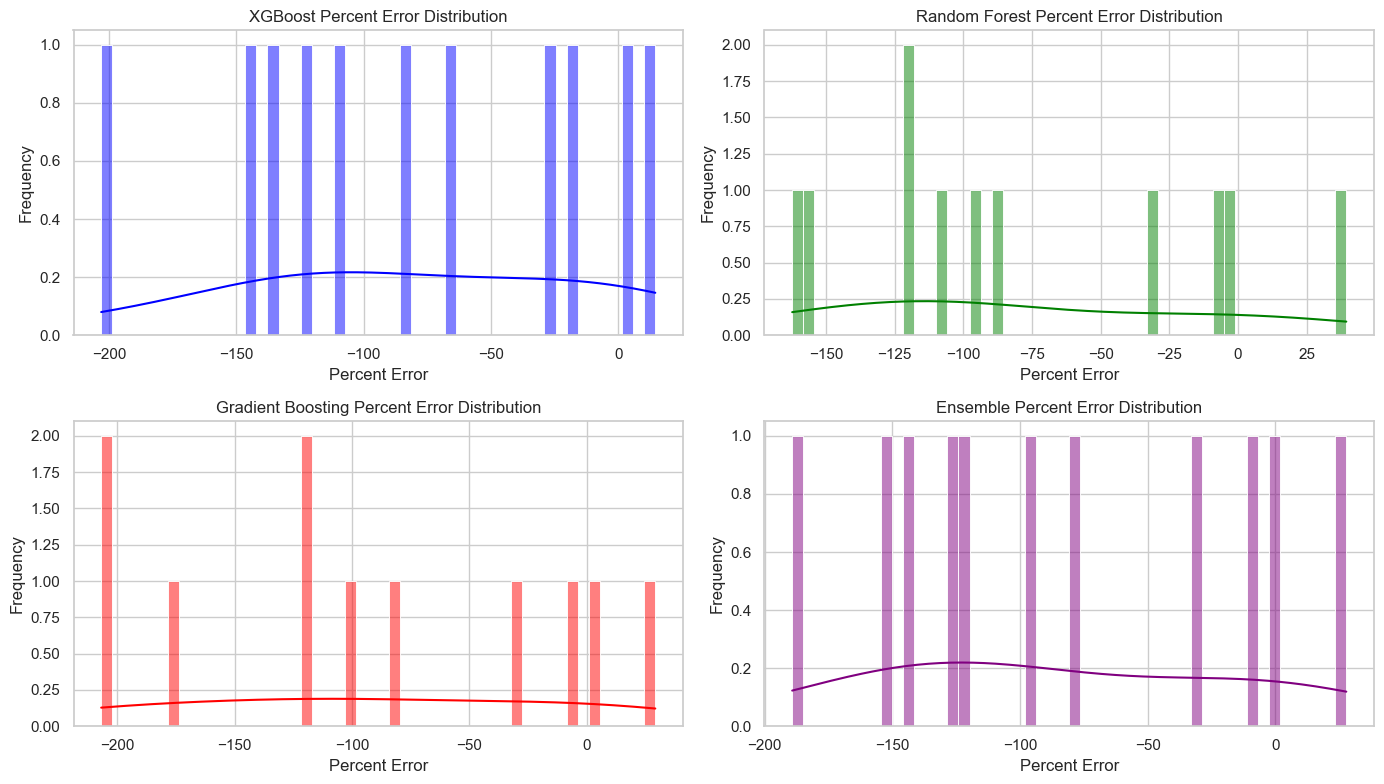

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of Percent Errors for each model
plt.figure(figsize=(14, 8))

# XGBoost
plt.subplot(2, 2, 1)
sns.histplot(results_df['Percent_Error_XGBoost'], bins=50, kde=True, color='blue')
plt.title('XGBoost Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

# Random Forest
plt.subplot(2, 2, 2)
sns.histplot(results_df['Percent_Error_RandomForest'], bins=50, kde=True, color='green')
plt.title('Random Forest Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

# Gradient Boosting
plt.subplot(2, 2, 3)
sns.histplot(results_df['Percent_Error_GradientBoosting'], bins=50, kde=True, color='red')
plt.title('Gradient Boosting Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

# Ensemble
plt.subplot(2, 2, 4)
sns.histplot(results_df['Percent_Error_Ensemble'], bins=50, kde=True, color='purple')
plt.title('Ensemble Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the MAPE for each model
# models = ['XGBoost', 'Random Forest', 'Gradient Boosting', 'Ensemble']
# mape_values = [mape_xgboost, mape_randomforest, mape_gradientboosting, mape_ensemble]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=models, y=mape_values, palette='viridis')
# plt.title('Mean Absolute Percent Error (MAPE) by Model')
# plt.xlabel('Model')
# plt.ylabel('MAPE')
# plt.ylim(0, max(mape_values) + 5)

plt.show()


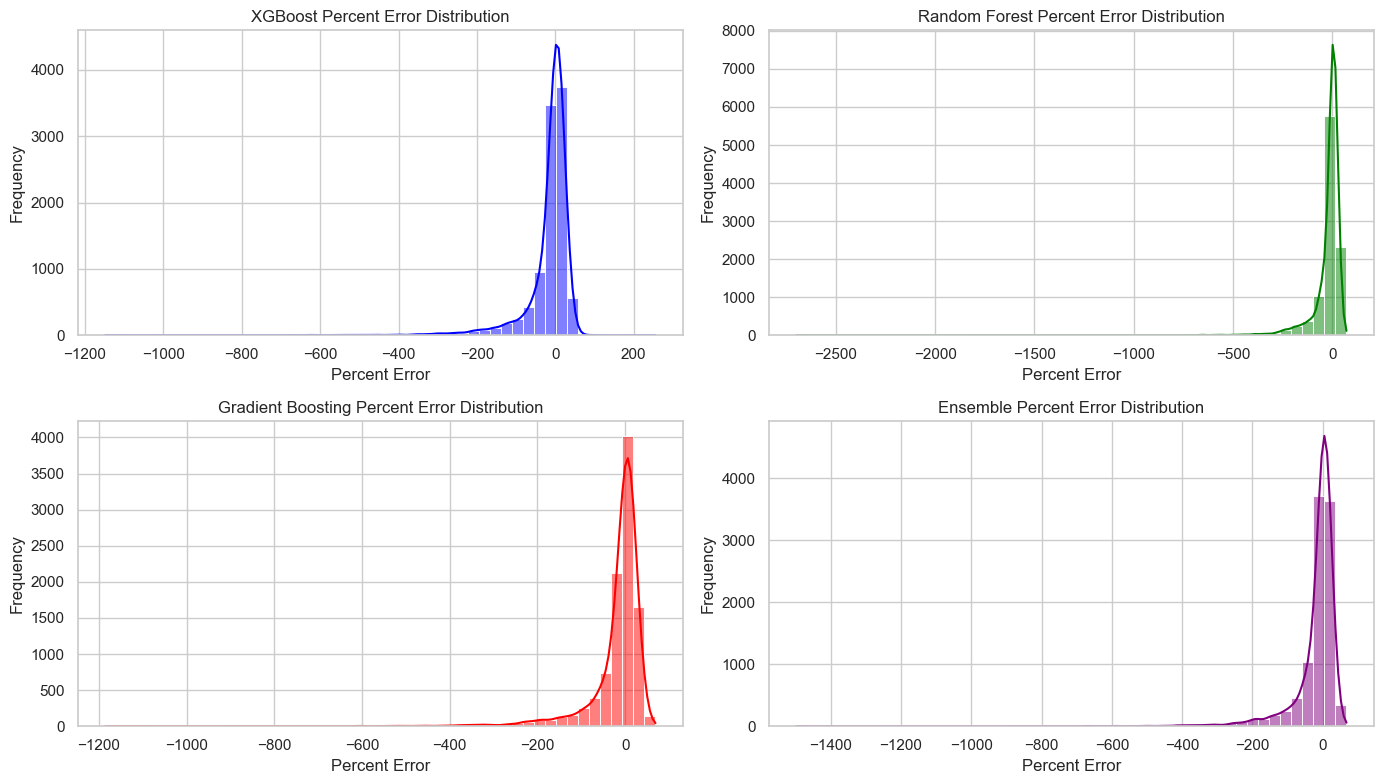

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of Percent Errors for each model
plt.figure(figsize=(14, 8))

# XGBoost
plt.subplot(2, 2, 1)
sns.histplot(results_df['Percent_Error_XGBoost'], bins=50, kde=True, color='blue')
plt.title('XGBoost Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

# Random Forest
plt.subplot(2, 2, 2)
sns.histplot(results_df['Percent_Error_RandomForest'], bins=50, kde=True, color='green')
plt.title('Random Forest Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

# Gradient Boosting
plt.subplot(2, 2, 3)
sns.histplot(results_df['Percent_Error_GradientBoosting'], bins=50, kde=True, color='red')
plt.title('Gradient Boosting Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

# Ensemble
plt.subplot(2, 2, 4)
sns.histplot(results_df['Percent_Error_Ensemble'], bins=50, kde=True, color='purple')
plt.title('Ensemble Percent Error Distribution')
plt.xlabel('Percent Error')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot the MAPE for each model
# models = ['XGBoost', 'Random Forest', 'Gradient Boosting', 'Ensemble']
# mape_values = [mape_xgboost, mape_randomforest, mape_gradientboosting, mape_ensemble]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=models, y=mape_values, palette='viridis')
# plt.title('Mean Absolute Percent Error (MAPE) by Model')
# plt.xlabel('Model')
# plt.ylabel('MAPE')
# plt.ylim(0, max(mape_values) + 5)

plt.show()


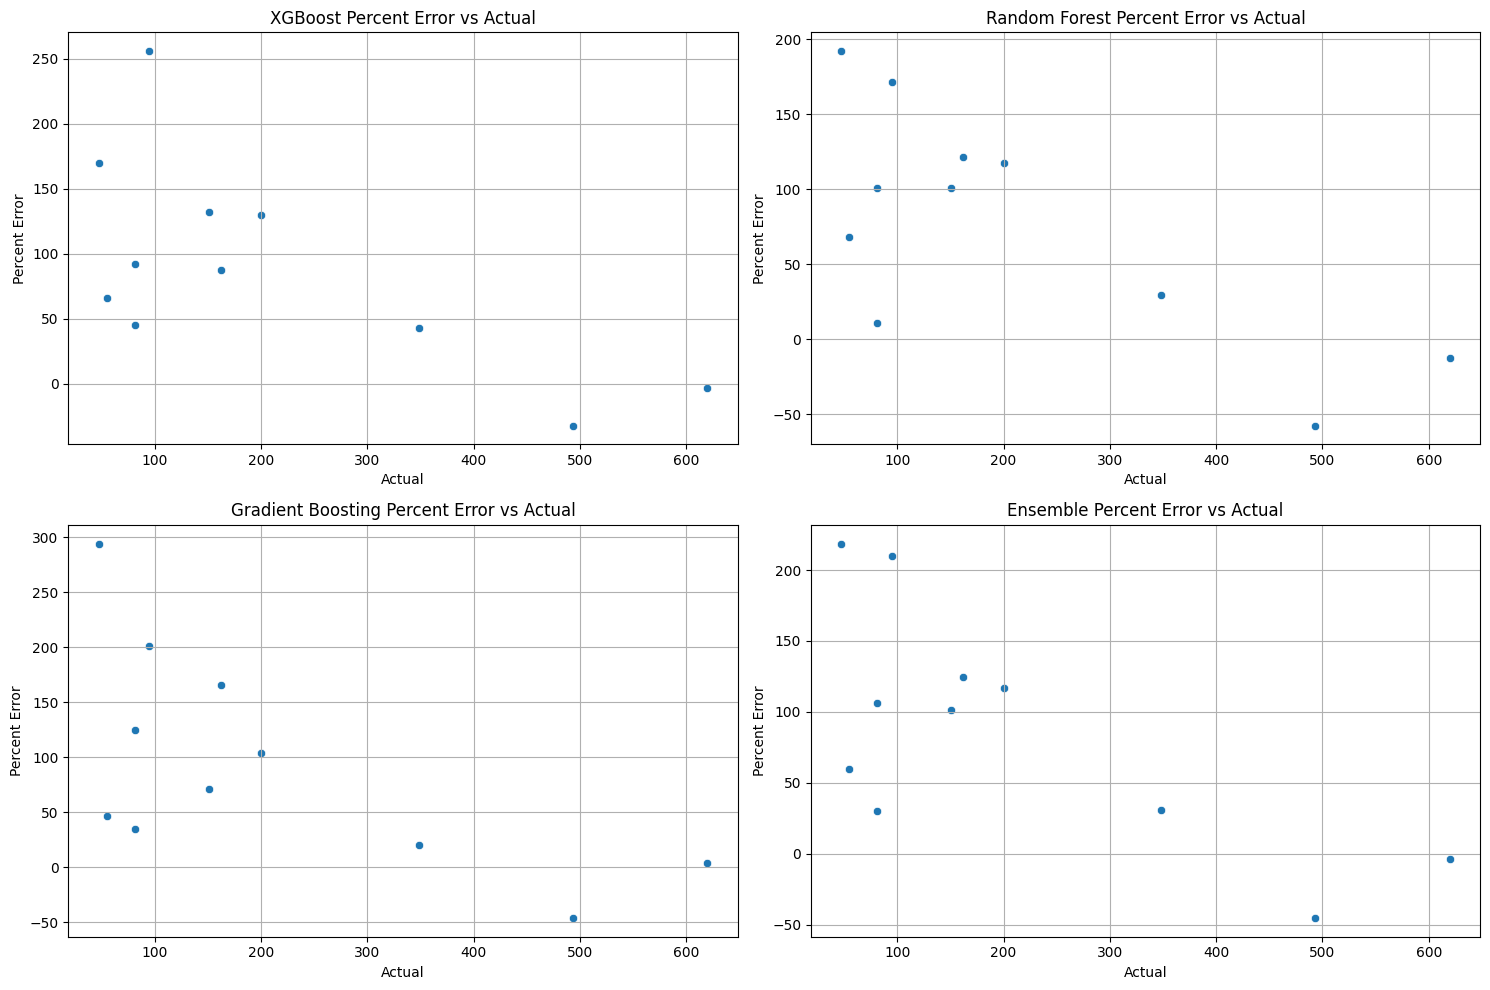

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the errors for each model
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_XGBoost']*-1)
plt.title('XGBoost Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')
plt.grid(True)


plt.subplot(2, 2, 2)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_RandomForest']*-1)
plt.title('Random Forest Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')
plt.grid(True)


plt.subplot(2, 2, 3)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_GradientBoosting']*-1)
plt.title('Gradient Boosting Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')
plt.grid(True)


plt.subplot(2, 2, 4)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_Ensemble']*-1)
plt.title('Ensemble Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.tight_layout()
plt.grid(True)
plt.show()


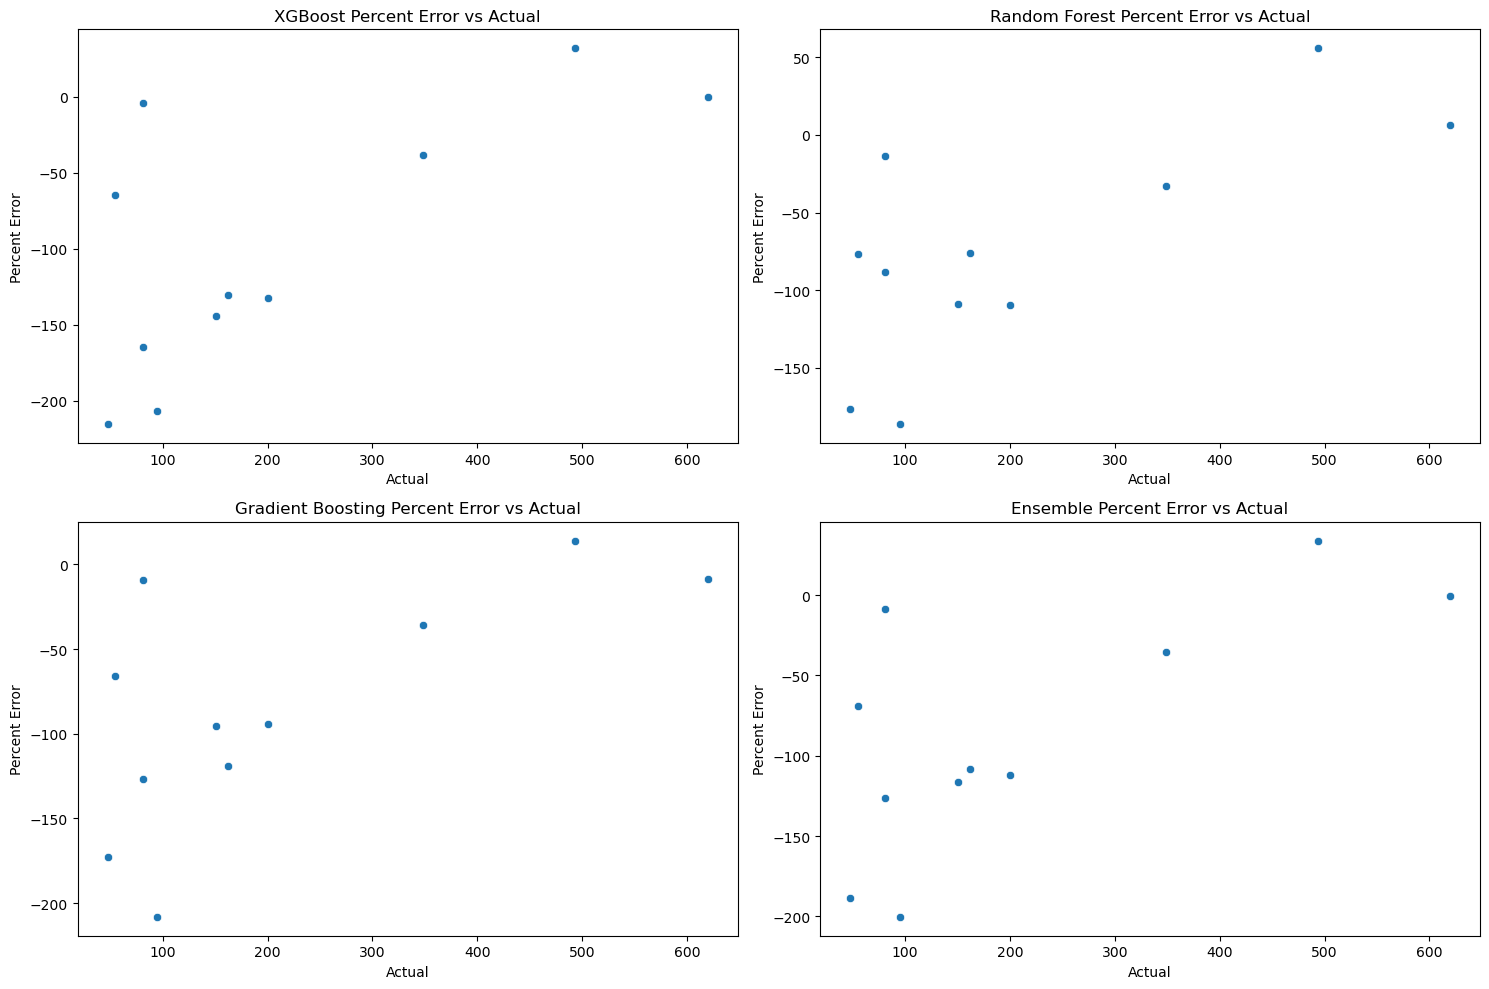

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the errors for each model
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_XGBoost'])
plt.title('XGBoost Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.subplot(2, 2, 2)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_RandomForest'])
plt.title('Random Forest Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.subplot(2, 2, 3)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_GradientBoosting'])
plt.title('Gradient Boosting Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.subplot(2, 2, 4)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_Ensemble'])
plt.title('Ensemble Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.tight_layout()
plt.show()


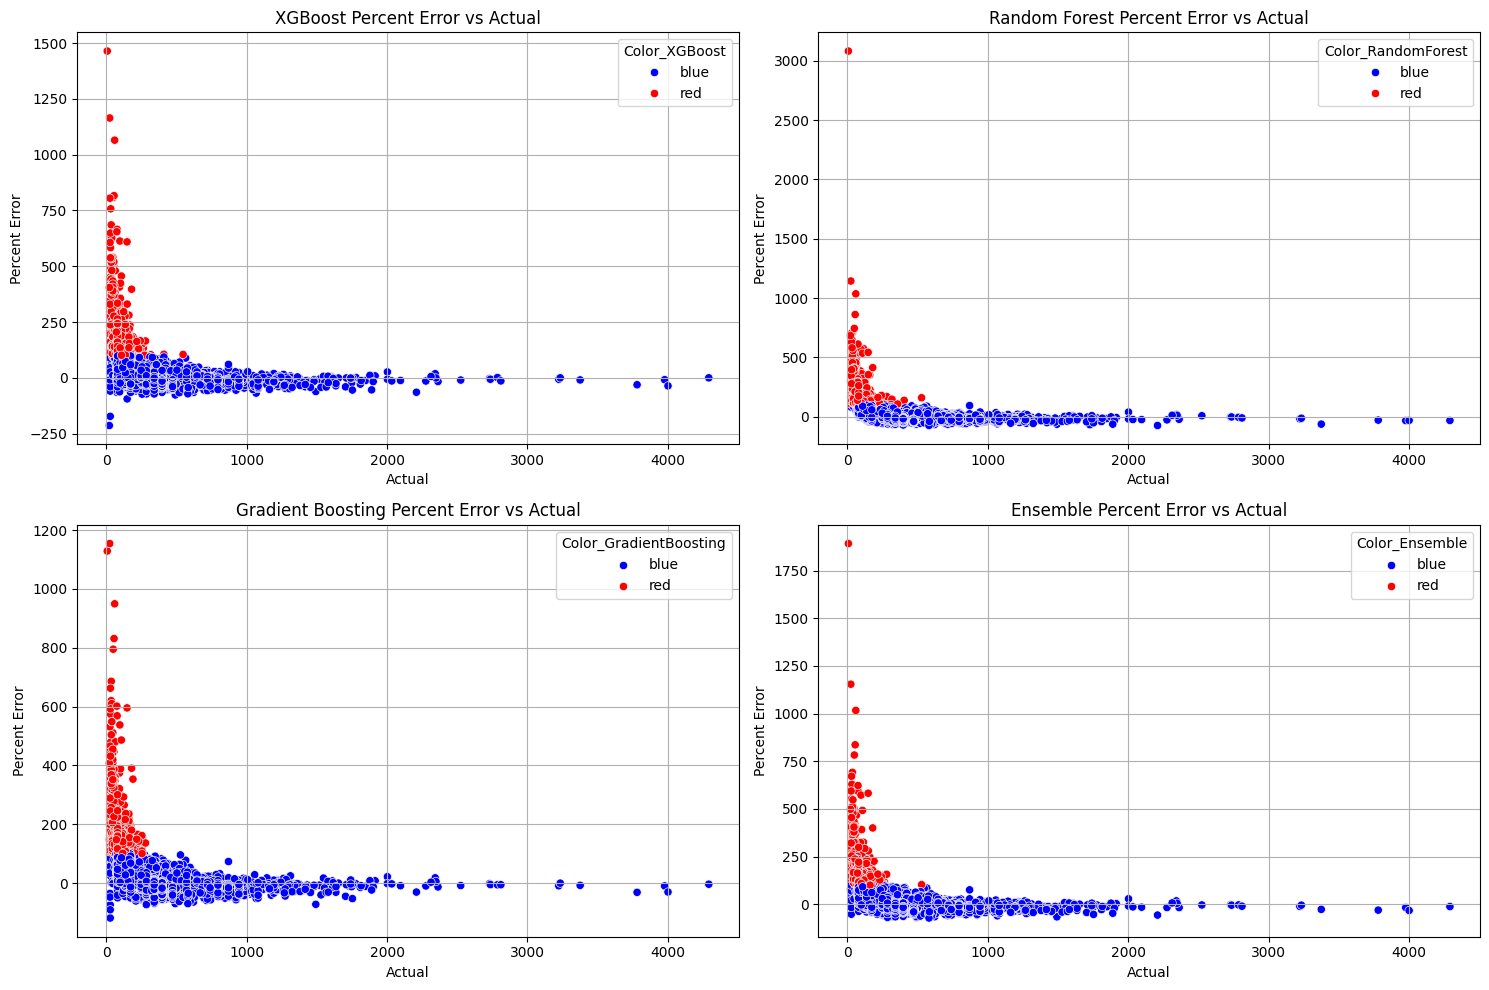

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to apply color based on the percent error value
def color_by_error(value):
    return 'blue' if value > -100 else 'red'

# Create a color column based on the percent error for each model
results_df['Color_XGBoost'] = results_df['Percent_Error_XGBoost'].apply(color_by_error)
results_df['Color_RandomForest'] = results_df['Percent_Error_RandomForest'].apply(color_by_error)
results_df['Color_GradientBoosting'] = results_df['Percent_Error_GradientBoosting'].apply(color_by_error)
results_df['Color_Ensemble'] = results_df['Percent_Error_Ensemble'].apply(color_by_error)

# Plot the errors for each model
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_XGBoost']*-1, hue=results_df['Color_XGBoost'], palette=['blue', 'red'])
plt.title('XGBoost Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')
plt.grid(visible=True)

plt.subplot(2, 2, 2)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_RandomForest']*-1, hue=results_df['Color_RandomForest'], palette=['blue', 'red'])
plt.title('Random Forest Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')
plt.grid(visible=True)

plt.subplot(2, 2, 3)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_GradientBoosting']*-1, hue=results_df['Color_GradientBoosting'], palette=['blue', 'red'])
plt.title('Gradient Boosting Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')
plt.grid(visible=True)

plt.subplot(2, 2, 4)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_Ensemble']*-1, hue=results_df['Color_Ensemble'], palette=['blue', 'red'])
plt.title('Ensemble Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.tight_layout()
plt.grid(visible=True)
plt.show()


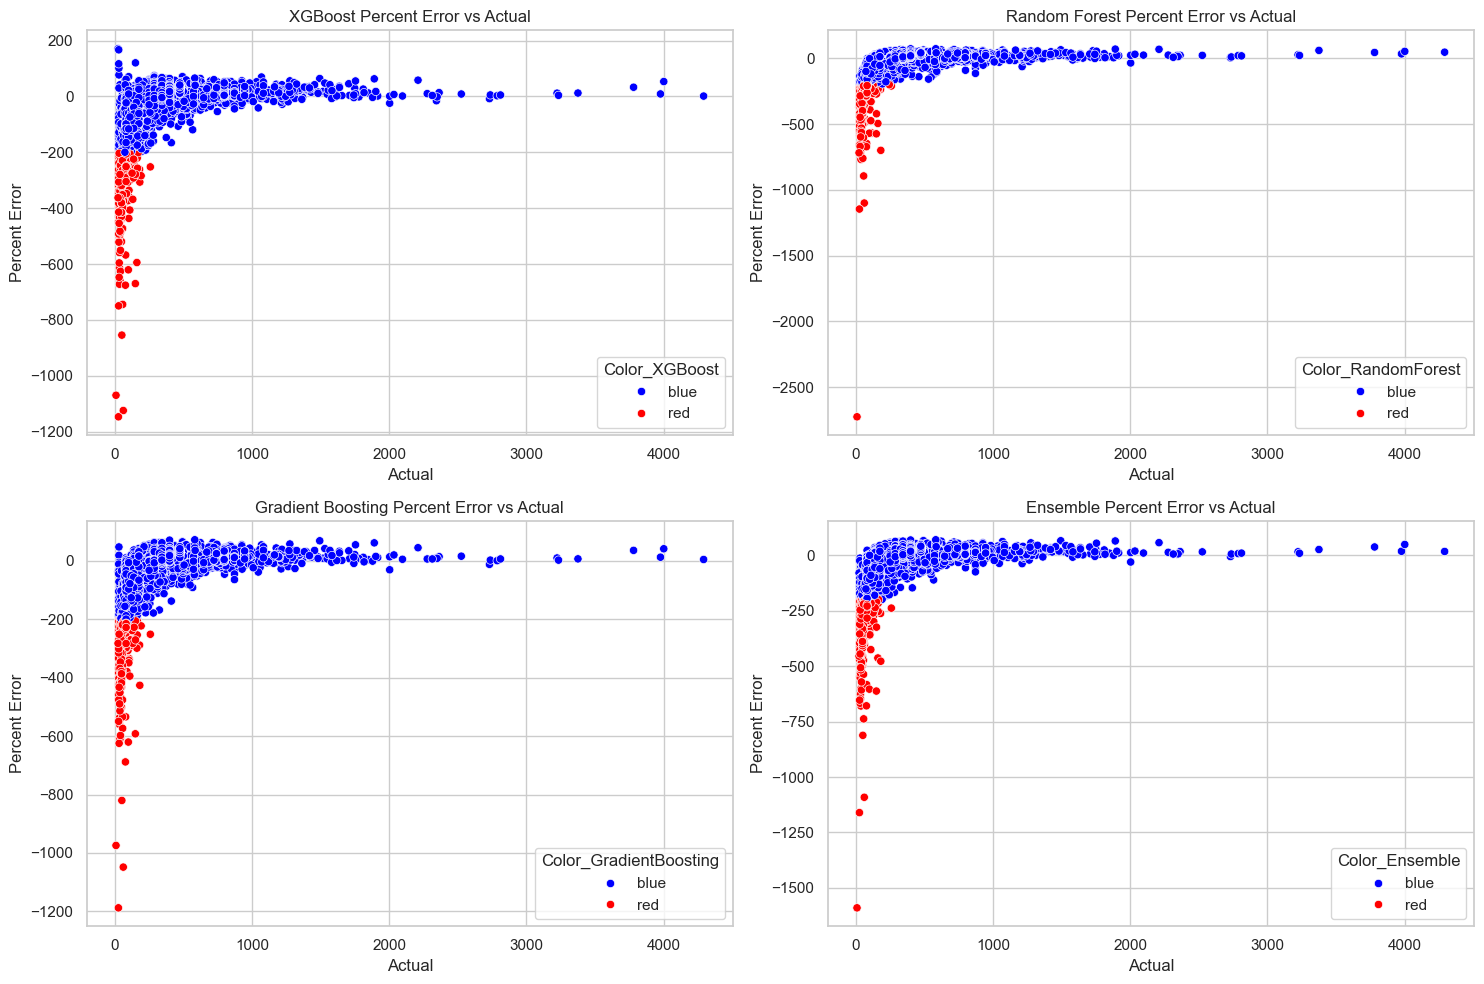

In [396]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to apply color based on the percent error value
def color_by_error(value):
    return 'blue' if value > -200 else 'red'

# Create a color column based on the percent error for each model
results_df['Color_XGBoost'] = results_df['Percent_Error_XGBoost'].apply(color_by_error)
results_df['Color_RandomForest'] = results_df['Percent_Error_RandomForest'].apply(color_by_error)
results_df['Color_GradientBoosting'] = results_df['Percent_Error_GradientBoosting'].apply(color_by_error)
results_df['Color_Ensemble'] = results_df['Percent_Error_Ensemble'].apply(color_by_error)

# Plot the errors for each model
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_XGBoost'], hue=results_df['Color_XGBoost'], palette=['blue', 'red'])
plt.title('XGBoost Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.subplot(2, 2, 2)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_RandomForest'], hue=results_df['Color_RandomForest'], palette=['blue', 'red'])
plt.title('Random Forest Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.subplot(2, 2, 3)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_GradientBoosting'], hue=results_df['Color_GradientBoosting'], palette=['blue', 'red'])
plt.title('Gradient Boosting Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.subplot(2, 2, 4)
sns.scatterplot(x=results_df['Actual'], y=results_df['Percent_Error_Ensemble'], hue=results_df['Color_Ensemble'], palette=['blue', 'red'])
plt.title('Ensemble Percent Error vs Actual')
plt.xlabel('Actual')
plt.ylabel('Percent Error')

plt.tight_layout()
plt.show()


In [450]:
results_df[results_df["Percent_Error_Ensemble"] < -200]

Actual  Predicted_XGBoost  Percent_Error_XGBoost  \
47     139.520         449.846283            -222.424228   
237    161.900         459.404877            -183.758417   
263     80.950         292.158783            -260.912641   
442     80.950         248.347839            -206.791648   
470     62.300         262.714111            -321.691993   
...        ...                ...                    ...   
9528    22.380          78.229485            -249.550869   
9702    80.950         281.982422            -248.341472   
9862    80.950         285.147217            -252.251040   
9978    30.222         124.549240            -312.114487   
10034   80.950         258.622589            -219.484360   

       Predicted_RandomForest  Percent_Error_RandomForest  \
47                 439.507631                 -215.014071   
237                510.865425                 -215.543808   
263                263.983369                 -226.106695   
442                250.312318                 -209.218428   
470                238.825274                 -283.347150   
...                       ...                         ...   
9528               181.416343                 -710.618157   
9702               238.245917                 -194.312436   
9862               288.556522                 -256.462658   
9978               160.415046                 -430.788982   
10034              240.098627                 -196.601146   

       Predicted_GradientBoosting  Percent_Error_GradientBoosting  \
47                     457.933281                     -228.220529   
237                    489.374347                     -202.269516   
263                    291.903961                     -260.597852   
442                    246.185536                     -204.120489   
470                    254.999876                     -309.309593   
...                           ...                             ...   
9528                    98.490456                     -340.082465   
9702                   255.249505                     -215.317486   
9862                   309.819354                     -282.729283   
9978                   171.223046                     -466.551010   
10034                  274.773286                     -239.435807   

       Predicted_Ensemble  Percent_Error_Ensemble Color_XGBoost  \
47             449.095732             -221.886276           red   
237            486.548216             -200.523914          blue   
263            282.682038             -249.205729           red   
442            248.281898             -206.710189           red   
470            252.179754             -304.782912           red   
...                   ...                     ...           ...   
9528           119.378761             -433.417164           red   
9702           258.492615             -219.323798           red   
9862           294.507698             -263.814327           red   
9978           152.062444             -403.151493           red   
10034          257.831501             -218.507104           red   

      Color_RandomForest Color_GradientBoosting Color_Ensemble  
47                   red                    red            red  
237                  red                    red            red  
263                  red                    red            red  
442                  red                    red            red  
470                  red                    red            red  
...                  ...                    ...            ...  
9528                 red                    red            red  
9702                blue                    red            red  
9862                 red                    red            red  
9978                 red                    red            red  
10034               blue                    red            red  

[258 rows x 13 columns]

In [485]:
visits_and_hasar_.iloc[0]

farm_id                                      01_00_000008
national_id                                  1016020610.0
owner_name                     محمد بن ناشي حنيش المصارير
city                                               Riyadh
x_coordinate                            47.84234907700005
y_coordinate                                    24.204608
wells_number                                          6.0
connection_to_grid                                    0.0
total_mechanical_head_kw                           1342.8
total_electrical_load_kw                           1492.8
sprinklers_equipment_kw                             150.0
property_area                              1273708.051953
property_main_type                                    1.0
well_count                                              2
well_possession_type_1                                  2
well_possession_type_2                                  0
well_is_active_0                                        0
well_is_active

In [289]:
results_df[["Actual", "Predicted_Ensemble"]]

Actual  Predicted_Ensemble
0      1492.80          627.774128
1       360.70          241.318292
2       609.50          529.251785
3      1026.15          673.487870
4       398.00          225.864131
...        ...                 ...
10043   342.05          341.964259
10044   472.60          277.595454
10045   342.05          326.899861
10046   398.00          352.304377
10047   398.00          326.840253

[10048 rows x 2 columns]

In [292]:
results_df[["Predicted_Ensemble"]]*1.2

Predicted_Ensemble
0              753.328953
1              289.581950
2              635.102142
3              808.185444
4              271.036957
...                   ...
10043          410.357111
10044          333.114545
10045          392.279833
10046          422.765253
10047          392.208303

[10048 rows x 1 columns]

In [484]:
visits_and_hasar_

Actual  Predicted_XGBoost  Percent_Error_XGBoost  \
0      1492.80         534.417786              64.200309   
1       360.70         226.317230              37.256105   
2       609.50         632.586548              -3.787785   
3      1026.15         650.566711              36.601207   
4       398.00         228.678650              42.543053   
...        ...                ...                    ...   
10043   342.05         375.916595              -9.901066   
10044   472.60         326.360107              30.943693   
10045   342.05         313.841095               8.247012   
10046   398.00         369.163116               7.245448   
10047   398.00         359.723785               9.617139   

       Predicted_RandomForest  Percent_Error_RandomForest  \
0                  588.357976                   60.586952   
1                  257.638102                   28.572747   
2                  531.781817                   12.751138   
3                  708.424291                   30.962891   
4                  242.680046                   39.025114   
...                       ...                         ...   
10043              376.633624                  -10.110693   
10044              310.074510                   34.389651   
10045              318.347511                    6.929539   
10046              377.072415                    5.258187   
10047              378.289034                    4.952504   

       Predicted_GradientBoosting  Percent_Error_GradientBoosting  \
0                      599.896318                       59.814019   
1                      229.538600                       36.363016   
2                      549.221108                        9.889892   
3                      684.558387                       33.288663   
4                      229.564270                       42.320535   
...                           ...                             ...   
10043                  384.279326                      -12.345951   
10044                  324.286710                       31.382414   
10045                  321.158800                        6.107645   
10046                  378.112614                        4.996831   
10047                  376.657402                        5.362462   

       Predicted_Ensemble  Percent_Error_Ensemble Color_XGBoost  \
0              574.224027               61.533760          blue   
1              237.831311               34.063956          blue   
2              571.196491                6.284415          blue   
3              681.183130               33.617587          blue   
4              233.640989               41.296234          blue   
...                   ...                     ...           ...   
10043          378.943182              -10.785903          blue   
10044          320.240443               32.238586          blue   
10045          317.782469                7.094732          blue   
10046          374.782715                5.833489          blue   
10047          371.556740                6.644035          blue   

      Color_RandomForest Color_GradientBoosting Color_Ensemble  
0                   blue                   blue           blue  
1                   blue                   blue           blue  
2                   blue                   blue           blue  
3                   blue                   blue           blue  
4                   blue                   blue           blue  
...                  ...                    ...            ...  
10043               blue                   blue           blue  
10044               blue                   blue           blue  
10045               blue                   blue           blue  
10046               blue                   blue           blue  
10047               blue                   blue           blue  

[10048 rows x 13 columns]

## Bayesian


In [221]:
selected_columns = visits_and_hasar.filter(regex=r'farm_main_crops_type_\d+\.0')
main_crop_type = selected_columns.idxmax(axis=1).str.split('_', expand=True).iloc[:,[4]].rename(columns={4: 'main_crop_type'})

selected_columns = visits_and_hasar.filter(regex=r'farm_activity_status_\d+')
farm_activity_status = selected_columns.idxmax(axis=1).str.split('_', expand=True).iloc[:,[3]].rename(columns={3: 'farm_activity_status'})

selected_columns = visits_and_hasar.filter(regex=r'farm_type_\d+.0')
farm_type = selected_columns.idxmax(axis=1).str.split('_', expand=True).iloc[:,[2]].rename(columns={2: 'farm_type'})


selected_columns = visits_and_hasar.filter(regex=r'farm_irrigation_source_\d+.0')
farm_irrigation_source = selected_columns.idxmax(axis=1).str.split('_', expand=True).iloc[:,[3]].rename(columns={3: 'farm_irrigation_source'})

selected_columns = visits_and_hasar.filter(regex=r'farm_irrigation_type_\d+.0')
farm_irrigation_type = selected_columns.idxmax(axis=1).str.split('_', expand=True).iloc[:,[3]].rename(columns={3: 'farm_irrigation_type'})


visits_and_hasar_ = pd.concat([visits_and_hasar, main_crop_type, farm_activity_status, farm_type, farm_irrigation_source, farm_irrigation_type], axis=1)
visits_and_hasar_

farm_id                                         owner_name  \
0   09_00_000008                                        فيصل الحربي   
1   09_00_000100                          ماجد حمدان الشخطي الشمري    
2   09_00_000163                            فيصل عايد سلامة الشمري    
3   09_00_000166                             غافل منوخ غافل الشمري    
4   09_00_000171                          صعفق ممدوح الرخيص الشمري    
5   09_00_000173    سليمان صالح المحيميد الوكيل محمد براهيم الحمود    
6   09_00_000187  عجرم عطا الرخيص الشمري و منيف عجرم عطا الرخيص ...   
7   09_00_000211                             فيصل مشعل برغش التمياط   
8   09_00_000225                                عشيوي فياض الرسلاني   
9   09_00_000302  حاتم عمير عتيق المايق الشمري و عبدالله عمير عت...   
10  09_00_000696                              ماجد ثاني بطي العنزي    

     national_id  phone_number  x_coordinate  y_coordinate  generators_number  \
0            NaN     505810528     45.204582     28.590539                  0   
1            NaN     507329339     44.560322     29.058036                  0   
2   1.041377e+09     558259188     43.030509     29.844748                  0   
3   1.029361e+09     503995710     43.032131     29.856790                  0   
4   1.064257e+09     553385958     43.022004     29.887352                  0   
5   1.061185e+09     555171919     42.970730     29.908894                  0   
6            NaN     539336011     42.873459     29.965960                  0   
7   1.045900e+09     504863022     43.212718     29.970719                  0   
8            NaN     505492038     42.716719     29.984118                  0   
9            NaN     500223390     42.775525     30.024585                  1   
10           NaN     555384105     41.873069     30.562782                  3   

    total_generators_capacity_kw  actual_generators_loading_kw  wells_number  \
0                              0                           0.0             2   
1                              0                           0.0             2   
2                              0                           0.0             1   
3                              0                           0.0             2   
4                              0                           0.0             1   
5                              0                           0.0             1   
6                              0                           0.0             1   
7                              0                           0.0             3   
8                              0                           0.0             2   
9                             48                          38.4             2   
10                           313                         250.4             3   

    sprinklers_loading_kw  mechanical_head_1_hp  mechanical_head_2_hp  \
0                      50                   NaN                   NaN   
1                      50                 200.0                 200.0   
2                      25                   NaN                   NaN   
3                      50                   NaN                   NaN   
4                      25                   NaN                   NaN   
5                      25                   NaN                   NaN   
6                      25                   NaN                   NaN   
7                      75                 350.0                 350.0   
8                      50                   NaN                   NaN   
9                      50                   NaN                   NaN   
10                     75                   NaN                   NaN   

    total_mechanical_head_hp  total_mechanical_head_kw  \
0                          0                       0.0   
1                        400                     298.4   
2                          0                       0.0   
3                          0                       0.0   
4                          0                       0.0 

In [195]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import joblib
import os

def preprocess_data(farm_data):
    """
    Preprocess the input data by handling missing values and ensuring required columns.
    
    :param farm_data: DataFrame containing farm data
    :return: Preprocessed DataFrame
    """
    print('---------------- Data being processed ----------------')
    if not isinstance(farm_data, pd.DataFrame):
        raise ValueError("Input must be a pandas DataFrame")

    required_columns = ['farm_activity_area_hectares', 'main_crop_type', 'wells_number']
    for col in required_columns:
        if col not in farm_data.columns:
            raise ValueError(f"Missing required column: {col}")

    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    for equip_type in equipment_types:
        count_col = f'{equip_type}_equipment_count'
        kw_col = f'{equip_type}_equipment_kw'
        if count_col not in farm_data.columns:
            farm_data[count_col] = 0
        if kw_col not in farm_data.columns:
            farm_data[kw_col] = 0

    farm_data['farm_activity_area_hectares'] = farm_data['farm_activity_area_hectares'].fillna(farm_data['farm_activity_area_hectares'].median())
    farm_data['main_crop_type'] = farm_data['main_crop_type'].fillna('Unknown')
    farm_data['wells_number'] = farm_data['wells_number'].fillna(0).astype(int)

    print('---------------- Data processing is complete ----------------')
    
    return farm_data

def create_preprocessor():
    """
    Create a ColumnTransformer for preprocessing numerical and categorical data.
    
    :return: ColumnTransformer preprocessor
    """
    print('---------------- Data being transformed ----------------')
    return ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['farm_activity_area_hectares', 'wells_number']),
            ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['main_crop_type'])
        ])

def perform_clustering(farm_data, preprocessor, n_clusters=5):
    """
    Perform clustering on the farm data.
    
    :param farm_data: Preprocessed DataFrame
    :param preprocessor: ColumnTransformer preprocessor
    :param n_clusters: Number of clusters
    :return: Tuple of (cluster_pipeline, farm_data with cluster assignments)
    """
    
    print('---------------- Data clustering is starting  ----------------')
    cluster_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('clusterer', KMeans(n_clusters=n_clusters, n_init=10))
    ])
    farm_data['cluster'] = cluster_pipeline.fit_predict(farm_data[['farm_activity_area_hectares', 'main_crop_type', 'wells_number']])
    
    print('---------------- Data clustering is complete ----------------')
    return cluster_pipeline, farm_data

def train_rf_models(farm_data, preprocessor):
    """
    Train Random Forest models for equipment count prediction.
    
    :param farm_data: DataFrame with cluster assignments
    :param preprocessor: ColumnTransformer preprocessor
    :return: Dictionary of trained Random Forest models
    """
    
    print('---------------- Train Random Forest models started ----------------')
    rf_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ])
    
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    rf_models = {}
    for equip_type in equipment_types:
        rf_models[equip_type] = rf_pipeline.fit(
            farm_data[['farm_activity_area_hectares', 'main_crop_type', 'wells_number']], 
            farm_data[f'{equip_type}_equipment_count']
        )
        
    print('---------------- Train Random Forest models completed ----------------')
    return rf_models

def calculate_farm_data_stats(farm_data):
    """
    Calculate statistics for Bayesian estimation of equipment sizes.
    
    :param farm_data: DataFrame with cluster assignments
    :return: Dictionary of farm data statistics
    """
    print('---------------- Bayesian States are being calculated ----------------')
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    farm_data_stats = {}
    for equip_type in equipment_types:
        kw_col = f'{equip_type}_equipment_kw'
        farm_data_stats[equip_type] = {
            'mean': farm_data[kw_col].mean(),
            'std': farm_data[kw_col].std(),
            'cluster_means': farm_data.groupby('cluster')[kw_col].mean().to_dict(),
            'cluster_stds': farm_data.groupby('cluster')[kw_col].std().to_dict(),
            'cluster_counts': farm_data['cluster'].value_counts().to_dict()
        }
    print(farm_data_stats)
    print('---------------- Bayesian States are completed ----------------')
    return farm_data_stats

def equipment_size_bayesian(prior_mean, prior_std, data_mean, data_std, n):
    """
    Perform Bayesian estimation for equipment size.
    
    :param prior_mean: Prior mean
    :param prior_std: Prior standard deviation
    :param data_mean: Data mean
    :param data_std: Data standard deviation
    :param n: Number of data points
    :return: Posterior distribution
    """
    posterior_mean = (prior_mean/prior_std**2 + data_mean*n/data_std**2) / (1/prior_std**2 + n/data_std**2)
    posterior_std = np.sqrt(1 / (1/prior_std**2 + n/data_std**2))
    return stats.norm(posterior_mean, posterior_std)

def generate_predictions(farm_data, rf_models, farm_data_stats):
    """
    Generate predictions for equipment counts and sizes, ensuring the total equipment count
    exactly matches the number of wells for each farm.
    
    :param farm_data: DataFrame with cluster assignments
    :param rf_models: Dictionary of trained Random Forest models
    :param farm_data_stats: Dictionary of farm data statistics
    :return: DataFrame of predictions
    """
    predictions = []
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    
    for _, farm in farm_data.iterrows():
        farm_pred = {
            'farm_activity_area_hectares': farm['farm_activity_area_hectares'],
            'main_crop_type': farm['main_crop_type'],
            'wells_number': farm['wells_number']
        }
        
        # Predict equipment counts
        raw_counts = {}
        for equip_type in equipment_types:
            count_pred = rf_models[equip_type].predict(pd.DataFrame({
                'farm_activity_area_hectares': [farm['farm_activity_area_hectares']],
                'main_crop_type': [farm['main_crop_type']],
                'wells_number': [farm['wells_number']]
            }))
            raw_counts[equip_type] = max(0, count_pred[0])  # Ensure non-negative
        
        # Adjust counts to exactly match wells_number
        total_predicted = sum(raw_counts.values())
        if total_predicted > 0:
            # Distribute wells proportionally, rounding down
            adjusted_counts = {equip_type: int(farm['wells_number'] * count / total_predicted) 
                               for equip_type, count in raw_counts.items()}
            
            # Distribute any remaining wells to the equipment types with the highest fractional parts
            remaining_wells = farm['wells_number'] - sum(adjusted_counts.values())
            fractional_parts = {equip_type: farm['wells_number'] * count / total_predicted - adjusted_counts[equip_type] 
                                for equip_type, count in raw_counts.items()}
            
            for _ in range(remaining_wells):
                equip_type = max(fractional_parts, key=fractional_parts.get)
                adjusted_counts[equip_type] += 1
                fractional_parts[equip_type] -= 1
            
            for equip_type in equipment_types:
                farm_pred[f'{equip_type}_equipment_count'] = adjusted_counts[equip_type]
        else:
            # If no equipment was predicted, distribute evenly
            count_per_type = farm['wells_number'] // len(equipment_types)
            remainder = farm['wells_number'] % len(equipment_types)
            for i, equip_type in enumerate(equipment_types):
                farm_pred[f'{equip_type}_equipment_count'] = count_per_type + (1 if i < remainder else 0)
        
        # Estimate equipment sizes (this part remains unchanged)
        for equip_type in equipment_types:
            if farm_pred[f'{equip_type}_equipment_count'] > 0:
                stats = farm_data_stats[equip_type]
                prior_mean = stats['mean']
                prior_std = stats['std']
                data_mean = stats['cluster_means'].get(farm['cluster'], prior_mean)
                data_std = stats['cluster_stds'].get(farm['cluster'], prior_std)
                n = stats['cluster_counts'].get(farm['cluster'], 1)
                
                posterior_dist = equipment_size_bayesian(prior_mean, prior_std, data_mean, data_std, n)
                farm_pred[f'total_{equip_type}_kw'] = posterior_dist.rvs()
            else:
                farm_pred[f'total_{equip_type}_kw'] = 0
        
        predictions.append(farm_pred)
    
    return pd.DataFrame(predictions)

def improved_equipment_model(farm_data, save_path="./bayesian_model/"):
    """
    Main function to run the improved equipment model.
    
    :param farm_data: Input DataFrame containing farm data
    :param save_path: Path to save the trained models and data
    :return: Tuple of (predictions DataFrame, rf_models, cluster_pipeline, preprocessor, farm_data_stats)
    """
    # Step 1: Preprocess the data
    farm_data = preprocess_data(farm_data)
    
    # Step 2: Create preprocessor
    preprocessor = create_preprocessor()
    
    # Step 3: Perform clustering
    cluster_pipeline, farm_data = perform_clustering(farm_data, preprocessor)
    
    # Step 4: Train Random Forest models
    rf_models = train_rf_models(farm_data, preprocessor)
    
    # Step 5: Calculate farm data statistics
    farm_data_stats = calculate_farm_data_stats(farm_data)
    
    # Step 6: Generate predictions
    predictions = generate_predictions(farm_data, rf_models, farm_data_stats)
    
    predictions['cluster'] = farm_data['cluster']
    
    # Save models and data
    os.makedirs(save_path, exist_ok=True)
    joblib.dump(rf_models, f'{save_path}/rf_models.joblib')
    joblib.dump(cluster_pipeline, f'{save_path}/cluster_model.joblib')
    joblib.dump(preprocessor, f'{save_path}/preprocessor.joblib')
    joblib.dump(farm_data_stats, f'{save_path}/farm_data_stats.joblib')
    
    return predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats

# Usage example:
predictions, rf_models, cluster_pipeline, preprocessor, farm_data_stats = improved_equipment_model(visits_and_hasar_)
predictions

---------------- Data being processed ----------------
---------------- Data processing is complete ----------------
---------------- Data being transformed ----------------
---------------- Data clustering is starting  ----------------
---------------- Data clustering is complete ----------------
---------------- Train Random Forest models started ----------------
---------------- Train Random Forest models completed ----------------
---------------- Bayesian States are being calculated ----------------
{'mechanical': {'mean': 350.2443482098672, 'std': 282.04609192140026, 'cluster_means': {0: 298.7080831390307, 1: 292.1284758588833, 2: 850.408606103654, 3: 406.8426750324747, 4: 1272.7306867127384}, 'cluster_stds': {0: 193.37243724750488, 1: 195.20427885909453, 2: 356.63180197097995, 3: 252.09588666380927, 4: 1007.2029366152178}, 'cluster_counts': {1: 5557, 0: 2560, 3: 1229, 2: 621, 4: 81}}, 'electrical': {'mean': 33.55839701286135, 'std': 92.73143152167586, 'cluster_means': {0: 26.613

farm_activity_area_hectares main_crop_type  wells_number  \
0                        46.750421            4.0             6   
1                        42.246073            1.0             1   
2                        96.493831           15.0             2   
3                        86.170176            1.0             3   
4                        61.862922           15.0             1   
...                            ...            ...           ...   
10043                    82.734726            1.0             1   
10044                    41.266395            1.0             1   
10045                    81.160858            1.0             1   
10046                    82.228900            1.0             1   
10047                    63.582407            1.0             1   

       mechanical_equipment_count  electrical_equipment_count  \
0                               2                           2   
1                               1                           0   
2                               1                           1   
3                               1                           1   
4                               1                           0   
...                           ...                         ...   
10043                           1                           0   
10044                           1                           0   
10045                           1                           0   
10046                           1                           0   
10047                           1                           0   

       submersible_equipment_count  pumps_equipment_count  \
0                                1                      1   
1                                0                      0   
2                                0                      0   
3                                1                      0   
4                                0                      0   
...                            ...                    ...   
10043                            0                      0   
10044                            0                      0   
10045                            0                      0   
10046                            0                      0   
10047                            0                      0   

       total_mechanical_kw  total_electrical_kw  total_submersible_kw  \
0               858.897904            74.853533             50.124595   
1               291.739420             0.000000              0.000000   
2               402.634887            47.199084              0.000000   
3               841.358917            75.029269             45.351284   
4               301.358641             0.000000              0.000000   
...                    ...                  ...                   ...   
10043           293.435331             0.000000              0.000000   
10044           289.808288             0.000000              0.000000   
10045           295.267618             0.000000              0.000000   
10046           290.107533             0.000000              0.000000   
10047           294.053401             0.000000              0.000000   

       total_pumps_kw  cluster  
0           18.399475        2  
1            0.000000        1  
2            0.000000        3  
3            0.000000        2  
4            0.000000        0  
...               ...      ...  
10043        0.000000        1  
10044        0.000000        1  
10045        0.000000        1  
10046        0.000000        1  
10047        0.000000        1  

[10048 rows x 12 columns]

In [168]:
visits_and_hasar_.head(1)

farm_id   national_id                  owner_name    city  \
0  01_00_000008  1.016021e+09  محمد بن ناشي حنيش المصارير  Riyadh   

        x_coordinate  y_coordinate  wells_number  connection_to_grid  \
0  47.84234907700005     24.204608             6                 0.0   

   total_mechanical_head_kw  total_electrical_load_kw  \
0                    1342.8                    1492.8   

   mechanical_equipment_count  electrical_equipment_count  \
0                           3                           0   

   submersible_equipment_count  pumps_equipment_count  \
0                            2                      1   

   mechanical_equipment_kw  electrical_equipment_kw  submersible_equipment_kw  \
0              1030.033134                      0.0                146.982449   

   pumps_equipment_kw  sprinklers_equipment_kw  property_area  \
0           129.49303                    150.0   1.273708e+06   

   property_main_type  well_count  well_possession_type_1  \
0                 1.0           2                       2   

   well_possession_type_2  well_is_active_0  well_is_active_1  \
0                       0                 0                 2   

   well_is_active_2  well_irrigation_source_0  well_irrigation_source_1  \
0                 0                         0                         1   

   well_irrigation_source_2  well_irrigation_source_4  \
0                         1                         0   

   well_irrigation_source_5  well_irrigation_source_6  \
0                         0                         0   

   well_irrigation_source_10  well_irrigation_source_12  \
0                          0                          0   

   well_irrigation_type_0.0  well_irrigation_type_1.0  \
0                         0                         1   

   well_irrigation_type_2.0  well_irrigation_type_3.0  \
0                         0                         1   

   well_irrigation_type_4.0  well_irrigation_type_6.0  \
0                         0                         0   

   well_irrigation_type_7.0  farm_crops_type  farm_activity_area_hectares  \
0                         0                4                    46.750421   

   farm_trees_count  farm_house_count  farm_plantations_count  \
0               0.0               0.0                     0.0   

   farm_activity_length_m  farm_activity_area_sq_m  farm_geometry  \
0             6579.811336             467504.20603             11   

   farm_main_crops_type_0.0  farm_main_crops_type_1.0  \
0                         0                         2   

   farm_main_crops_type_2.0  farm_main_crops_type_3.0  \
0                         0                         0   

   farm_main_crops_type_4.0  farm_main_crops_type_5.0  \
0                         9                         0   

   farm_main_crops_type_6.0  farm_main_crops_type_7.0  \
0                         0                         0   

   farm_main_crops_type_8.0  farm_main_crops_type_9.0  \
0                         0                         0   

   farm_main_crops_type_10.0  farm_main_crops_type_12.0  \
0                          0                          0   

   farm_main_crops_type_13.0  farm_main_crops_type_14.0  \
0                          0                          0   

   farm_main_crops_type_15.0  farm_activity_status_0  farm_activity_status_1  \
0                          0                       0                       5   

   farm_activity_status_3  farm_activity_status_4  farm_activity_status_6  \
0                       6                       0                       0   

   farm_type_0.0  farm_type_1.0  farm_type_2.0  farm_type_5.0  farm_type_6.0  \
0              0              9              2              0              0   

   farm_type_7.0  farm_type_10.0  farm_type_11.0  farm_irrigation_source_0.0  \
0              0               0               0                           0   

   farm_irrigation_source_1.0  farm_irrigation_source_2.0  \
0                           0            

In [196]:
visits_and_hasar_ = pd.concat(
    [
        visits_and_hasar_.drop(
            columns=[
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "mechanical_equipment_kw",
                "electrical_equipment_kw",
                "submersible_equipment_kw",
                "pumps_equipment_kw",
            ]
        ),
        predictions[
            [
                "total_mechanical_kw",
                "total_electrical_kw",
                "total_submersible_kw",
                "total_pumps_kw",
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
            ]
        ],
    ],
    axis=1,
)
visits_and_hasar_

farm_id   national_id                           owner_name  \
0      01_00_000008  1.016021e+09           محمد بن ناشي حنيش المصارير   
1      01_00_000012  1.025070e+09                 ذيب حسن هيف القحطاني   
2      01_00_000014  1.035060e+09     محمد سعيد منصور الحمالين الدوسري   
3      01_00_000016  1.024351e+09             نايف حسين شميعان الدوسري   
4      01_00_000017  1.022139e+09         مسعود بن حسين شميعان الدوسري   
...             ...           ...                                  ...   
10043  07_00_013777  1.012301e+09  عبدالعزيز فهد عبدالكريم علي المديني   
10044  07_00_013781           NaN           أمل ‏عبد الرحمن عواد الحجي   
10045  07_00_013868           NaN               سليمان عيد محمد العطوي   
10046  07_00_013869  1.000781e+09          مطير عوده حماد حنيحن العطوي   
10047  07_00_013883           NaN               سليم عوده سويلم العطوي   

         city       x_coordinate  y_coordinate  wells_number  \
0      Riyadh  47.84234907700005     24.204608             6   
1      Riyadh  47.74215832700003     24.085197             1   
2      Riyadh   47.8575844470001     24.225654             2   
3      Riyadh  47.82232783800004     24.284928             3   
4      Riyadh   47.6515339580001     24.112411             1   
...       ...                ...           ...           ...   
10043   Tabuk          36.811863     28.324411             1   
10044   Tabuk          36.448166     28.531969             1   
10045   Tabuk          36.087837     28.543844             1   
10046   Tabuk          36.079079     28.553778             1   
10047   Tabuk          36.788307     28.309277             1   

       connection_to_grid  total_mechanical_head_kw  total_electrical_load_kw  \
0                     0.0                   1342.80                   1492.80   
1                     0.0                    223.80                    360.70   
2                     0.0                    559.50                    609.50   
3                     1.0                    951.15                   1026.15   
4                     1.0                    261.10                    398.00   
...                   ...                       ...                       ...   
10043                 0.0                    317.05                    342.05   
10044                 0.0                    447.60                    472.60   
10045                 0.0                    317.05                    342.05   
10046                 0.0                    373.00                    398.00   
10047                 0.0                    373.00                    398.00   

       sprinklers_equipment_kw  property_area  property_main_type  well_count  \
0                        150.0   1.273708e+06                 1.0           2   
1                         25.0   1.449119e+06                 1.0           3   
2                         50.0   1.710511e+06                 5.0           3   
3                         75.0   1.171881e+06                 1.0           2   
4                         25.0   2.063067e+06                 3.0           3   
...                        ...            ...                 ...         ...   
10043                     25.0   1.064688e+06                 1.0           1   
10044                     25.0   5.385670e+05                 1.0           1   
10045                     25.0   2.351574e+06                 1.0           2   
10046                     25.0   1.566152e+06                 3.0           2   
10047                     25.0   1.022357e+06                 1.0           1   

       well_possession_type_1  well_possession_type_2  well_is_active_0  \
0                           2                       0                 0   
1                           3                       0                 0   
2                           3                       0                 0   
3                           2                       0                 0   
4                           3    

In [222]:
import pandas as pd
import numpy as np
from scipy import stats
import joblib

def equipment_model_inference(new_farm_data, model_path="./bayesian_model/"):
    """
    Perform inference on new farm data using the trained equipment model.
    
    :param new_farm_data: DataFrame containing new farm data
    :param model_path: Path where the trained models and data are saved
    :return: DataFrame of predictions for the new farm data, including cluster assignments
    """
    print('---------------- Starting inference ----------------')

    # Load saved models and data
    rf_models = joblib.load(f'{model_path}/rf_models.joblib')
    cluster_pipeline = joblib.load(f'{model_path}/cluster_model.joblib')
    preprocessor = joblib.load(f'{model_path}/preprocessor.joblib')
    farm_data_stats = joblib.load(f'{model_path}/farm_data_stats.joblib')

    # Ensure new_farm_data is a DataFrame
    if not isinstance(new_farm_data, pd.DataFrame):
        new_farm_data = pd.DataFrame([new_farm_data])

    # Preprocess the new data
    print('---------------- Preprocessing new data ----------------')
    required_columns = ['farm_activity_area_hectares', 'main_crop_type', 'wells_number']
    for col in required_columns:
        if col not in new_farm_data.columns:
            raise ValueError(f"Missing required column: {col}")

    new_farm_data['farm_activity_area_hectares'] = new_farm_data['farm_activity_area_hectares'].fillna(new_farm_data['farm_activity_area_hectares'].median())
    new_farm_data['main_crop_type'] = new_farm_data['main_crop_type'].fillna(0).astype(int)
    new_farm_data['wells_number'] = new_farm_data['wells_number'].fillna(0).astype(int)

    # Assign clusters to new data
    print('---------------- Assigning clusters to new data ----------------')
    new_farm_data['cluster'] = cluster_pipeline.predict(new_farm_data[required_columns])

    # Generate predictions
    print('---------------- Generating predictions ----------------')
    predictions = []
    equipment_types = ['mechanical', 'electrical', 'submersible', 'pumps']
    
    for _, farm in new_farm_data.iterrows():
        farm_pred = {
            'farm_activity_area_hectares': farm['farm_activity_area_hectares'],
            'main_crop_type': farm['main_crop_type'],
            'wells_number': farm['wells_number'],
            'cluster': farm['cluster']  # Include cluster assignment in predictions
        }
        
        # Predict equipment counts
        raw_counts = {}
        for equip_type in equipment_types:
            count_pred = rf_models[equip_type].predict(pd.DataFrame({
                'farm_activity_area_hectares': [farm['farm_activity_area_hectares']],
                'main_crop_type': [farm['main_crop_type']],
                'wells_number': [farm['wells_number']]
            }))
            raw_counts[equip_type] = max(0, count_pred[0])  # Ensure non-negative
        
        # Adjust counts to exactly match wells_number
        total_predicted = sum(raw_counts.values())
        if total_predicted > 0:
            # Distribute wells proportionally, rounding down
            adjusted_counts = {equip_type: int(farm['wells_number'] * count / total_predicted) 
                               for equip_type, count in raw_counts.items()}
            
            # Distribute any remaining wells to the equipment types with the highest fractional parts
            remaining_wells = farm['wells_number'] - sum(adjusted_counts.values())
            fractional_parts = {equip_type: farm['wells_number'] * count / total_predicted - adjusted_counts[equip_type] 
                                for equip_type, count in raw_counts.items()}
            
            for _ in range(remaining_wells):
                equip_type = max(fractional_parts, key=fractional_parts.get)
                adjusted_counts[equip_type] += 1
                fractional_parts[equip_type] -= 1
            
            for equip_type in equipment_types:
                farm_pred[f'{equip_type}_equipment_count'] = adjusted_counts[equip_type]
        else:
            # If no equipment was predicted, distribute evenly
            count_per_type = farm['wells_number'] // len(equipment_types)
            remainder = farm['wells_number'] % len(equipment_types)
            for i, equip_type in enumerate(equipment_types):
                farm_pred[f'{equip_type}_equipment_count'] = count_per_type + (1 if i < remainder else 0)
        
        # Estimate equipment sizes
        for equip_type in equipment_types:
            if farm_pred[f'{equip_type}_equipment_count'] > 0:
                stats_data = farm_data_stats[equip_type]
                prior_mean = stats_data['mean']
                prior_std = stats_data['std']
                data_mean = stats_data['cluster_means'].get(farm['cluster'], prior_mean)
                data_std = stats_data['cluster_stds'].get(farm['cluster'], prior_std)
                n = stats_data['cluster_counts'].get(farm['cluster'], 1)
                
                posterior_mean = (prior_mean/prior_std**2 + data_mean*n/data_std**2) / (1/prior_std**2 + n/data_std**2)
                posterior_std = np.sqrt(1 / (1/prior_std**2 + n/data_std**2))
                farm_pred[f'total_{equip_type}_kw'] = stats.norm(posterior_mean, posterior_std).rvs()
            else:
                farm_pred[f'total_{equip_type}_kw'] = 0
        
        predictions.append(farm_pred)
    
    print('---------------- Inference completed ----------------')
    return pd.DataFrame(predictions)

# Usage example:
new_farm_data = visits_and_hasar_.copy()
predictions = equipment_model_inference(new_farm_data)
predictions

---------------- Starting inference ----------------
---------------- Preprocessing new data ----------------
---------------- Assigning clusters to new data ----------------
---------------- Generating predictions ----------------
---------------- Inference completed ----------------


farm_activity_area_hectares main_crop_type  wells_number  cluster  \
0                     18.406638            4.0             2        0   
1                     54.999694            1.0             2        1   
2                      1.617998            4.0             1        0   
3                     12.709547            3.0             2        0   
4                      5.957474            4.0             1        0   
5                      0.925145            4.0             1        0   
6                      3.994804            3.0             1        0   
7                     45.165821            2.0             3        2   
8                     21.386868            1.0             2        1   
9                     40.312397            4.0             2        0   
10                     5.944940           10.0             3        2   

    mechanical_equipment_count  electrical_equipment_count  \
0                            1                           1   
1                            1                           1   
2                            1                           0   
3                            1                           1   
4                            1                           0   
5                            1                           0   
6                            1                           0   
7                            1                           1   
8                            1                           1   
9                            1                           1   
10                           1                           1   

    submersible_equipment_count  pumps_equipment_count  total_mechanical_kw  \
0                             0                      0           296.263629   
1                             0                      0           289.898178   
2                             0                      0           297.134333   
3                             0                      0           297.774775   
4                             0                      0           302.346499   
5                             0                      0           299.676072   
6                             0                      0           302.582761   
7                             1                      0           866.004811   
8                             0                      0           291.280191   
9                             0                      0           294.419931   
10                            1                      0           844.190436   

    total_electrical_kw  total_submersible_kw  total_pumps_kw  
0             27.992175              0.000000               0  
1             28.942569              0.000000               0  
2              0.000000              0.000000               0  
3             24.394612              0.000000               0  
4              0.000000              0.000000               0  
5              0.000000              0.000000               0  
6              0.000000              0.000000               0  
7             71.677612             52.701135               0  
8             26.961691              0.000000               0  
9             25.746271              0.000000               0  
10            88.064601             46.764883               0

In [212]:
visits_and_hasar_

farm_id                                         owner_name  \
0   09_00_000008                                        فيصل الحربي   
1   09_00_000100                          ماجد حمدان الشخطي الشمري    
2   09_00_000163                            فيصل عايد سلامة الشمري    
3   09_00_000166                             غافل منوخ غافل الشمري    
4   09_00_000171                          صعفق ممدوح الرخيص الشمري    
5   09_00_000173    سليمان صالح المحيميد الوكيل محمد براهيم الحمود    
6   09_00_000187  عجرم عطا الرخيص الشمري و منيف عجرم عطا الرخيص ...   
7   09_00_000211                             فيصل مشعل برغش التمياط   
8   09_00_000225                                عشيوي فياض الرسلاني   
9   09_00_000302  حاتم عمير عتيق المايق الشمري و عبدالله عمير عت...   
10  09_00_000696                              ماجد ثاني بطي العنزي    

     national_id  phone_number  x_coordinate  y_coordinate  generators_number  \
0            NaN     505810528     45.204582     28.590539                  0   
1            NaN     507329339     44.560322     29.058036                  0   
2   1.041377e+09     558259188     43.030509     29.844748                  0   
3   1.029361e+09     503995710     43.032131     29.856790                  0   
4   1.064257e+09     553385958     43.022004     29.887352                  0   
5   1.061185e+09     555171919     42.970730     29.908894                  0   
6            NaN     539336011     42.873459     29.965960                  0   
7   1.045900e+09     504863022     43.212718     29.970719                  0   
8            NaN     505492038     42.716719     29.984118                  0   
9            NaN     500223390     42.775525     30.024585                  1   
10           NaN     555384105     41.873069     30.562782                  3   

    total_generators_capacity_kw  actual_generators_loading_kw  wells_number  \
0                              0                           0.0             2   
1                              0                           0.0             2   
2                              0                           0.0             1   
3                              0                           0.0             2   
4                              0                           0.0             1   
5                              0                           0.0             1   
6                              0                           0.0             1   
7                              0                           0.0             3   
8                              0                           0.0             2   
9                             48                          38.4             2   
10                           313                         250.4             3   

    sprinklers_loading_kw  mechanical_head_1_hp  mechanical_head_2_hp  \
0                      50                   NaN                   NaN   
1                      50                 200.0                 200.0   
2                      25                   NaN                   NaN   
3                      50                   NaN                   NaN   
4                      25                   NaN                   NaN   
5                      25                   NaN                   NaN   
6                      25                   NaN                   NaN   
7                      75                 350.0                 350.0   
8                      50                   NaN                   NaN   
9                      50                   NaN                   NaN   
10                     75                   NaN                   NaN   

    total_mechanical_head_hp  total_mechanical_head_kw  \
0                          0                       0.0   
1                        400                     298.4   
2                          0                       0.0   
3                          0                       0.0   
4                          0                       0.0 

In [223]:
visits_and_hasar_ = pd.concat(
    [
        visits_and_hasar_.drop(
            columns=[
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "mechanical_equipment_kw",
                "electrical_equipment_kw",
                "submersible_equipment_kw",
                "pumps_equipment_kw",

            ]
        ),
        predictions[
            [
                "total_mechanical_kw",
                "total_electrical_kw",
                "total_submersible_kw",
                "total_pumps_kw",
                "mechanical_equipment_count",
                "electrical_equipment_count",
                "submersible_equipment_count",
                "pumps_equipment_count",
                "cluster"
            ]
        ],
    ],
    axis=1,
)
visits_and_hasar_

farm_id                                         owner_name  \
0   09_00_000008                                        فيصل الحربي   
1   09_00_000100                          ماجد حمدان الشخطي الشمري    
2   09_00_000163                            فيصل عايد سلامة الشمري    
3   09_00_000166                             غافل منوخ غافل الشمري    
4   09_00_000171                          صعفق ممدوح الرخيص الشمري    
5   09_00_000173    سليمان صالح المحيميد الوكيل محمد براهيم الحمود    
6   09_00_000187  عجرم عطا الرخيص الشمري و منيف عجرم عطا الرخيص ...   
7   09_00_000211                             فيصل مشعل برغش التمياط   
8   09_00_000225                                عشيوي فياض الرسلاني   
9   09_00_000302  حاتم عمير عتيق المايق الشمري و عبدالله عمير عت...   
10  09_00_000696                              ماجد ثاني بطي العنزي    

     national_id  phone_number  x_coordinate  y_coordinate  generators_number  \
0            NaN     505810528     45.204582     28.590539                  0   
1            NaN     507329339     44.560322     29.058036                  0   
2   1.041377e+09     558259188     43.030509     29.844748                  0   
3   1.029361e+09     503995710     43.032131     29.856790                  0   
4   1.064257e+09     553385958     43.022004     29.887352                  0   
5   1.061185e+09     555171919     42.970730     29.908894                  0   
6            NaN     539336011     42.873459     29.965960                  0   
7   1.045900e+09     504863022     43.212718     29.970719                  0   
8            NaN     505492038     42.716719     29.984118                  0   
9            NaN     500223390     42.775525     30.024585                  1   
10           NaN     555384105     41.873069     30.562782                  3   

    total_generators_capacity_kw  actual_generators_loading_kw  wells_number  \
0                              0                           0.0             2   
1                              0                           0.0             2   
2                              0                           0.0             1   
3                              0                           0.0             2   
4                              0                           0.0             1   
5                              0                           0.0             1   
6                              0                           0.0             1   
7                              0                           0.0             3   
8                              0                           0.0             2   
9                             48                          38.4             2   
10                           313                         250.4             3   

    sprinklers_loading_kw  mechanical_head_1_hp  mechanical_head_2_hp  \
0                      50                   NaN                   NaN   
1                      50                 200.0                 200.0   
2                      25                   NaN                   NaN   
3                      50                   NaN                   NaN   
4                      25                   NaN                   NaN   
5                      25                   NaN                   NaN   
6                      25                   NaN                   NaN   
7                      75                 350.0                 350.0   
8                      50                   NaN                   NaN   
9                      50                   NaN                   NaN   
10                     75                   NaN                   NaN   

    total_mechanical_head_hp  total_mechanical_head_kw  \
0                          0                       0.0   
1                        400                     298.4   
2                          0                       0.0   
3                          0                       0.0   
4                          0                       0.0 

In [228]:
sample_df

Actual   Predicted
735   191.74  536.184541
1261  572.20  598.507677
7334  248.80  204.841502
8934   47.38  141.416899
7225  286.10  232.846286
...      ...         ...
8707  174.20  273.494869
1726  174.20  120.526233
4812  273.80  393.428312
1149  286.10  259.882986
5384  342.05  394.095708

[1005 rows x 2 columns]

In [230]:
results_df[["Actual", "Predicted_Ensemble"]]

Actual  Predicted_Ensemble
0   150.71          306.141351
1   348.40          445.832283
2    47.38          120.745448
3   161.90          289.214922
4    54.84           95.401518
5    80.95          109.907439
6    80.95          183.574048
7   619.58          564.840347
8    94.76          278.220566
9   200.30          388.745279
10  493.25          256.843043

# Website Processing datafram


In [112]:
pd.read_csv("./streamlit-app/prediction.csv").columns.tolist()


['wells_number',
 'well_count',
 'farm_trees_count',
 'farm_house_count',
 'farm_plantations_count',
 'farm_activity_area_hectares',
 'region',
 'well_irrigation_source_1',
 'well_irrigation_source_2',
 'well_irrigation_source_4',
 'well_irrigation_source_5',
 'well_irrigation_source_6',
 'well_irrigation_source_7',
 'well_irrigation_source_10',
 'well_irrigation_source_12',
 'well_irrigation_type_1',
 'well_irrigation_type_2',
 'well_irrigation_type_3',
 'well_irrigation_type_4',
 'well_irrigation_type_6',
 'well_irrigation_type_7',
 'well_is_active_1',
 'well_is_active_2',
 'well_possession_type_1',
 'property_main_type_1',
 'property_main_type_2',
 'property_main_type_3',
 'property_main_type_4',
 'property_main_type_5',
 'farm_type_1',
 'farm_type_2',
 'farm_type_5',
 'farm_type_6',
 'farm_type_7',
 'farm_type_10',
 'farm_type_11',
 'farm_main_crops_type_1',
 'farm_main_crops_type_2',
 'farm_main_crops_type_3',
 'farm_main_crops_type_4',
 'farm_main_crops_type_5',
 'farm_main_crops

In [108]:
X_train#.columns.tolist()

wells_number  mechanical_equipment_count  electrical_equipment_count  \
1558           1.0                           1                           0   
1606           1.0                           1                           0   
3019           1.0                           1                           0   
683            2.0                           1                           1   
8119           1.0                           1                           0   
...            ...                         ...                         ...   
5734           1.0                           1                           0   
5191           2.0                           1                           1   
5390           1.0                           1                           0   
860            1.0                           1                           0   
7270           2.0                           1                           1   

      submersible_equipment_count  pumps_equipment_count  total_mechanical_kw  \
1558                            0                      0           257.300383   
1606                            0                      0           259.259633   
3019                            0                      0           256.958656   
683                             0                      0           555.711459   
8119                            0                      0           258.221897   
...                           ...                    ...                  ...   
5734                            0                      0           251.149546   
5191                            0                      0           556.816469   
5390                            0                      0           254.197017   
860                             0                      0           255.873159   
7270                            0                      0           454.214145   

      total_electrical_kw  total_submersible_kw  total_pumps_kw  cluster  \
1558             0.000000                   0.0             0.0        0   
1606             0.000000                   0.0             0.0        0   
3019             0.000000                   0.0             0.0        6   
683             59.216083                   0.0             0.0        4   
8119             0.000000                   0.0             0.0        6   
...                   ...                   ...             ...      ...   
5734             0.000000                   0.0             0.0        6   
5191            52.587871                   0.0             0.0        4   
5390             0.000000                   0.0             0.0        6   
860              0.000000                   0.0             0.0        6   
7270            39.264384                   0.0             0.0        1   

      sprinklers_equipment_kw  property_main_type  well_count  \
1558                     25.0                 3.0           1   
1606                     25.0                 1.0           1   
3019                     25.0                 1.0           3   
683                      50.0                 1.0           1   
8119                     25.0                 1.0           1   
...                       ...                 ...         ...   
5734                     25.0                 1.0           2   
5191                     50.0                 1.0           2   
5390                     25.0                 1.0           2   
860                      25.0                 1.0           2   
7270                     50.0                 5.0           4   

      farm_trees_count  farm_house_count  farm_plantations_count  \
1558             750.0              41.0                     0.0   
1606               0.0               0.0                     0.0   
3019            1475.0               0.0                     0.0   
683                0.0               0.0                     0.0   
8119               0.0               0.0                     0

In [109]:
X

wells_number  mechanical_equipment_count  electrical_equipment_count  \
0               6.0                           2                           2   
1               1.0                           1                           0   
2               2.0                           1                           1   
3               3.0                           1                           1   
4               1.0                           1                           0   
...             ...                         ...                         ...   
10043           1.0                           1                           0   
10044           1.0                           1                           0   
10045           1.0                           1                           0   
10046           1.0                           1                           0   
10047           1.0                           1                           0   

       submersible_equipment_count  pumps_equipment_count  \
0                                1                      1   
1                                0                      0   
2                                0                      0   
3                                1                      0   
4                                0                      0   
...                            ...                    ...   
10043                            0                      0   
10044                            0                      0   
10045                            0                      0   
10046                            0                      0   
10047                            0                      0   

       total_mechanical_kw  total_electrical_kw  total_submersible_kw  \
0              1164.756113            86.785008             60.265038   
1               255.828569             0.000000              0.000000   
2               544.606705            53.905436              0.000000   
3               548.381822            52.935554             30.649575   
4               259.332502             0.000000              0.000000   
...                    ...                  ...                   ...   
10043           258.204500             0.000000              0.000000   
10044           258.363278             0.000000              0.000000   
10045           263.197513             0.000000              0.000000   
10046           253.495042             0.000000              0.000000   
10047           263.315625             0.000000              0.000000   

       total_pumps_kw  cluster  sprinklers_equipment_kw  property_main_type  \
0           25.101095        2                    150.0                 1.0   
1            0.000000        0                     25.0                 1.0   
2            0.000000        4                     50.0                 5.0   
3            0.000000        4                     75.0                 1.0   
4            0.000000        6                     25.0                 3.0   
...               ...      ...                      ...                 ...   
10043        0.000000        6                     25.0                 1.0   
10044        0.000000        0                     25.0                 1.0   
10045        0.000000        6                     25.0                 1.0   
10046        0.000000        6                     25.0                 3.0   
10047        0.000000        6                     25.0                 1.0   

       well_count  farm_trees_count  farm_house_count  farm_plantations_count  \
0               2               0.0               0.0                     0.0   
1               3             156.0               0.0                     0.0   
2               3               0.0               0.0                     0.0   
3               2               0.0               0.0                     0.0   
4               3             683.0               0.0                     0.0   
...          

In [4]:
result

farm_id  property_area  property_main_type  activity_id  \
0      05_00_000030   3.565259e+06                 3.0            1   
1      05_00_000090   3.681615e+06                 3.0            5   
2      05_00_000051   2.555279e+06                 3.0            1   
3      05_00_000067   1.168098e+06                 3.0            4   
4      05_00_000177   1.337747e+06                 3.0            1   
...             ...            ...                 ...          ...   
15453  10_00_122921   7.023714e+05                 1.0            5   
15454  10_00_126431   5.422763e+05                 1.0           12   
15455  10_00_130022   6.620334e+05                 1.0            1   
15456  10_00_534131   7.977824e+05                 1.0            1   
15457  06_00_012125   1.363686e+06                 1.0            2   

       well_count  well_possession_type_1  well_is_active_1  well_is_active_2  \
0               1                       1                 0                 1   
1               5                       5                 0                 5   
2               1                       1                 1                 0   
3               4                       4                 2                 2   
4               1                       1                 0                 1   
...           ...                     ...               ...               ...   
15453           5                       5                 5                 0   
15454          12                      12                12                 0   
15455           1                       1                 1                 0   
15456           1                       1                 1                 0   
15457           2                       2                 2                 0   

       well_irrigation_source_1  well_irrigation_source_2  \
0                             0                         1   
1                             0                         5   
2                             0                         1   
3                             0                         4   
4                             0                         1   
...                         ...                       ...   
15453                         0                         5   
15454                         0                        11   
15455                         0                         1   
15456                         0                         1   
15457                         1                         1   

       well_irrigation_source_4  well_irrigation_source_5  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
15453                         0                         0   
15454                         0                         1   
15455                         0                         0   
15456                         0                         0   
15457                         0                         0   

       well_irrigation_source_6  well_irrigation_source_10  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
15453                         0                          0   
15454                         0                          0   
15455                         0                          0   
15456                         0                          0   
15457                         0       